<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

### Ник на Kaggle: AlexTkach

### Ник на Stepik:  Александр Ткач

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.shape

(5282, 20)

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5282 non-null object
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMetho

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce') # Данную категорию необходимо преобразовать в числовую

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5273 non-null float64
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMeth

In [10]:
data['TotalSpent'].isna().sum()

9

In [11]:
data.fillna(0, inplace=True) #Строки где получился NaN заполняем 0.

In [12]:
data.shape

(5282, 20)

In [13]:
data_boost = data.copy(deep=True) # Копия фрейма для catboost

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

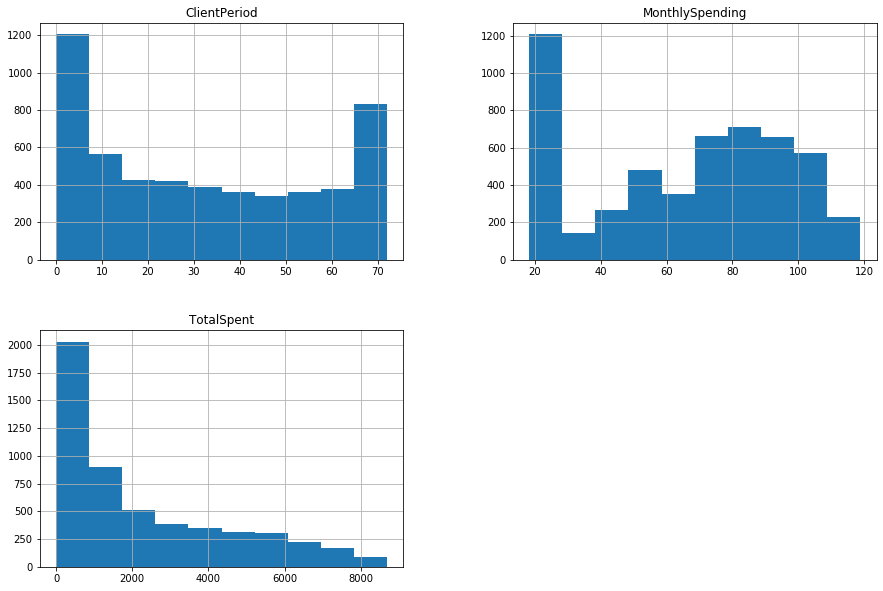

In [14]:
plot = data[num_cols].hist(figsize=(15,10))

In [15]:
data[cat_cols].nunique()

Sex                         2
IsSeniorCitizen             2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

In [16]:
data[target_col].nunique()

2

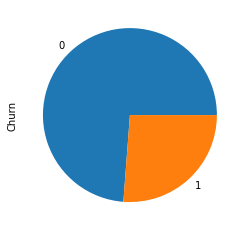

In [17]:
data[target_col].value_counts().plot.pie() # Проверим на сколько сбалансированы классы

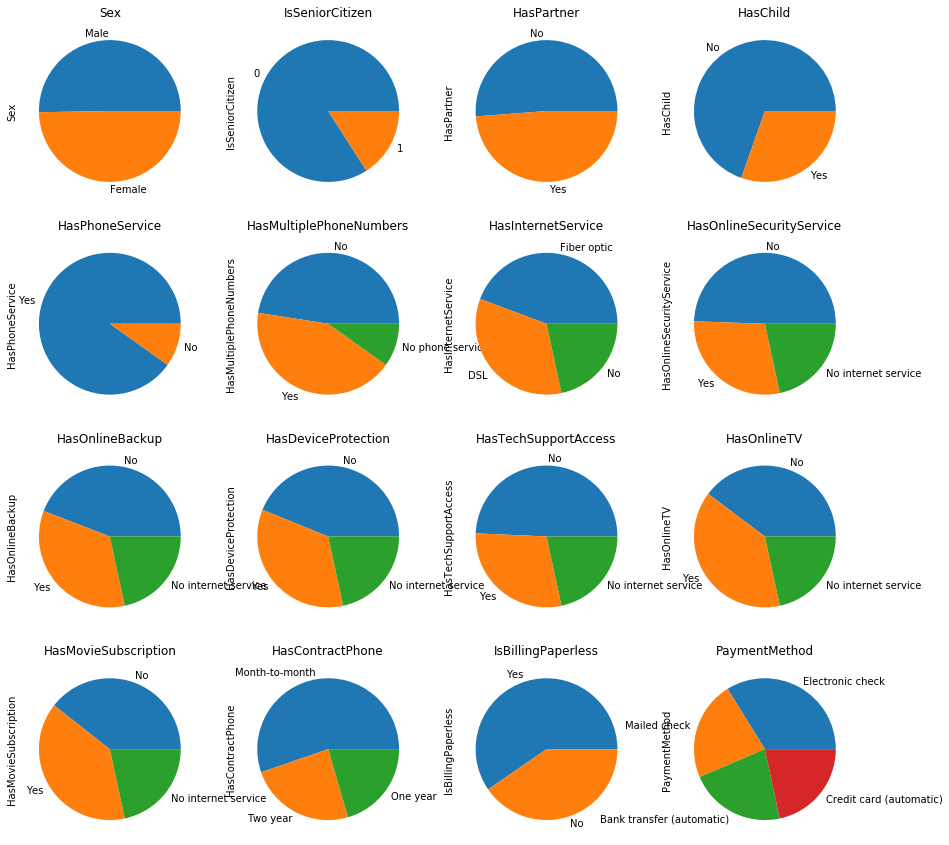

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(len(cat_cols)):
    y = i // 4
    x = i % 4
    data[cat_cols[i]].value_counts().plot.pie(ax=axes[y, x])
    axes[y, x].set_title(cat_cols[i])
    axes[y, x].grid() 

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [101]:
# Считаем данные годными для обучения моделей

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [21]:
# Нормализация числовых данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])

In [22]:
data[num_cols] = pd.DataFrame(scaled_data)

In [23]:
# Кодирование категориальных данных
one_hot = pd.get_dummies(data[cat_cols], drop_first=True)

In [24]:
data.drop(cat_cols, axis=1, inplace=True)

In [25]:
data = pd.concat([data, one_hot], axis=1)

In [26]:
y = data[target_col]
X = data.drop(target_col, axis=1)

In [27]:
clf = LogisticRegressionCV(cv=10, random_state=42, scoring='roc_auc', refit=True).fit(X, y)

In [28]:
clf.score(X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.8490435846751113

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Для этой модели результат на Kaggle 0.84569

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [129]:
y = data_boost[target_col]
X = data_boost.drop(target_col, axis=1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_test.shape

(1057, 19)

In [132]:
from catboost import CatBoostClassifier

In [133]:
cbm = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols, random_state=42)

In [134]:
grid = {'learning_rate': [0.08, 0.1, 0.12],
        'depth': [3, 4],
        'l2_leaf_reg': [6, 7, 8]}

In [135]:
grid_search_result = cbm.grid_search(grid, X=X, y=y, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7888771	best: 0.7888771 (0)	total: 10.4ms	remaining: 10.4s
1:	test: 0.8005178	best: 0.8005178 (1)	total: 20.3ms	remaining: 10.1s
2:	test: 0.8076565	best: 0.8076565 (2)	total: 30.9ms	remaining: 10.3s
3:	test: 0.8057530	best: 0.8076565 (2)	total: 40.9ms	remaining: 10.2s
4:	test: 0.8161494	best: 0.8161494 (4)	total: 53.7ms	remaining: 10.7s
5:	test: 0.8213535	best: 0.8213535 (5)	total: 64.4ms	remaining: 10.7s
6:	test: 0.8245610	best: 0.8245610 (6)	total: 75.9ms	remaining: 10.8s
7:	test: 0.8411957	best: 0.8411957 (7)	total: 87.6ms	remaining: 10.9s
8:	test: 0.8502570	best: 0.8502570 (8)	total: 97.8ms	remaining: 10.8s
9:	test: 0.8559794	best: 0.8559794 (9)	total: 110ms	remaining: 10.9s
10:	test: 0.8580286	best: 0.8580286 (10)	total: 123ms	remaining: 11.1s
11:	test: 0.8617353	best: 0.8617353 (11)	total: 134ms	remaining: 11s
12:	test: 0.8630417	best: 0.8630417 (12)	total: 145ms	remaining: 11s
13:	test: 0.8647851	best: 0.8647851 (13)	total: 158ms	remaining: 11.1s
14:	test: 0.8646610	b

133:	test: 0.8710664	best: 0.8717304 (109)	total: 1.37s	remaining: 8.83s
134:	test: 0.8709757	best: 0.8717304 (109)	total: 1.38s	remaining: 8.83s
135:	test: 0.8710282	best: 0.8717304 (109)	total: 1.39s	remaining: 8.82s
136:	test: 0.8710760	best: 0.8717304 (109)	total: 1.4s	remaining: 8.82s
137:	test: 0.8710760	best: 0.8717304 (109)	total: 1.41s	remaining: 8.81s
138:	test: 0.8712432	best: 0.8717304 (109)	total: 1.42s	remaining: 8.8s
139:	test: 0.8714151	best: 0.8717304 (109)	total: 1.43s	remaining: 8.79s
140:	test: 0.8714390	best: 0.8717304 (109)	total: 1.44s	remaining: 8.78s
141:	test: 0.8713674	best: 0.8717304 (109)	total: 1.45s	remaining: 8.76s
142:	test: 0.8713674	best: 0.8717304 (109)	total: 1.46s	remaining: 8.75s
143:	test: 0.8714724	best: 0.8717304 (109)	total: 1.47s	remaining: 8.73s
144:	test: 0.8715632	best: 0.8717304 (109)	total: 1.48s	remaining: 8.72s
145:	test: 0.8716731	best: 0.8717304 (109)	total: 1.49s	remaining: 8.71s
146:	test: 0.8717399	best: 0.8717399 (146)	total: 1.5

249:	test: 0.8718976	best: 0.8721197 (217)	total: 2.51s	remaining: 7.54s
250:	test: 0.8716874	best: 0.8721197 (217)	total: 2.52s	remaining: 7.53s
251:	test: 0.8716396	best: 0.8721197 (217)	total: 2.53s	remaining: 7.52s
252:	test: 0.8716301	best: 0.8721197 (217)	total: 2.54s	remaining: 7.51s
253:	test: 0.8716110	best: 0.8721197 (217)	total: 2.56s	remaining: 7.51s
254:	test: 0.8716349	best: 0.8721197 (217)	total: 2.57s	remaining: 7.5s
255:	test: 0.8716970	best: 0.8721197 (217)	total: 2.58s	remaining: 7.5s
256:	test: 0.8716874	best: 0.8721197 (217)	total: 2.59s	remaining: 7.49s
257:	test: 0.8716874	best: 0.8721197 (217)	total: 2.6s	remaining: 7.48s
258:	test: 0.8714963	best: 0.8721197 (217)	total: 2.61s	remaining: 7.47s
259:	test: 0.8714820	best: 0.8721197 (217)	total: 2.62s	remaining: 7.46s
260:	test: 0.8714056	best: 0.8721197 (217)	total: 2.63s	remaining: 7.45s
261:	test: 0.8714056	best: 0.8721197 (217)	total: 2.64s	remaining: 7.44s
262:	test: 0.8714056	best: 0.8721197 (217)	total: 2.65

381:	test: 0.8693803	best: 0.8721197 (217)	total: 3.9s	remaining: 6.3s
382:	test: 0.8693803	best: 0.8721197 (217)	total: 3.91s	remaining: 6.3s
383:	test: 0.8694042	best: 0.8721197 (217)	total: 3.92s	remaining: 6.28s
384:	test: 0.8693182	best: 0.8721197 (217)	total: 3.93s	remaining: 6.27s
385:	test: 0.8692609	best: 0.8721197 (217)	total: 3.94s	remaining: 6.26s
386:	test: 0.8693039	best: 0.8721197 (217)	total: 3.95s	remaining: 6.25s
387:	test: 0.8693134	best: 0.8721197 (217)	total: 3.96s	remaining: 6.24s
388:	test: 0.8692656	best: 0.8721197 (217)	total: 3.97s	remaining: 6.23s
389:	test: 0.8691271	best: 0.8721197 (217)	total: 3.98s	remaining: 6.22s
390:	test: 0.8691606	best: 0.8721197 (217)	total: 3.99s	remaining: 6.21s
391:	test: 0.8692179	best: 0.8721197 (217)	total: 4s	remaining: 6.2s
392:	test: 0.8690602	best: 0.8721197 (217)	total: 4s	remaining: 6.19s
393:	test: 0.8690602	best: 0.8721197 (217)	total: 4.01s	remaining: 6.17s
394:	test: 0.8690602	best: 0.8721197 (217)	total: 4.02s	remai

511:	test: 0.8683103	best: 0.8721197 (217)	total: 5.27s	remaining: 5.02s
512:	test: 0.8683724	best: 0.8721197 (217)	total: 5.28s	remaining: 5.01s
513:	test: 0.8683772	best: 0.8721197 (217)	total: 5.29s	remaining: 5s
514:	test: 0.8683581	best: 0.8721197 (217)	total: 5.3s	remaining: 4.99s
515:	test: 0.8683294	best: 0.8721197 (217)	total: 5.32s	remaining: 4.99s
516:	test: 0.8683246	best: 0.8721197 (217)	total: 5.33s	remaining: 4.98s
517:	test: 0.8682721	best: 0.8721197 (217)	total: 5.34s	remaining: 4.97s
518:	test: 0.8683533	best: 0.8721197 (217)	total: 5.35s	remaining: 4.96s
519:	test: 0.8683342	best: 0.8721197 (217)	total: 5.36s	remaining: 4.94s
520:	test: 0.8683294	best: 0.8721197 (217)	total: 5.37s	remaining: 4.93s
521:	test: 0.8682482	best: 0.8721197 (217)	total: 5.38s	remaining: 4.92s
522:	test: 0.8682339	best: 0.8721197 (217)	total: 5.39s	remaining: 4.91s
523:	test: 0.8682148	best: 0.8721197 (217)	total: 5.41s	remaining: 4.92s
524:	test: 0.8681622	best: 0.8721197 (217)	total: 5.42s

642:	test: 0.8661345	best: 0.8721197 (217)	total: 6.61s	remaining: 3.67s
643:	test: 0.8661441	best: 0.8721197 (217)	total: 6.62s	remaining: 3.66s
644:	test: 0.8660486	best: 0.8721197 (217)	total: 6.63s	remaining: 3.65s
645:	test: 0.8659005	best: 0.8721197 (217)	total: 6.64s	remaining: 3.64s
646:	test: 0.8658479	best: 0.8721197 (217)	total: 6.65s	remaining: 3.63s
647:	test: 0.8658479	best: 0.8721197 (217)	total: 6.66s	remaining: 3.62s
648:	test: 0.8657763	best: 0.8721197 (217)	total: 6.67s	remaining: 3.61s
649:	test: 0.8657763	best: 0.8721197 (217)	total: 6.68s	remaining: 3.6s
650:	test: 0.8657524	best: 0.8721197 (217)	total: 6.69s	remaining: 3.59s
651:	test: 0.8658241	best: 0.8721197 (217)	total: 6.7s	remaining: 3.58s
652:	test: 0.8658097	best: 0.8721197 (217)	total: 6.71s	remaining: 3.57s
653:	test: 0.8658097	best: 0.8721197 (217)	total: 6.72s	remaining: 3.56s
654:	test: 0.8657859	best: 0.8721197 (217)	total: 6.73s	remaining: 3.54s
655:	test: 0.8657859	best: 0.8721197 (217)	total: 6.7

759:	test: 0.8649117	best: 0.8721197 (217)	total: 7.79s	remaining: 2.46s
760:	test: 0.8649117	best: 0.8721197 (217)	total: 7.81s	remaining: 2.45s
761:	test: 0.8648687	best: 0.8721197 (217)	total: 7.82s	remaining: 2.44s
762:	test: 0.8648640	best: 0.8721197 (217)	total: 7.83s	remaining: 2.43s
763:	test: 0.8648783	best: 0.8721197 (217)	total: 7.84s	remaining: 2.42s
764:	test: 0.8648783	best: 0.8721197 (217)	total: 7.85s	remaining: 2.41s
765:	test: 0.8648496	best: 0.8721197 (217)	total: 7.86s	remaining: 2.4s
766:	test: 0.8648496	best: 0.8721197 (217)	total: 7.87s	remaining: 2.39s
767:	test: 0.8648544	best: 0.8721197 (217)	total: 7.88s	remaining: 2.38s
768:	test: 0.8649117	best: 0.8721197 (217)	total: 7.88s	remaining: 2.37s
769:	test: 0.8648257	best: 0.8721197 (217)	total: 7.89s	remaining: 2.36s
770:	test: 0.8647875	best: 0.8721197 (217)	total: 7.9s	remaining: 2.35s
771:	test: 0.8647875	best: 0.8721197 (217)	total: 7.91s	remaining: 2.34s
772:	test: 0.8647589	best: 0.8721197 (217)	total: 7.9

875:	test: 0.8638609	best: 0.8721197 (217)	total: 8.96s	remaining: 1.27s
876:	test: 0.8638513	best: 0.8721197 (217)	total: 8.98s	remaining: 1.26s
877:	test: 0.8638418	best: 0.8721197 (217)	total: 8.99s	remaining: 1.25s
878:	test: 0.8638991	best: 0.8721197 (217)	total: 9s	remaining: 1.24s
879:	test: 0.8639230	best: 0.8721197 (217)	total: 9.01s	remaining: 1.23s
880:	test: 0.8639898	best: 0.8721197 (217)	total: 9.02s	remaining: 1.22s
881:	test: 0.8639898	best: 0.8721197 (217)	total: 9.03s	remaining: 1.21s
882:	test: 0.8639898	best: 0.8721197 (217)	total: 9.04s	remaining: 1.2s
883:	test: 0.8639898	best: 0.8721197 (217)	total: 9.05s	remaining: 1.19s
884:	test: 0.8640089	best: 0.8721197 (217)	total: 9.06s	remaining: 1.18s
885:	test: 0.8640376	best: 0.8721197 (217)	total: 9.07s	remaining: 1.17s
886:	test: 0.8640376	best: 0.8721197 (217)	total: 9.08s	remaining: 1.16s
887:	test: 0.8640472	best: 0.8721197 (217)	total: 9.09s	remaining: 1.15s
888:	test: 0.8640376	best: 0.8721197 (217)	total: 9.1s	

990:	test: 0.8633736	best: 0.8721197 (217)	total: 10.1s	remaining: 91.9ms
991:	test: 0.8632781	best: 0.8721197 (217)	total: 10.1s	remaining: 81.7ms
992:	test: 0.8631874	best: 0.8721197 (217)	total: 10.1s	remaining: 71.5ms
993:	test: 0.8631874	best: 0.8721197 (217)	total: 10.1s	remaining: 61.2ms
994:	test: 0.8631921	best: 0.8721197 (217)	total: 10.2s	remaining: 51ms
995:	test: 0.8629867	best: 0.8721197 (217)	total: 10.2s	remaining: 40.8ms
996:	test: 0.8629915	best: 0.8721197 (217)	total: 10.2s	remaining: 30.6ms
997:	test: 0.8629867	best: 0.8721197 (217)	total: 10.2s	remaining: 20.4ms
998:	test: 0.8629867	best: 0.8721197 (217)	total: 10.2s	remaining: 10.2ms
999:	test: 0.8630106	best: 0.8721197 (217)	total: 10.2s	remaining: 0us

bestTest = 0.8721196836
bestIteration = 217

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8721197	best: 0.8721197 (0)	total: 10.4s	remaining: 2m 57s
0:	test: 0.7888

105:	test: 0.8714032	best: 0.8716755 (94)	total: 1.06s	remaining: 8.97s
106:	test: 0.8715990	best: 0.8716755 (94)	total: 1.07s	remaining: 8.97s
107:	test: 0.8715990	best: 0.8716755 (94)	total: 1.08s	remaining: 8.96s
108:	test: 0.8717184	best: 0.8717184 (108)	total: 1.09s	remaining: 8.95s
109:	test: 0.8713984	best: 0.8717184 (108)	total: 1.1s	remaining: 8.93s
110:	test: 0.8713984	best: 0.8717184 (108)	total: 1.11s	remaining: 8.91s
111:	test: 0.8715322	best: 0.8717184 (108)	total: 1.12s	remaining: 8.9s
112:	test: 0.8716277	best: 0.8717184 (108)	total: 1.13s	remaining: 8.89s
113:	test: 0.8716898	best: 0.8717184 (108)	total: 1.14s	remaining: 8.87s
114:	test: 0.8716802	best: 0.8717184 (108)	total: 1.15s	remaining: 8.86s
115:	test: 0.8718283	best: 0.8718283 (115)	total: 1.16s	remaining: 8.84s
116:	test: 0.8720767	best: 0.8720767 (116)	total: 1.17s	remaining: 8.83s
117:	test: 0.8720862	best: 0.8720862 (117)	total: 1.18s	remaining: 8.82s
118:	test: 0.8719859	best: 0.8720862 (117)	total: 1.19s	

236:	test: 0.8727574	best: 0.8730965 (177)	total: 2.41s	remaining: 7.76s
237:	test: 0.8728147	best: 0.8730965 (177)	total: 2.42s	remaining: 7.75s
238:	test: 0.8728147	best: 0.8730965 (177)	total: 2.43s	remaining: 7.74s
239:	test: 0.8728051	best: 0.8730965 (177)	total: 2.45s	remaining: 7.77s
240:	test: 0.8728051	best: 0.8730965 (177)	total: 2.46s	remaining: 7.76s
241:	test: 0.8728051	best: 0.8730965 (177)	total: 2.47s	remaining: 7.75s
242:	test: 0.8728147	best: 0.8730965 (177)	total: 2.48s	remaining: 7.73s
243:	test: 0.8728147	best: 0.8730965 (177)	total: 2.49s	remaining: 7.72s
244:	test: 0.8728147	best: 0.8730965 (177)	total: 2.5s	remaining: 7.71s
245:	test: 0.8728529	best: 0.8730965 (177)	total: 2.51s	remaining: 7.69s
246:	test: 0.8726188	best: 0.8730965 (177)	total: 2.52s	remaining: 7.68s
247:	test: 0.8726427	best: 0.8730965 (177)	total: 2.53s	remaining: 7.67s
248:	test: 0.8726427	best: 0.8730965 (177)	total: 2.54s	remaining: 7.66s
249:	test: 0.8727192	best: 0.8730965 (177)	total: 2.

350:	test: 0.8718713	best: 0.8730965 (177)	total: 3.54s	remaining: 6.54s
351:	test: 0.8718570	best: 0.8730965 (177)	total: 3.55s	remaining: 6.53s
352:	test: 0.8717805	best: 0.8730965 (177)	total: 3.56s	remaining: 6.52s
353:	test: 0.8717996	best: 0.8730965 (177)	total: 3.57s	remaining: 6.51s
354:	test: 0.8718188	best: 0.8730965 (177)	total: 3.58s	remaining: 6.5s
355:	test: 0.8716707	best: 0.8730965 (177)	total: 3.59s	remaining: 6.49s
356:	test: 0.8716707	best: 0.8730965 (177)	total: 3.6s	remaining: 6.48s
357:	test: 0.8714987	best: 0.8730965 (177)	total: 3.61s	remaining: 6.47s
358:	test: 0.8714987	best: 0.8730965 (177)	total: 3.62s	remaining: 6.46s
359:	test: 0.8714892	best: 0.8730965 (177)	total: 3.63s	remaining: 6.45s
360:	test: 0.8713220	best: 0.8730965 (177)	total: 3.63s	remaining: 6.43s
361:	test: 0.8713220	best: 0.8730965 (177)	total: 3.65s	remaining: 6.42s
362:	test: 0.8713984	best: 0.8730965 (177)	total: 3.65s	remaining: 6.41s
363:	test: 0.8712742	best: 0.8730965 (177)	total: 3.6

469:	test: 0.8691510	best: 0.8730965 (177)	total: 4.84s	remaining: 5.45s
470:	test: 0.8691414	best: 0.8730965 (177)	total: 4.85s	remaining: 5.45s
471:	test: 0.8691414	best: 0.8730965 (177)	total: 4.86s	remaining: 5.44s
472:	test: 0.8691176	best: 0.8730965 (177)	total: 4.87s	remaining: 5.43s
473:	test: 0.8691176	best: 0.8730965 (177)	total: 4.88s	remaining: 5.42s
474:	test: 0.8691080	best: 0.8730965 (177)	total: 4.89s	remaining: 5.41s
475:	test: 0.8691032	best: 0.8730965 (177)	total: 4.91s	remaining: 5.4s
476:	test: 0.8690364	best: 0.8730965 (177)	total: 4.92s	remaining: 5.39s
477:	test: 0.8690173	best: 0.8730965 (177)	total: 4.93s	remaining: 5.39s
478:	test: 0.8690173	best: 0.8730965 (177)	total: 4.94s	remaining: 5.38s
479:	test: 0.8691128	best: 0.8730965 (177)	total: 4.95s	remaining: 5.37s
480:	test: 0.8691128	best: 0.8730965 (177)	total: 4.96s	remaining: 5.36s
481:	test: 0.8691844	best: 0.8730965 (177)	total: 4.98s	remaining: 5.35s
482:	test: 0.8690985	best: 0.8730965 (177)	total: 4.

586:	test: 0.8680046	best: 0.8730965 (177)	total: 6.13s	remaining: 4.31s
587:	test: 0.8680285	best: 0.8730965 (177)	total: 6.14s	remaining: 4.3s
588:	test: 0.8679998	best: 0.8730965 (177)	total: 6.15s	remaining: 4.29s
589:	test: 0.8679903	best: 0.8730965 (177)	total: 6.16s	remaining: 4.28s
590:	test: 0.8679903	best: 0.8730965 (177)	total: 6.17s	remaining: 4.27s
591:	test: 0.8678947	best: 0.8730965 (177)	total: 6.18s	remaining: 4.26s
592:	test: 0.8679186	best: 0.8730965 (177)	total: 6.19s	remaining: 4.25s
593:	test: 0.8678756	best: 0.8730965 (177)	total: 6.2s	remaining: 4.24s
594:	test: 0.8678756	best: 0.8730965 (177)	total: 6.21s	remaining: 4.23s
595:	test: 0.8679377	best: 0.8730965 (177)	total: 6.22s	remaining: 4.22s
596:	test: 0.8679377	best: 0.8730965 (177)	total: 6.23s	remaining: 4.2s
597:	test: 0.8679377	best: 0.8730965 (177)	total: 6.24s	remaining: 4.19s
598:	test: 0.8679712	best: 0.8730965 (177)	total: 6.25s	remaining: 4.18s
599:	test: 0.8679807	best: 0.8730965 (177)	total: 6.26

704:	test: 0.8671161	best: 0.8730965 (177)	total: 7.3s	remaining: 3.06s
705:	test: 0.8671305	best: 0.8730965 (177)	total: 7.31s	remaining: 3.04s
706:	test: 0.8670923	best: 0.8730965 (177)	total: 7.32s	remaining: 3.03s
707:	test: 0.8670923	best: 0.8730965 (177)	total: 7.33s	remaining: 3.02s
708:	test: 0.8670875	best: 0.8730965 (177)	total: 7.34s	remaining: 3.01s
709:	test: 0.8670397	best: 0.8730965 (177)	total: 7.35s	remaining: 3s
710:	test: 0.8670636	best: 0.8730965 (177)	total: 7.36s	remaining: 2.99s
711:	test: 0.8669394	best: 0.8730965 (177)	total: 7.37s	remaining: 2.98s
712:	test: 0.8669394	best: 0.8730965 (177)	total: 7.38s	remaining: 2.97s
713:	test: 0.8669394	best: 0.8730965 (177)	total: 7.39s	remaining: 2.96s
714:	test: 0.8669442	best: 0.8730965 (177)	total: 7.4s	remaining: 2.95s
715:	test: 0.8669251	best: 0.8730965 (177)	total: 7.41s	remaining: 2.94s
716:	test: 0.8669585	best: 0.8730965 (177)	total: 7.42s	remaining: 2.93s
717:	test: 0.8667675	best: 0.8730965 (177)	total: 7.43s	

821:	test: 0.8660366	best: 0.8730965 (177)	total: 8.47s	remaining: 1.83s
822:	test: 0.8660557	best: 0.8730965 (177)	total: 8.48s	remaining: 1.82s
823:	test: 0.8660557	best: 0.8730965 (177)	total: 8.49s	remaining: 1.81s
824:	test: 0.8660796	best: 0.8730965 (177)	total: 8.5s	remaining: 1.8s
825:	test: 0.8660605	best: 0.8730965 (177)	total: 8.51s	remaining: 1.79s
826:	test: 0.8661799	best: 0.8730965 (177)	total: 8.52s	remaining: 1.78s
827:	test: 0.8661083	best: 0.8730965 (177)	total: 8.53s	remaining: 1.77s
828:	test: 0.8660653	best: 0.8730965 (177)	total: 8.54s	remaining: 1.76s
829:	test: 0.8660892	best: 0.8730965 (177)	total: 8.55s	remaining: 1.75s
830:	test: 0.8659698	best: 0.8730965 (177)	total: 8.56s	remaining: 1.74s
831:	test: 0.8660748	best: 0.8730965 (177)	total: 8.57s	remaining: 1.73s
832:	test: 0.8660510	best: 0.8730965 (177)	total: 8.58s	remaining: 1.72s
833:	test: 0.8660366	best: 0.8730965 (177)	total: 8.59s	remaining: 1.71s
834:	test: 0.8659936	best: 0.8730965 (177)	total: 8.6

936:	test: 0.8655255	best: 0.8730965 (177)	total: 9.65s	remaining: 649ms
937:	test: 0.8655255	best: 0.8730965 (177)	total: 9.66s	remaining: 639ms
938:	test: 0.8654969	best: 0.8730965 (177)	total: 9.67s	remaining: 628ms
939:	test: 0.8655542	best: 0.8730965 (177)	total: 9.68s	remaining: 618ms
940:	test: 0.8655685	best: 0.8730965 (177)	total: 9.69s	remaining: 608ms
941:	test: 0.8655685	best: 0.8730965 (177)	total: 9.7s	remaining: 597ms
942:	test: 0.8655733	best: 0.8730965 (177)	total: 9.71s	remaining: 587ms
943:	test: 0.8655781	best: 0.8730965 (177)	total: 9.72s	remaining: 577ms
944:	test: 0.8654587	best: 0.8730965 (177)	total: 9.73s	remaining: 566ms
945:	test: 0.8654443	best: 0.8730965 (177)	total: 9.74s	remaining: 556ms
946:	test: 0.8654443	best: 0.8730965 (177)	total: 9.75s	remaining: 546ms
947:	test: 0.8654252	best: 0.8730965 (177)	total: 9.76s	remaining: 535ms
948:	test: 0.8655016	best: 0.8730965 (177)	total: 9.77s	remaining: 525ms
949:	test: 0.8655016	best: 0.8730965 (177)	total: 9.

53:	test: 0.8693564	best: 0.8694901 (49)	total: 514ms	remaining: 9s
54:	test: 0.8699487	best: 0.8699487 (54)	total: 525ms	remaining: 9.01s
55:	test: 0.8699630	best: 0.8699630 (55)	total: 535ms	remaining: 9.01s
56:	test: 0.8702449	best: 0.8702449 (56)	total: 545ms	remaining: 9.02s
57:	test: 0.8702401	best: 0.8702449 (56)	total: 555ms	remaining: 9.01s
58:	test: 0.8703069	best: 0.8703069 (58)	total: 565ms	remaining: 9.01s
59:	test: 0.8705219	best: 0.8705219 (59)	total: 575ms	remaining: 9.01s
60:	test: 0.8705386	best: 0.8705386 (60)	total: 586ms	remaining: 9.02s
61:	test: 0.8705291	best: 0.8705386 (60)	total: 595ms	remaining: 9.01s
62:	test: 0.8705291	best: 0.8705386 (60)	total: 602ms	remaining: 8.95s
63:	test: 0.8704765	best: 0.8705386 (60)	total: 611ms	remaining: 8.94s
64:	test: 0.8704144	best: 0.8705386 (60)	total: 621ms	remaining: 8.93s
65:	test: 0.8704670	best: 0.8705386 (60)	total: 630ms	remaining: 8.92s
66:	test: 0.8704670	best: 0.8705386 (60)	total: 640ms	remaining: 8.91s
67:	test:

187:	test: 0.8713865	best: 0.8713865 (186)	total: 1.82s	remaining: 7.85s
188:	test: 0.8712766	best: 0.8713865 (186)	total: 1.83s	remaining: 7.84s
189:	test: 0.8712766	best: 0.8713865 (186)	total: 1.84s	remaining: 7.83s
190:	test: 0.8712671	best: 0.8713865 (186)	total: 1.85s	remaining: 7.82s
191:	test: 0.8712623	best: 0.8713865 (186)	total: 1.86s	remaining: 7.81s
192:	test: 0.8714104	best: 0.8714104 (192)	total: 1.87s	remaining: 7.8s
193:	test: 0.8714104	best: 0.8714104 (192)	total: 1.88s	remaining: 7.79s
194:	test: 0.8713960	best: 0.8714104 (192)	total: 1.88s	remaining: 7.78s
195:	test: 0.8713960	best: 0.8714104 (192)	total: 1.89s	remaining: 7.77s
196:	test: 0.8713865	best: 0.8714104 (192)	total: 1.9s	remaining: 7.76s
197:	test: 0.8714533	best: 0.8714533 (197)	total: 1.91s	remaining: 7.75s
198:	test: 0.8712814	best: 0.8714533 (197)	total: 1.92s	remaining: 7.74s
199:	test: 0.8714008	best: 0.8714533 (197)	total: 1.93s	remaining: 7.73s
200:	test: 0.8714008	best: 0.8714533 (197)	total: 1.9

303:	test: 0.8691008	best: 0.8714533 (197)	total: 2.95s	remaining: 6.75s
304:	test: 0.8691008	best: 0.8714533 (197)	total: 2.96s	remaining: 6.75s
305:	test: 0.8690722	best: 0.8714533 (197)	total: 2.97s	remaining: 6.74s
306:	test: 0.8690722	best: 0.8714533 (197)	total: 2.98s	remaining: 6.73s
307:	test: 0.8691104	best: 0.8714533 (197)	total: 2.99s	remaining: 6.72s
308:	test: 0.8691008	best: 0.8714533 (197)	total: 3s	remaining: 6.71s
309:	test: 0.8691008	best: 0.8714533 (197)	total: 3.01s	remaining: 6.7s
310:	test: 0.8690602	best: 0.8714533 (197)	total: 3.02s	remaining: 6.69s
311:	test: 0.8691558	best: 0.8714533 (197)	total: 3.03s	remaining: 6.68s
312:	test: 0.8691367	best: 0.8714533 (197)	total: 3.04s	remaining: 6.67s
313:	test: 0.8691988	best: 0.8714533 (197)	total: 3.05s	remaining: 6.66s
314:	test: 0.8691988	best: 0.8714533 (197)	total: 3.06s	remaining: 6.65s
315:	test: 0.8691271	best: 0.8714533 (197)	total: 3.07s	remaining: 6.64s
316:	test: 0.8691558	best: 0.8714533 (197)	total: 3.08s

418:	test: 0.8672833	best: 0.8714533 (197)	total: 4.08s	remaining: 5.66s
419:	test: 0.8671639	best: 0.8714533 (197)	total: 4.09s	remaining: 5.65s
420:	test: 0.8671353	best: 0.8714533 (197)	total: 4.1s	remaining: 5.64s
421:	test: 0.8670015	best: 0.8714533 (197)	total: 4.11s	remaining: 5.63s
422:	test: 0.8670015	best: 0.8714533 (197)	total: 4.12s	remaining: 5.62s
423:	test: 0.8670015	best: 0.8714533 (197)	total: 4.13s	remaining: 5.61s
424:	test: 0.8669585	best: 0.8714533 (197)	total: 4.14s	remaining: 5.6s
425:	test: 0.8670397	best: 0.8714533 (197)	total: 4.15s	remaining: 5.59s
426:	test: 0.8670684	best: 0.8714533 (197)	total: 4.16s	remaining: 5.58s
427:	test: 0.8672308	best: 0.8714533 (197)	total: 4.17s	remaining: 5.57s
428:	test: 0.8670779	best: 0.8714533 (197)	total: 4.18s	remaining: 5.56s
429:	test: 0.8670779	best: 0.8714533 (197)	total: 4.19s	remaining: 5.55s
430:	test: 0.8670588	best: 0.8714533 (197)	total: 4.2s	remaining: 5.54s
431:	test: 0.8670588	best: 0.8714533 (197)	total: 4.21

533:	test: 0.8663137	best: 0.8714533 (197)	total: 5.24s	remaining: 4.57s
534:	test: 0.8663137	best: 0.8714533 (197)	total: 5.25s	remaining: 4.57s
535:	test: 0.8662468	best: 0.8714533 (197)	total: 5.26s	remaining: 4.56s
536:	test: 0.8662516	best: 0.8714533 (197)	total: 5.27s	remaining: 4.55s
537:	test: 0.8662516	best: 0.8714533 (197)	total: 5.28s	remaining: 4.54s
538:	test: 0.8662086	best: 0.8714533 (197)	total: 5.29s	remaining: 4.53s
539:	test: 0.8662086	best: 0.8714533 (197)	total: 5.3s	remaining: 4.52s
540:	test: 0.8661537	best: 0.8714533 (197)	total: 5.31s	remaining: 4.51s
541:	test: 0.8662970	best: 0.8714533 (197)	total: 5.32s	remaining: 4.5s
542:	test: 0.8662970	best: 0.8714533 (197)	total: 5.33s	remaining: 4.49s
543:	test: 0.8663065	best: 0.8714533 (197)	total: 5.34s	remaining: 4.48s
544:	test: 0.8662635	best: 0.8714533 (197)	total: 5.35s	remaining: 4.47s
545:	test: 0.8662635	best: 0.8714533 (197)	total: 5.36s	remaining: 4.46s
546:	test: 0.8662635	best: 0.8714533 (197)	total: 5.3

648:	test: 0.8655566	best: 0.8714533 (197)	total: 6.39s	remaining: 3.46s
649:	test: 0.8655375	best: 0.8714533 (197)	total: 6.41s	remaining: 3.45s
650:	test: 0.8655375	best: 0.8714533 (197)	total: 6.42s	remaining: 3.44s
651:	test: 0.8654945	best: 0.8714533 (197)	total: 6.42s	remaining: 3.43s
652:	test: 0.8655088	best: 0.8714533 (197)	total: 6.44s	remaining: 3.42s
653:	test: 0.8653464	best: 0.8714533 (197)	total: 6.45s	remaining: 3.41s
654:	test: 0.8653751	best: 0.8714533 (197)	total: 6.46s	remaining: 3.4s
655:	test: 0.8653512	best: 0.8714533 (197)	total: 6.47s	remaining: 3.39s
656:	test: 0.8653512	best: 0.8714533 (197)	total: 6.48s	remaining: 3.38s
657:	test: 0.8653798	best: 0.8714533 (197)	total: 6.49s	remaining: 3.37s
658:	test: 0.8653321	best: 0.8714533 (197)	total: 6.5s	remaining: 3.36s
659:	test: 0.8653368	best: 0.8714533 (197)	total: 6.51s	remaining: 3.35s
660:	test: 0.8653225	best: 0.8714533 (197)	total: 6.52s	remaining: 3.34s
661:	test: 0.8651553	best: 0.8714533 (197)	total: 6.5

763:	test: 0.8645774	best: 0.8714533 (197)	total: 7.54s	remaining: 2.33s
764:	test: 0.8645009	best: 0.8714533 (197)	total: 7.55s	remaining: 2.32s
765:	test: 0.8644675	best: 0.8714533 (197)	total: 7.56s	remaining: 2.31s
766:	test: 0.8644579	best: 0.8714533 (197)	total: 7.57s	remaining: 2.3s
767:	test: 0.8643672	best: 0.8714533 (197)	total: 7.58s	remaining: 2.29s
768:	test: 0.8642669	best: 0.8714533 (197)	total: 7.6s	remaining: 2.28s
769:	test: 0.8642812	best: 0.8714533 (197)	total: 7.61s	remaining: 2.27s
770:	test: 0.8643815	best: 0.8714533 (197)	total: 7.62s	remaining: 2.26s
771:	test: 0.8643815	best: 0.8714533 (197)	total: 7.63s	remaining: 2.25s
772:	test: 0.8643911	best: 0.8714533 (197)	total: 7.64s	remaining: 2.24s
773:	test: 0.8644054	best: 0.8714533 (197)	total: 7.65s	remaining: 2.23s
774:	test: 0.8643194	best: 0.8714533 (197)	total: 7.66s	remaining: 2.22s
775:	test: 0.8644245	best: 0.8714533 (197)	total: 7.67s	remaining: 2.21s
776:	test: 0.8644293	best: 0.8714533 (197)	total: 7.6

878:	test: 0.8636364	best: 0.8714533 (197)	total: 8.7s	remaining: 1.2s
879:	test: 0.8636125	best: 0.8714533 (197)	total: 8.71s	remaining: 1.19s
880:	test: 0.8636173	best: 0.8714533 (197)	total: 8.72s	remaining: 1.18s
881:	test: 0.8634023	best: 0.8714533 (197)	total: 8.73s	remaining: 1.17s
882:	test: 0.8634071	best: 0.8714533 (197)	total: 8.74s	remaining: 1.16s
883:	test: 0.8634166	best: 0.8714533 (197)	total: 8.75s	remaining: 1.15s
884:	test: 0.8633880	best: 0.8714533 (197)	total: 8.76s	remaining: 1.14s
885:	test: 0.8634071	best: 0.8714533 (197)	total: 8.77s	remaining: 1.13s
886:	test: 0.8633641	best: 0.8714533 (197)	total: 8.79s	remaining: 1.12s
887:	test: 0.8633020	best: 0.8714533 (197)	total: 8.8s	remaining: 1.11s
888:	test: 0.8633880	best: 0.8714533 (197)	total: 8.81s	remaining: 1.1s
889:	test: 0.8633736	best: 0.8714533 (197)	total: 8.82s	remaining: 1.09s
890:	test: 0.8634740	best: 0.8714533 (197)	total: 8.83s	remaining: 1.08s
891:	test: 0.8634835	best: 0.8714533 (197)	total: 8.84s

1:	test: 0.7928895	best: 0.7928895 (1)	total: 41.3ms	remaining: 20.6s
2:	test: 0.8101762	best: 0.8101762 (2)	total: 52.6ms	remaining: 17.5s
3:	test: 0.8305462	best: 0.8305462 (3)	total: 61.3ms	remaining: 15.3s
4:	test: 0.8344893	best: 0.8344893 (4)	total: 71.6ms	remaining: 14.2s
5:	test: 0.8497483	best: 0.8497483 (5)	total: 81.1ms	remaining: 13.4s
6:	test: 0.8546921	best: 0.8546921 (6)	total: 90.7ms	remaining: 12.9s
7:	test: 0.8561872	best: 0.8561872 (7)	total: 99.4ms	remaining: 12.3s
8:	test: 0.8592442	best: 0.8592442 (8)	total: 109ms	remaining: 11.9s
9:	test: 0.8593207	best: 0.8593207 (9)	total: 118ms	remaining: 11.7s
10:	test: 0.8607871	best: 0.8607871 (10)	total: 128ms	remaining: 11.5s
11:	test: 0.8602903	best: 0.8607871 (10)	total: 137ms	remaining: 11.3s
12:	test: 0.8610355	best: 0.8610355 (12)	total: 147ms	remaining: 11.1s
13:	test: 0.8615967	best: 0.8615967 (13)	total: 156ms	remaining: 11s
14:	test: 0.8618045	best: 0.8618045 (14)	total: 166ms	remaining: 10.9s
15:	test: 0.8624326

121:	test: 0.8717304	best: 0.8722893 (89)	total: 1.21s	remaining: 8.7s
122:	test: 0.8717447	best: 0.8722893 (89)	total: 1.22s	remaining: 8.69s
123:	test: 0.8716110	best: 0.8722893 (89)	total: 1.23s	remaining: 8.68s
124:	test: 0.8717399	best: 0.8722893 (89)	total: 1.24s	remaining: 8.67s
125:	test: 0.8717877	best: 0.8722893 (89)	total: 1.25s	remaining: 8.66s
126:	test: 0.8717877	best: 0.8722893 (89)	total: 1.26s	remaining: 8.64s
127:	test: 0.8717877	best: 0.8722893 (89)	total: 1.26s	remaining: 8.61s
128:	test: 0.8717877	best: 0.8722893 (89)	total: 1.27s	remaining: 8.6s
129:	test: 0.8717304	best: 0.8722893 (89)	total: 1.28s	remaining: 8.59s
130:	test: 0.8717758	best: 0.8722893 (89)	total: 1.29s	remaining: 8.57s
131:	test: 0.8717758	best: 0.8722893 (89)	total: 1.3s	remaining: 8.56s
132:	test: 0.8716946	best: 0.8722893 (89)	total: 1.31s	remaining: 8.54s
133:	test: 0.8716946	best: 0.8722893 (89)	total: 1.32s	remaining: 8.53s
134:	test: 0.8716850	best: 0.8722893 (89)	total: 1.33s	remaining: 8

241:	test: 0.8723776	best: 0.8726117 (186)	total: 2.36s	remaining: 7.38s
242:	test: 0.8723920	best: 0.8726117 (186)	total: 2.37s	remaining: 7.38s
243:	test: 0.8723920	best: 0.8726117 (186)	total: 2.38s	remaining: 7.37s
244:	test: 0.8723920	best: 0.8726117 (186)	total: 2.39s	remaining: 7.36s
245:	test: 0.8722916	best: 0.8726117 (186)	total: 2.4s	remaining: 7.35s
246:	test: 0.8722916	best: 0.8726117 (186)	total: 2.41s	remaining: 7.34s
247:	test: 0.8722534	best: 0.8726117 (186)	total: 2.42s	remaining: 7.33s
248:	test: 0.8722534	best: 0.8726117 (186)	total: 2.42s	remaining: 7.31s
249:	test: 0.8722534	best: 0.8726117 (186)	total: 2.43s	remaining: 7.3s
250:	test: 0.8722534	best: 0.8726117 (186)	total: 2.44s	remaining: 7.29s
251:	test: 0.8723155	best: 0.8726117 (186)	total: 2.45s	remaining: 7.28s
252:	test: 0.8723299	best: 0.8726117 (186)	total: 2.46s	remaining: 7.27s
253:	test: 0.8723251	best: 0.8726117 (186)	total: 2.47s	remaining: 7.26s
254:	test: 0.8722152	best: 0.8726117 (186)	total: 2.4

358:	test: 0.8711405	best: 0.8726117 (186)	total: 3.51s	remaining: 6.27s
359:	test: 0.8711405	best: 0.8726117 (186)	total: 3.52s	remaining: 6.27s
360:	test: 0.8711596	best: 0.8726117 (186)	total: 3.53s	remaining: 6.26s
361:	test: 0.8711596	best: 0.8726117 (186)	total: 3.54s	remaining: 6.25s
362:	test: 0.8710497	best: 0.8726117 (186)	total: 3.55s	remaining: 6.24s
363:	test: 0.8711405	best: 0.8726117 (186)	total: 3.56s	remaining: 6.23s
364:	test: 0.8711548	best: 0.8726117 (186)	total: 3.57s	remaining: 6.22s
365:	test: 0.8711548	best: 0.8726117 (186)	total: 3.58s	remaining: 6.21s
366:	test: 0.8711548	best: 0.8726117 (186)	total: 3.59s	remaining: 6.2s
367:	test: 0.8711500	best: 0.8726117 (186)	total: 3.6s	remaining: 6.19s
368:	test: 0.8711500	best: 0.8726117 (186)	total: 3.61s	remaining: 6.18s
369:	test: 0.8711548	best: 0.8726117 (186)	total: 3.62s	remaining: 6.17s
370:	test: 0.8711357	best: 0.8726117 (186)	total: 3.63s	remaining: 6.16s
371:	test: 0.8711309	best: 0.8726117 (186)	total: 3.6

473:	test: 0.8698078	best: 0.8726117 (186)	total: 4.64s	remaining: 5.15s
474:	test: 0.8698030	best: 0.8726117 (186)	total: 4.65s	remaining: 5.14s
475:	test: 0.8698221	best: 0.8726117 (186)	total: 4.66s	remaining: 5.13s
476:	test: 0.8699320	best: 0.8726117 (186)	total: 4.67s	remaining: 5.12s
477:	test: 0.8698460	best: 0.8726117 (186)	total: 4.68s	remaining: 5.11s
478:	test: 0.8698460	best: 0.8726117 (186)	total: 4.69s	remaining: 5.1s
479:	test: 0.8698269	best: 0.8726117 (186)	total: 4.7s	remaining: 5.09s
480:	test: 0.8698126	best: 0.8726117 (186)	total: 4.71s	remaining: 5.08s
481:	test: 0.8696979	best: 0.8726117 (186)	total: 4.72s	remaining: 5.07s
482:	test: 0.8696406	best: 0.8726117 (186)	total: 4.73s	remaining: 5.06s
483:	test: 0.8696358	best: 0.8726117 (186)	total: 4.74s	remaining: 5.05s
484:	test: 0.8696549	best: 0.8726117 (186)	total: 4.75s	remaining: 5.04s
485:	test: 0.8696454	best: 0.8726117 (186)	total: 4.76s	remaining: 5.03s
486:	test: 0.8695737	best: 0.8726117 (186)	total: 4.7

589:	test: 0.8684130	best: 0.8726117 (186)	total: 5.77s	remaining: 4.01s
590:	test: 0.8683796	best: 0.8726117 (186)	total: 5.79s	remaining: 4s
591:	test: 0.8683796	best: 0.8726117 (186)	total: 5.79s	remaining: 3.99s
592:	test: 0.8683891	best: 0.8726117 (186)	total: 5.8s	remaining: 3.98s
593:	test: 0.8683366	best: 0.8726117 (186)	total: 5.81s	remaining: 3.97s
594:	test: 0.8683366	best: 0.8726117 (186)	total: 5.82s	remaining: 3.96s
595:	test: 0.8683796	best: 0.8726117 (186)	total: 5.83s	remaining: 3.95s
596:	test: 0.8683796	best: 0.8726117 (186)	total: 5.84s	remaining: 3.94s
597:	test: 0.8683796	best: 0.8726117 (186)	total: 5.85s	remaining: 3.93s
598:	test: 0.8683748	best: 0.8726117 (186)	total: 5.86s	remaining: 3.92s
599:	test: 0.8683605	best: 0.8726117 (186)	total: 5.87s	remaining: 3.91s
600:	test: 0.8683796	best: 0.8726117 (186)	total: 5.88s	remaining: 3.9s
601:	test: 0.8683796	best: 0.8726117 (186)	total: 5.89s	remaining: 3.9s
602:	test: 0.8683414	best: 0.8726117 (186)	total: 5.9s	re

705:	test: 0.8672499	best: 0.8726117 (186)	total: 6.93s	remaining: 2.88s
706:	test: 0.8671974	best: 0.8726117 (186)	total: 6.94s	remaining: 2.88s
707:	test: 0.8671974	best: 0.8726117 (186)	total: 6.95s	remaining: 2.87s
708:	test: 0.8671974	best: 0.8726117 (186)	total: 6.96s	remaining: 2.86s
709:	test: 0.8671830	best: 0.8726117 (186)	total: 6.97s	remaining: 2.85s
710:	test: 0.8671830	best: 0.8726117 (186)	total: 6.98s	remaining: 2.84s
711:	test: 0.8671830	best: 0.8726117 (186)	total: 6.99s	remaining: 2.83s
712:	test: 0.8671735	best: 0.8726117 (186)	total: 7s	remaining: 2.82s
713:	test: 0.8671926	best: 0.8726117 (186)	total: 7.01s	remaining: 2.81s
714:	test: 0.8670493	best: 0.8726117 (186)	total: 7.02s	remaining: 2.8s
715:	test: 0.8670063	best: 0.8726117 (186)	total: 7.03s	remaining: 2.79s
716:	test: 0.8670111	best: 0.8726117 (186)	total: 7.04s	remaining: 2.78s
717:	test: 0.8670684	best: 0.8726117 (186)	total: 7.04s	remaining: 2.77s
718:	test: 0.8670684	best: 0.8726117 (186)	total: 7.05s

822:	test: 0.8670326	best: 0.8726117 (186)	total: 8.08s	remaining: 1.74s
823:	test: 0.8670182	best: 0.8726117 (186)	total: 8.09s	remaining: 1.73s
824:	test: 0.8670087	best: 0.8726117 (186)	total: 8.1s	remaining: 1.72s
825:	test: 0.8670087	best: 0.8726117 (186)	total: 8.11s	remaining: 1.71s
826:	test: 0.8670135	best: 0.8726117 (186)	total: 8.12s	remaining: 1.7s
827:	test: 0.8669705	best: 0.8726117 (186)	total: 8.13s	remaining: 1.69s
828:	test: 0.8670039	best: 0.8726117 (186)	total: 8.14s	remaining: 1.68s
829:	test: 0.8669514	best: 0.8726117 (186)	total: 8.15s	remaining: 1.67s
830:	test: 0.8669322	best: 0.8726117 (186)	total: 8.16s	remaining: 1.66s
831:	test: 0.8669657	best: 0.8726117 (186)	total: 8.17s	remaining: 1.65s
832:	test: 0.8669800	best: 0.8726117 (186)	total: 8.18s	remaining: 1.64s
833:	test: 0.8669800	best: 0.8726117 (186)	total: 8.2s	remaining: 1.63s
834:	test: 0.8669991	best: 0.8726117 (186)	total: 8.21s	remaining: 1.62s
835:	test: 0.8668606	best: 0.8726117 (186)	total: 8.22

936:	test: 0.8660390	best: 0.8726117 (186)	total: 9.23s	remaining: 621ms
937:	test: 0.8660438	best: 0.8726117 (186)	total: 9.24s	remaining: 611ms
938:	test: 0.8660438	best: 0.8726117 (186)	total: 9.26s	remaining: 601ms
939:	test: 0.8660581	best: 0.8726117 (186)	total: 9.27s	remaining: 592ms
940:	test: 0.8660629	best: 0.8726117 (186)	total: 9.28s	remaining: 582ms
941:	test: 0.8660725	best: 0.8726117 (186)	total: 9.29s	remaining: 572ms
942:	test: 0.8660533	best: 0.8726117 (186)	total: 9.29s	remaining: 562ms
943:	test: 0.8660199	best: 0.8726117 (186)	total: 9.3s	remaining: 552ms
944:	test: 0.8660199	best: 0.8726117 (186)	total: 9.31s	remaining: 542ms
945:	test: 0.8660199	best: 0.8726117 (186)	total: 9.32s	remaining: 532ms
946:	test: 0.8660486	best: 0.8726117 (186)	total: 9.33s	remaining: 522ms
947:	test: 0.8660486	best: 0.8726117 (186)	total: 9.34s	remaining: 513ms
948:	test: 0.8660533	best: 0.8726117 (186)	total: 9.35s	remaining: 503ms
949:	test: 0.8661537	best: 0.8726117 (186)	total: 9.

56:	test: 0.8720695	best: 0.8720695 (55)	total: 536ms	remaining: 8.86s
57:	test: 0.8721937	best: 0.8721937 (57)	total: 547ms	remaining: 8.88s
58:	test: 0.8721125	best: 0.8721937 (57)	total: 556ms	remaining: 8.87s
59:	test: 0.8720265	best: 0.8721937 (57)	total: 565ms	remaining: 8.85s
60:	test: 0.8721364	best: 0.8721937 (57)	total: 574ms	remaining: 8.84s
61:	test: 0.8721985	best: 0.8721985 (61)	total: 583ms	remaining: 8.83s
62:	test: 0.8722606	best: 0.8722606 (62)	total: 593ms	remaining: 8.81s
63:	test: 0.8722510	best: 0.8722606 (62)	total: 602ms	remaining: 8.8s
64:	test: 0.8723275	best: 0.8723275 (64)	total: 611ms	remaining: 8.79s
65:	test: 0.8722893	best: 0.8723275 (64)	total: 621ms	remaining: 8.78s
66:	test: 0.8723752	best: 0.8723752 (66)	total: 630ms	remaining: 8.78s
67:	test: 0.8724326	best: 0.8724326 (67)	total: 640ms	remaining: 8.77s
68:	test: 0.8724326	best: 0.8724326 (67)	total: 648ms	remaining: 8.74s
69:	test: 0.8724326	best: 0.8724326 (67)	total: 655ms	remaining: 8.7s
70:	test

172:	test: 0.8724803	best: 0.8726809 (163)	total: 1.66s	remaining: 7.93s
173:	test: 0.8724803	best: 0.8726809 (163)	total: 1.67s	remaining: 7.92s
174:	test: 0.8725185	best: 0.8726809 (163)	total: 1.68s	remaining: 7.91s
175:	test: 0.8725185	best: 0.8726809 (163)	total: 1.69s	remaining: 7.9s
176:	test: 0.8725185	best: 0.8726809 (163)	total: 1.7s	remaining: 7.88s
177:	test: 0.8725233	best: 0.8726809 (163)	total: 1.71s	remaining: 7.87s
178:	test: 0.8725233	best: 0.8726809 (163)	total: 1.71s	remaining: 7.86s
179:	test: 0.8724994	best: 0.8726809 (163)	total: 1.72s	remaining: 7.85s
180:	test: 0.8725138	best: 0.8726809 (163)	total: 1.73s	remaining: 7.84s
181:	test: 0.8725185	best: 0.8726809 (163)	total: 1.74s	remaining: 7.83s
182:	test: 0.8725090	best: 0.8726809 (163)	total: 1.75s	remaining: 7.82s
183:	test: 0.8725090	best: 0.8726809 (163)	total: 1.76s	remaining: 7.8s
184:	test: 0.8725042	best: 0.8726809 (163)	total: 1.77s	remaining: 7.79s
185:	test: 0.8724373	best: 0.8726809 (163)	total: 1.78

291:	test: 0.8721364	best: 0.8726809 (163)	total: 2.81s	remaining: 6.8s
292:	test: 0.8721794	best: 0.8726809 (163)	total: 2.81s	remaining: 6.79s
293:	test: 0.8721412	best: 0.8726809 (163)	total: 2.82s	remaining: 6.78s
294:	test: 0.8720361	best: 0.8726809 (163)	total: 2.83s	remaining: 6.77s
295:	test: 0.8720409	best: 0.8726809 (163)	total: 2.85s	remaining: 6.78s
296:	test: 0.8720409	best: 0.8726809 (163)	total: 2.86s	remaining: 6.77s
297:	test: 0.8720409	best: 0.8726809 (163)	total: 2.87s	remaining: 6.76s
298:	test: 0.8719501	best: 0.8726809 (163)	total: 2.88s	remaining: 6.75s
299:	test: 0.8719215	best: 0.8726809 (163)	total: 2.89s	remaining: 6.74s
300:	test: 0.8720456	best: 0.8726809 (163)	total: 2.9s	remaining: 6.73s
301:	test: 0.8720456	best: 0.8726809 (163)	total: 2.91s	remaining: 6.72s
302:	test: 0.8720456	best: 0.8726809 (163)	total: 2.92s	remaining: 6.71s
303:	test: 0.8720456	best: 0.8726809 (163)	total: 2.93s	remaining: 6.7s
304:	test: 0.8720552	best: 0.8726809 (163)	total: 2.93

405:	test: 0.8698221	best: 0.8726809 (163)	total: 3.94s	remaining: 5.76s
406:	test: 0.8698842	best: 0.8726809 (163)	total: 3.95s	remaining: 5.75s
407:	test: 0.8697075	best: 0.8726809 (163)	total: 3.96s	remaining: 5.74s
408:	test: 0.8697314	best: 0.8726809 (163)	total: 3.97s	remaining: 5.73s
409:	test: 0.8697648	best: 0.8726809 (163)	total: 3.98s	remaining: 5.72s
410:	test: 0.8697170	best: 0.8726809 (163)	total: 3.99s	remaining: 5.71s
411:	test: 0.8695976	best: 0.8726809 (163)	total: 4s	remaining: 5.7s
412:	test: 0.8695260	best: 0.8726809 (163)	total: 4.01s	remaining: 5.69s
413:	test: 0.8695546	best: 0.8726809 (163)	total: 4.01s	remaining: 5.68s
414:	test: 0.8695451	best: 0.8726809 (163)	total: 4.03s	remaining: 5.67s
415:	test: 0.8695307	best: 0.8726809 (163)	total: 4.04s	remaining: 5.66s
416:	test: 0.8695307	best: 0.8726809 (163)	total: 4.04s	remaining: 5.66s
417:	test: 0.8695307	best: 0.8726809 (163)	total: 4.05s	remaining: 5.64s
418:	test: 0.8695355	best: 0.8726809 (163)	total: 4.06s

521:	test: 0.8687951	best: 0.8726809 (163)	total: 5.1s	remaining: 4.67s
522:	test: 0.8687139	best: 0.8726809 (163)	total: 5.11s	remaining: 4.66s
523:	test: 0.8686757	best: 0.8726809 (163)	total: 5.12s	remaining: 4.65s
524:	test: 0.8686327	best: 0.8726809 (163)	total: 5.13s	remaining: 4.64s
525:	test: 0.8686901	best: 0.8726809 (163)	total: 5.14s	remaining: 4.63s
526:	test: 0.8686901	best: 0.8726809 (163)	total: 5.15s	remaining: 4.62s
527:	test: 0.8686614	best: 0.8726809 (163)	total: 5.16s	remaining: 4.61s
528:	test: 0.8687378	best: 0.8726809 (163)	total: 5.17s	remaining: 4.6s
529:	test: 0.8687760	best: 0.8726809 (163)	total: 5.18s	remaining: 4.59s
530:	test: 0.8687617	best: 0.8726809 (163)	total: 5.19s	remaining: 4.58s
531:	test: 0.8687378	best: 0.8726809 (163)	total: 5.2s	remaining: 4.57s
532:	test: 0.8687378	best: 0.8726809 (163)	total: 5.21s	remaining: 4.56s
533:	test: 0.8686184	best: 0.8726809 (163)	total: 5.22s	remaining: 4.55s
534:	test: 0.8686136	best: 0.8726809 (163)	total: 5.23

648:	test: 0.8677992	best: 0.8726809 (163)	total: 6.45s	remaining: 3.48s
649:	test: 0.8676464	best: 0.8726809 (163)	total: 6.46s	remaining: 3.48s
650:	test: 0.8676559	best: 0.8726809 (163)	total: 6.47s	remaining: 3.47s
651:	test: 0.8676655	best: 0.8726809 (163)	total: 6.48s	remaining: 3.46s
652:	test: 0.8676368	best: 0.8726809 (163)	total: 6.49s	remaining: 3.45s
653:	test: 0.8676368	best: 0.8726809 (163)	total: 6.5s	remaining: 3.44s
654:	test: 0.8676034	best: 0.8726809 (163)	total: 6.5s	remaining: 3.43s
655:	test: 0.8676272	best: 0.8726809 (163)	total: 6.51s	remaining: 3.42s
656:	test: 0.8676129	best: 0.8726809 (163)	total: 6.53s	remaining: 3.41s
657:	test: 0.8677132	best: 0.8726809 (163)	total: 6.53s	remaining: 3.4s
658:	test: 0.8677610	best: 0.8726809 (163)	total: 6.54s	remaining: 3.39s
659:	test: 0.8677705	best: 0.8726809 (163)	total: 6.55s	remaining: 3.38s
660:	test: 0.8677705	best: 0.8726809 (163)	total: 6.56s	remaining: 3.37s
661:	test: 0.8677944	best: 0.8726809 (163)	total: 6.57

763:	test: 0.8664140	best: 0.8726809 (163)	total: 7.59s	remaining: 2.34s
764:	test: 0.8664044	best: 0.8726809 (163)	total: 7.6s	remaining: 2.33s
765:	test: 0.8664188	best: 0.8726809 (163)	total: 7.61s	remaining: 2.33s
766:	test: 0.8664474	best: 0.8726809 (163)	total: 7.62s	remaining: 2.31s
767:	test: 0.8664665	best: 0.8726809 (163)	total: 7.63s	remaining: 2.31s
768:	test: 0.8664665	best: 0.8726809 (163)	total: 7.64s	remaining: 2.29s
769:	test: 0.8664617	best: 0.8726809 (163)	total: 7.65s	remaining: 2.29s
770:	test: 0.8664856	best: 0.8726809 (163)	total: 7.66s	remaining: 2.27s
771:	test: 0.8664426	best: 0.8726809 (163)	total: 7.67s	remaining: 2.27s
772:	test: 0.8662611	best: 0.8726809 (163)	total: 7.68s	remaining: 2.25s
773:	test: 0.8661322	best: 0.8726809 (163)	total: 7.69s	remaining: 2.25s
774:	test: 0.8661322	best: 0.8726809 (163)	total: 7.7s	remaining: 2.23s
775:	test: 0.8658838	best: 0.8726809 (163)	total: 7.71s	remaining: 2.22s
776:	test: 0.8658790	best: 0.8726809 (163)	total: 7.7

879:	test: 0.8652342	best: 0.8726809 (163)	total: 8.76s	remaining: 1.19s
880:	test: 0.8652198	best: 0.8726809 (163)	total: 8.77s	remaining: 1.18s
881:	test: 0.8652533	best: 0.8726809 (163)	total: 8.78s	remaining: 1.17s
882:	test: 0.8652533	best: 0.8726809 (163)	total: 8.79s	remaining: 1.16s
883:	test: 0.8652150	best: 0.8726809 (163)	total: 8.8s	remaining: 1.15s
884:	test: 0.8652007	best: 0.8726809 (163)	total: 8.81s	remaining: 1.14s
885:	test: 0.8652198	best: 0.8726809 (163)	total: 8.82s	remaining: 1.13s
886:	test: 0.8652246	best: 0.8726809 (163)	total: 8.83s	remaining: 1.12s
887:	test: 0.8652389	best: 0.8726809 (163)	total: 8.84s	remaining: 1.11s
888:	test: 0.8653154	best: 0.8726809 (163)	total: 8.85s	remaining: 1.1s
889:	test: 0.8653966	best: 0.8726809 (163)	total: 8.86s	remaining: 1.09s
890:	test: 0.8653536	best: 0.8726809 (163)	total: 8.87s	remaining: 1.08s
891:	test: 0.8653488	best: 0.8726809 (163)	total: 8.88s	remaining: 1.07s
892:	test: 0.8653297	best: 0.8726809 (163)	total: 8.8

995:	test: 0.8651625	best: 0.8726809 (163)	total: 9.92s	remaining: 39.8ms
996:	test: 0.8651912	best: 0.8726809 (163)	total: 9.93s	remaining: 29.9ms
997:	test: 0.8648616	best: 0.8726809 (163)	total: 9.94s	remaining: 19.9ms
998:	test: 0.8648616	best: 0.8726809 (163)	total: 9.95s	remaining: 9.96ms
999:	test: 0.8648568	best: 0.8726809 (163)	total: 9.96s	remaining: 0us

bestTest = 0.8726809393
bestIteration = 163

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.8726809	best: 0.8730965 (1)	total: 51.2s	remaining: 2m 13s
0:	test: 0.7888771	best: 0.7888771 (0)	total: 8.56ms	remaining: 8.55s
1:	test: 0.7928895	best: 0.7928895 (1)	total: 16.9ms	remaining: 8.45s
2:	test: 0.8356213	best: 0.8356213 (2)	total: 26.8ms	remaining: 8.9s
3:	test: 0.8379786	best: 0.8379786 (3)	total: 36.2ms	remaining: 9s
4:	test: 0.8366221	best: 0.8379786 (3)	total: 42.5ms	remaining: 8.45s
5:	test: 0.8363641	best: 0.8379786 (3

114:	test: 0.8727192	best: 0.8731801 (88)	total: 1.11s	remaining: 8.52s
115:	test: 0.8727192	best: 0.8731801 (88)	total: 1.12s	remaining: 8.54s
116:	test: 0.8729484	best: 0.8731801 (88)	total: 1.13s	remaining: 8.53s
117:	test: 0.8729484	best: 0.8731801 (88)	total: 1.14s	remaining: 8.52s
118:	test: 0.8729150	best: 0.8731801 (88)	total: 1.15s	remaining: 8.51s
119:	test: 0.8729054	best: 0.8731801 (88)	total: 1.16s	remaining: 8.5s
120:	test: 0.8730153	best: 0.8731801 (88)	total: 1.17s	remaining: 8.49s
121:	test: 0.8730153	best: 0.8731801 (88)	total: 1.18s	remaining: 8.48s
122:	test: 0.8729341	best: 0.8731801 (88)	total: 1.19s	remaining: 8.47s
123:	test: 0.8729723	best: 0.8731801 (88)	total: 1.2s	remaining: 8.46s
124:	test: 0.8730870	best: 0.8731801 (88)	total: 1.21s	remaining: 8.46s
125:	test: 0.8730870	best: 0.8731801 (88)	total: 1.22s	remaining: 8.45s
126:	test: 0.8730870	best: 0.8731801 (88)	total: 1.23s	remaining: 8.45s
127:	test: 0.8728099	best: 0.8731801 (88)	total: 1.24s	remaining: 

234:	test: 0.8730846	best: 0.8734977 (202)	total: 2.27s	remaining: 7.41s
235:	test: 0.8729699	best: 0.8734977 (202)	total: 2.29s	remaining: 7.4s
236:	test: 0.8729699	best: 0.8734977 (202)	total: 2.3s	remaining: 7.39s
237:	test: 0.8729699	best: 0.8734977 (202)	total: 2.31s	remaining: 7.38s
238:	test: 0.8729699	best: 0.8734977 (202)	total: 2.31s	remaining: 7.37s
239:	test: 0.8729699	best: 0.8734977 (202)	total: 2.33s	remaining: 7.36s
240:	test: 0.8729365	best: 0.8734977 (202)	total: 2.33s	remaining: 7.35s
241:	test: 0.8732709	best: 0.8734977 (202)	total: 2.34s	remaining: 7.34s
242:	test: 0.8732947	best: 0.8734977 (202)	total: 2.35s	remaining: 7.33s
243:	test: 0.8730750	best: 0.8734977 (202)	total: 2.36s	remaining: 7.32s
244:	test: 0.8730081	best: 0.8734977 (202)	total: 2.37s	remaining: 7.31s
245:	test: 0.8731467	best: 0.8734977 (202)	total: 2.38s	remaining: 7.3s
246:	test: 0.8731467	best: 0.8734977 (202)	total: 2.39s	remaining: 7.29s
247:	test: 0.8731467	best: 0.8734977 (202)	total: 2.4s

349:	test: 0.8721173	best: 0.8734977 (202)	total: 3.42s	remaining: 6.35s
350:	test: 0.8720265	best: 0.8734977 (202)	total: 3.43s	remaining: 6.35s
351:	test: 0.8718594	best: 0.8734977 (202)	total: 3.44s	remaining: 6.34s
352:	test: 0.8717304	best: 0.8734977 (202)	total: 3.45s	remaining: 6.33s
353:	test: 0.8717686	best: 0.8734977 (202)	total: 3.46s	remaining: 6.32s
354:	test: 0.8717686	best: 0.8734977 (202)	total: 3.47s	remaining: 6.31s
355:	test: 0.8716014	best: 0.8734977 (202)	total: 3.48s	remaining: 6.3s
356:	test: 0.8716014	best: 0.8734977 (202)	total: 3.49s	remaining: 6.29s
357:	test: 0.8716110	best: 0.8734977 (202)	total: 3.5s	remaining: 6.28s
358:	test: 0.8716110	best: 0.8734977 (202)	total: 3.51s	remaining: 6.26s
359:	test: 0.8715919	best: 0.8734977 (202)	total: 3.52s	remaining: 6.25s
360:	test: 0.8717065	best: 0.8734977 (202)	total: 3.53s	remaining: 6.25s
361:	test: 0.8717208	best: 0.8734977 (202)	total: 3.54s	remaining: 6.23s
362:	test: 0.8717256	best: 0.8734977 (202)	total: 3.5

465:	test: 0.8706031	best: 0.8734977 (202)	total: 4.56s	remaining: 5.22s
466:	test: 0.8706031	best: 0.8734977 (202)	total: 4.57s	remaining: 5.21s
467:	test: 0.8705935	best: 0.8734977 (202)	total: 4.58s	remaining: 5.2s
468:	test: 0.8704168	best: 0.8734977 (202)	total: 4.59s	remaining: 5.2s
469:	test: 0.8704168	best: 0.8734977 (202)	total: 4.6s	remaining: 5.18s
470:	test: 0.8703165	best: 0.8734977 (202)	total: 4.61s	remaining: 5.17s
471:	test: 0.8703308	best: 0.8734977 (202)	total: 4.62s	remaining: 5.17s
472:	test: 0.8703308	best: 0.8734977 (202)	total: 4.63s	remaining: 5.16s
473:	test: 0.8701923	best: 0.8734977 (202)	total: 4.64s	remaining: 5.15s
474:	test: 0.8701923	best: 0.8734977 (202)	total: 4.65s	remaining: 5.14s
475:	test: 0.8701875	best: 0.8734977 (202)	total: 4.66s	remaining: 5.13s
476:	test: 0.8701254	best: 0.8734977 (202)	total: 4.67s	remaining: 5.12s
477:	test: 0.8701254	best: 0.8734977 (202)	total: 4.68s	remaining: 5.11s
478:	test: 0.8700729	best: 0.8734977 (202)	total: 4.69

581:	test: 0.8685969	best: 0.8734977 (202)	total: 5.71s	remaining: 4.1s
582:	test: 0.8685253	best: 0.8734977 (202)	total: 5.72s	remaining: 4.09s
583:	test: 0.8685587	best: 0.8734977 (202)	total: 5.73s	remaining: 4.08s
584:	test: 0.8685682	best: 0.8734977 (202)	total: 5.75s	remaining: 4.08s
585:	test: 0.8685205	best: 0.8734977 (202)	total: 5.76s	remaining: 4.07s
586:	test: 0.8683915	best: 0.8734977 (202)	total: 5.77s	remaining: 4.06s
587:	test: 0.8684058	best: 0.8734977 (202)	total: 5.79s	remaining: 4.05s
588:	test: 0.8684058	best: 0.8734977 (202)	total: 5.8s	remaining: 4.05s
589:	test: 0.8683915	best: 0.8734977 (202)	total: 5.81s	remaining: 4.04s
590:	test: 0.8683867	best: 0.8734977 (202)	total: 5.82s	remaining: 4.03s
591:	test: 0.8683867	best: 0.8734977 (202)	total: 5.84s	remaining: 4.02s
592:	test: 0.8683867	best: 0.8734977 (202)	total: 5.86s	remaining: 4.02s
593:	test: 0.8684488	best: 0.8734977 (202)	total: 5.87s	remaining: 4.01s
594:	test: 0.8682387	best: 0.8734977 (202)	total: 5.8

705:	test: 0.8674840	best: 0.8734977 (202)	total: 7.06s	remaining: 2.94s
706:	test: 0.8674840	best: 0.8734977 (202)	total: 7.07s	remaining: 2.93s
707:	test: 0.8675652	best: 0.8734977 (202)	total: 7.08s	remaining: 2.92s
708:	test: 0.8675126	best: 0.8734977 (202)	total: 7.1s	remaining: 2.91s
709:	test: 0.8674887	best: 0.8734977 (202)	total: 7.11s	remaining: 2.9s
710:	test: 0.8675031	best: 0.8734977 (202)	total: 7.12s	remaining: 2.89s
711:	test: 0.8675413	best: 0.8734977 (202)	total: 7.13s	remaining: 2.88s
712:	test: 0.8675460	best: 0.8734977 (202)	total: 7.14s	remaining: 2.88s
713:	test: 0.8676559	best: 0.8734977 (202)	total: 7.15s	remaining: 2.87s
714:	test: 0.8675938	best: 0.8734977 (202)	total: 7.17s	remaining: 2.86s
715:	test: 0.8675222	best: 0.8734977 (202)	total: 7.18s	remaining: 2.85s
716:	test: 0.8675126	best: 0.8734977 (202)	total: 7.19s	remaining: 2.84s
717:	test: 0.8675460	best: 0.8734977 (202)	total: 7.2s	remaining: 2.83s
718:	test: 0.8675126	best: 0.8734977 (202)	total: 7.21

834:	test: 0.8664188	best: 0.8734977 (202)	total: 8.55s	remaining: 1.69s
835:	test: 0.8664426	best: 0.8734977 (202)	total: 8.56s	remaining: 1.68s
836:	test: 0.8664426	best: 0.8734977 (202)	total: 8.57s	remaining: 1.67s
837:	test: 0.8665143	best: 0.8734977 (202)	total: 8.58s	remaining: 1.66s
838:	test: 0.8665143	best: 0.8734977 (202)	total: 8.6s	remaining: 1.65s
839:	test: 0.8664761	best: 0.8734977 (202)	total: 8.61s	remaining: 1.64s
840:	test: 0.8664761	best: 0.8734977 (202)	total: 8.62s	remaining: 1.63s
841:	test: 0.8665095	best: 0.8734977 (202)	total: 8.63s	remaining: 1.62s
842:	test: 0.8663710	best: 0.8734977 (202)	total: 8.64s	remaining: 1.61s
843:	test: 0.8660271	best: 0.8734977 (202)	total: 8.65s	remaining: 1.6s
844:	test: 0.8659889	best: 0.8734977 (202)	total: 8.66s	remaining: 1.59s
845:	test: 0.8659841	best: 0.8734977 (202)	total: 8.67s	remaining: 1.58s
846:	test: 0.8659841	best: 0.8734977 (202)	total: 8.68s	remaining: 1.57s
847:	test: 0.8660080	best: 0.8734977 (202)	total: 8.6

962:	test: 0.8654730	best: 0.8734977 (202)	total: 9.86s	remaining: 379ms
963:	test: 0.8653727	best: 0.8734977 (202)	total: 9.87s	remaining: 369ms
964:	test: 0.8653488	best: 0.8734977 (202)	total: 9.88s	remaining: 358ms
965:	test: 0.8654539	best: 0.8734977 (202)	total: 9.89s	remaining: 348ms
966:	test: 0.8653822	best: 0.8734977 (202)	total: 9.9s	remaining: 338ms
967:	test: 0.8653297	best: 0.8734977 (202)	total: 9.91s	remaining: 328ms
968:	test: 0.8652771	best: 0.8734977 (202)	total: 9.92s	remaining: 317ms
969:	test: 0.8652533	best: 0.8734977 (202)	total: 9.93s	remaining: 307ms
970:	test: 0.8653440	best: 0.8734977 (202)	total: 9.94s	remaining: 297ms
971:	test: 0.8653345	best: 0.8734977 (202)	total: 9.95s	remaining: 287ms
972:	test: 0.8653392	best: 0.8734977 (202)	total: 9.96s	remaining: 276ms
973:	test: 0.8653297	best: 0.8734977 (202)	total: 9.97s	remaining: 266ms
974:	test: 0.8653345	best: 0.8734977 (202)	total: 9.98s	remaining: 256ms
975:	test: 0.8653440	best: 0.8734977 (202)	total: 9.

80:	test: 0.8722391	best: 0.8722391 (80)	total: 809ms	remaining: 9.18s
81:	test: 0.8721818	best: 0.8722391 (80)	total: 821ms	remaining: 9.19s
82:	test: 0.8722104	best: 0.8722391 (80)	total: 832ms	remaining: 9.2s
83:	test: 0.8722630	best: 0.8722630 (83)	total: 842ms	remaining: 9.18s
84:	test: 0.8723012	best: 0.8723012 (84)	total: 852ms	remaining: 9.17s
85:	test: 0.8722678	best: 0.8723012 (84)	total: 861ms	remaining: 9.14s
86:	test: 0.8722821	best: 0.8723012 (84)	total: 870ms	remaining: 9.13s
87:	test: 0.8723466	best: 0.8723466 (87)	total: 879ms	remaining: 9.11s
88:	test: 0.8723084	best: 0.8723466 (87)	total: 889ms	remaining: 9.1s
89:	test: 0.8723275	best: 0.8723466 (87)	total: 898ms	remaining: 9.08s
90:	test: 0.8723227	best: 0.8723466 (87)	total: 908ms	remaining: 9.07s
91:	test: 0.8722367	best: 0.8723466 (87)	total: 916ms	remaining: 9.04s
92:	test: 0.8722940	best: 0.8723466 (87)	total: 926ms	remaining: 9.03s
93:	test: 0.8722940	best: 0.8723466 (87)	total: 936ms	remaining: 9.02s
94:	test

199:	test: 0.8722534	best: 0.8726069 (162)	total: 1.96s	remaining: 7.85s
200:	test: 0.8722295	best: 0.8726069 (162)	total: 1.97s	remaining: 7.84s
201:	test: 0.8722295	best: 0.8726069 (162)	total: 1.98s	remaining: 7.83s
202:	test: 0.8722104	best: 0.8726069 (162)	total: 1.99s	remaining: 7.82s
203:	test: 0.8722534	best: 0.8726069 (162)	total: 2s	remaining: 7.81s
204:	test: 0.8722534	best: 0.8726069 (162)	total: 2.01s	remaining: 7.8s
205:	test: 0.8723060	best: 0.8726069 (162)	total: 2.02s	remaining: 7.79s
206:	test: 0.8723060	best: 0.8726069 (162)	total: 2.03s	remaining: 7.77s
207:	test: 0.8723299	best: 0.8726069 (162)	total: 2.04s	remaining: 7.76s
208:	test: 0.8723299	best: 0.8726069 (162)	total: 2.05s	remaining: 7.75s
209:	test: 0.8723299	best: 0.8726069 (162)	total: 2.06s	remaining: 7.74s
210:	test: 0.8723299	best: 0.8726069 (162)	total: 2.06s	remaining: 7.72s
211:	test: 0.8723394	best: 0.8726069 (162)	total: 2.08s	remaining: 7.71s
212:	test: 0.8723012	best: 0.8726069 (162)	total: 2.08s

318:	test: 0.8711548	best: 0.8726069 (162)	total: 3.11s	remaining: 6.64s
319:	test: 0.8711500	best: 0.8726069 (162)	total: 3.13s	remaining: 6.64s
320:	test: 0.8710736	best: 0.8726069 (162)	total: 3.14s	remaining: 6.64s
321:	test: 0.8710354	best: 0.8726069 (162)	total: 3.15s	remaining: 6.63s
322:	test: 0.8711548	best: 0.8726069 (162)	total: 3.16s	remaining: 6.62s
323:	test: 0.8711548	best: 0.8726069 (162)	total: 3.17s	remaining: 6.61s
324:	test: 0.8710640	best: 0.8726069 (162)	total: 3.18s	remaining: 6.6s
325:	test: 0.8710640	best: 0.8726069 (162)	total: 3.19s	remaining: 6.59s
326:	test: 0.8710545	best: 0.8726069 (162)	total: 3.2s	remaining: 6.58s
327:	test: 0.8710545	best: 0.8726069 (162)	total: 3.2s	remaining: 6.57s
328:	test: 0.8710688	best: 0.8726069 (162)	total: 3.21s	remaining: 6.55s
329:	test: 0.8710784	best: 0.8726069 (162)	total: 3.22s	remaining: 6.54s
330:	test: 0.8710927	best: 0.8726069 (162)	total: 3.23s	remaining: 6.53s
331:	test: 0.8710593	best: 0.8726069 (162)	total: 3.24

437:	test: 0.8701111	best: 0.8726069 (162)	total: 4.29s	remaining: 5.5s
438:	test: 0.8700920	best: 0.8726069 (162)	total: 4.3s	remaining: 5.49s
439:	test: 0.8700395	best: 0.8726069 (162)	total: 4.31s	remaining: 5.48s
440:	test: 0.8700490	best: 0.8726069 (162)	total: 4.32s	remaining: 5.47s
441:	test: 0.8700490	best: 0.8726069 (162)	total: 4.33s	remaining: 5.46s
442:	test: 0.8698579	best: 0.8726069 (162)	total: 4.34s	remaining: 5.45s
443:	test: 0.8700060	best: 0.8726069 (162)	total: 4.35s	remaining: 5.44s
444:	test: 0.8700012	best: 0.8726069 (162)	total: 4.36s	remaining: 5.43s
445:	test: 0.8700060	best: 0.8726069 (162)	total: 4.37s	remaining: 5.42s
446:	test: 0.8700060	best: 0.8726069 (162)	total: 4.38s	remaining: 5.41s
447:	test: 0.8700060	best: 0.8726069 (162)	total: 4.39s	remaining: 5.4s
448:	test: 0.8699965	best: 0.8726069 (162)	total: 4.4s	remaining: 5.39s
449:	test: 0.8700395	best: 0.8726069 (162)	total: 4.41s	remaining: 5.38s
450:	test: 0.8698866	best: 0.8726069 (162)	total: 4.41s

554:	test: 0.8690602	best: 0.8726069 (162)	total: 5.44s	remaining: 4.36s
555:	test: 0.8690220	best: 0.8726069 (162)	total: 5.45s	remaining: 4.35s
556:	test: 0.8690316	best: 0.8726069 (162)	total: 5.46s	remaining: 4.34s
557:	test: 0.8689695	best: 0.8726069 (162)	total: 5.47s	remaining: 4.33s
558:	test: 0.8688405	best: 0.8726069 (162)	total: 5.48s	remaining: 4.32s
559:	test: 0.8688405	best: 0.8726069 (162)	total: 5.49s	remaining: 4.31s
560:	test: 0.8688453	best: 0.8726069 (162)	total: 5.5s	remaining: 4.3s
561:	test: 0.8688883	best: 0.8726069 (162)	total: 5.51s	remaining: 4.29s
562:	test: 0.8688453	best: 0.8726069 (162)	total: 5.52s	remaining: 4.28s
563:	test: 0.8688644	best: 0.8726069 (162)	total: 5.53s	remaining: 4.27s
564:	test: 0.8688644	best: 0.8726069 (162)	total: 5.54s	remaining: 4.26s
565:	test: 0.8688692	best: 0.8726069 (162)	total: 5.55s	remaining: 4.25s
566:	test: 0.8688740	best: 0.8726069 (162)	total: 5.56s	remaining: 4.24s
567:	test: 0.8688262	best: 0.8726069 (162)	total: 5.5

671:	test: 0.8679091	best: 0.8726069 (162)	total: 6.62s	remaining: 3.23s
672:	test: 0.8679091	best: 0.8726069 (162)	total: 6.63s	remaining: 3.22s
673:	test: 0.8679138	best: 0.8726069 (162)	total: 6.64s	remaining: 3.21s
674:	test: 0.8679282	best: 0.8726069 (162)	total: 6.65s	remaining: 3.2s
675:	test: 0.8679282	best: 0.8726069 (162)	total: 6.67s	remaining: 3.19s
676:	test: 0.8679282	best: 0.8726069 (162)	total: 6.67s	remaining: 3.18s
677:	test: 0.8679138	best: 0.8726069 (162)	total: 6.68s	remaining: 3.17s
678:	test: 0.8677419	best: 0.8726069 (162)	total: 6.7s	remaining: 3.17s
679:	test: 0.8677371	best: 0.8726069 (162)	total: 6.7s	remaining: 3.15s
680:	test: 0.8676989	best: 0.8726069 (162)	total: 6.71s	remaining: 3.15s
681:	test: 0.8676989	best: 0.8726069 (162)	total: 6.73s	remaining: 3.14s
682:	test: 0.8676798	best: 0.8726069 (162)	total: 6.74s	remaining: 3.13s
683:	test: 0.8676893	best: 0.8726069 (162)	total: 6.75s	remaining: 3.12s
684:	test: 0.8676846	best: 0.8726069 (162)	total: 6.75

801:	test: 0.8658503	best: 0.8726069 (162)	total: 7.94s	remaining: 1.96s
802:	test: 0.8658503	best: 0.8726069 (162)	total: 7.95s	remaining: 1.95s
803:	test: 0.8658503	best: 0.8726069 (162)	total: 7.96s	remaining: 1.94s
804:	test: 0.8658551	best: 0.8726069 (162)	total: 7.97s	remaining: 1.93s
805:	test: 0.8658647	best: 0.8726069 (162)	total: 7.98s	remaining: 1.92s
806:	test: 0.8658933	best: 0.8726069 (162)	total: 7.99s	remaining: 1.91s
807:	test: 0.8658933	best: 0.8726069 (162)	total: 8s	remaining: 1.9s
808:	test: 0.8659029	best: 0.8726069 (162)	total: 8.01s	remaining: 1.89s
809:	test: 0.8659602	best: 0.8726069 (162)	total: 8.02s	remaining: 1.88s
810:	test: 0.8659984	best: 0.8726069 (162)	total: 8.03s	remaining: 1.87s
811:	test: 0.8659984	best: 0.8726069 (162)	total: 8.04s	remaining: 1.86s
812:	test: 0.8660223	best: 0.8726069 (162)	total: 8.05s	remaining: 1.85s
813:	test: 0.8659793	best: 0.8726069 (162)	total: 8.06s	remaining: 1.84s
814:	test: 0.8659745	best: 0.8726069 (162)	total: 8.07s

919:	test: 0.8658599	best: 0.8726069 (162)	total: 9.12s	remaining: 793ms
920:	test: 0.8658790	best: 0.8726069 (162)	total: 9.13s	remaining: 783ms
921:	test: 0.8658886	best: 0.8726069 (162)	total: 9.14s	remaining: 773ms
922:	test: 0.8657835	best: 0.8726069 (162)	total: 9.15s	remaining: 763ms
923:	test: 0.8658073	best: 0.8726069 (162)	total: 9.16s	remaining: 754ms
924:	test: 0.8657691	best: 0.8726069 (162)	total: 9.17s	remaining: 744ms
925:	test: 0.8657739	best: 0.8726069 (162)	total: 9.18s	remaining: 734ms
926:	test: 0.8657739	best: 0.8726069 (162)	total: 9.19s	remaining: 724ms
927:	test: 0.8657930	best: 0.8726069 (162)	total: 9.2s	remaining: 714ms
928:	test: 0.8657882	best: 0.8726069 (162)	total: 9.21s	remaining: 704ms
929:	test: 0.8657596	best: 0.8726069 (162)	total: 9.22s	remaining: 694ms
930:	test: 0.8658073	best: 0.8726069 (162)	total: 9.23s	remaining: 684ms
931:	test: 0.8658026	best: 0.8726069 (162)	total: 9.24s	remaining: 674ms
932:	test: 0.8658073	best: 0.8726069 (162)	total: 9.

32:	test: 0.8716181	best: 0.8716181 (32)	total: 326ms	remaining: 9.56s
33:	test: 0.8716420	best: 0.8716420 (33)	total: 338ms	remaining: 9.61s
34:	test: 0.8715656	best: 0.8716420 (33)	total: 348ms	remaining: 9.6s
35:	test: 0.8716707	best: 0.8716707 (35)	total: 358ms	remaining: 9.58s
36:	test: 0.8717280	best: 0.8717280 (36)	total: 368ms	remaining: 9.57s
37:	test: 0.8717280	best: 0.8717280 (36)	total: 377ms	remaining: 9.54s
38:	test: 0.8720122	best: 0.8720122 (38)	total: 386ms	remaining: 9.5s
39:	test: 0.8720385	best: 0.8720385 (39)	total: 395ms	remaining: 9.48s
40:	test: 0.8722343	best: 0.8722343 (40)	total: 405ms	remaining: 9.47s
41:	test: 0.8721579	best: 0.8722343 (40)	total: 414ms	remaining: 9.45s
42:	test: 0.8720528	best: 0.8722343 (40)	total: 424ms	remaining: 9.43s
43:	test: 0.8721006	best: 0.8722343 (40)	total: 449ms	remaining: 9.74s
44:	test: 0.8719047	best: 0.8722343 (40)	total: 459ms	remaining: 9.73s
45:	test: 0.8720337	best: 0.8722343 (40)	total: 468ms	remaining: 9.71s
46:	test

150:	test: 0.8717949	best: 0.8731132 (77)	total: 1.51s	remaining: 8.47s
151:	test: 0.8717949	best: 0.8731132 (77)	total: 1.52s	remaining: 8.47s
152:	test: 0.8717376	best: 0.8731132 (77)	total: 1.53s	remaining: 8.46s
153:	test: 0.8717376	best: 0.8731132 (77)	total: 1.53s	remaining: 8.44s
154:	test: 0.8718235	best: 0.8731132 (77)	total: 1.55s	remaining: 8.43s
155:	test: 0.8716850	best: 0.8731132 (77)	total: 1.55s	remaining: 8.42s
156:	test: 0.8715799	best: 0.8731132 (77)	total: 1.56s	remaining: 8.41s
157:	test: 0.8716134	best: 0.8731132 (77)	total: 1.57s	remaining: 8.39s
158:	test: 0.8716134	best: 0.8731132 (77)	total: 1.58s	remaining: 8.38s
159:	test: 0.8717328	best: 0.8731132 (77)	total: 1.59s	remaining: 8.37s
160:	test: 0.8716516	best: 0.8731132 (77)	total: 1.6s	remaining: 8.35s
161:	test: 0.8716993	best: 0.8731132 (77)	total: 1.61s	remaining: 8.34s
162:	test: 0.8716993	best: 0.8731132 (77)	total: 1.62s	remaining: 8.33s
163:	test: 0.8718331	best: 0.8731132 (77)	total: 1.63s	remaining:

282:	test: 0.8707440	best: 0.8731132 (77)	total: 2.82s	remaining: 7.14s
283:	test: 0.8707440	best: 0.8731132 (77)	total: 2.83s	remaining: 7.14s
284:	test: 0.8706962	best: 0.8731132 (77)	total: 2.84s	remaining: 7.13s
285:	test: 0.8706962	best: 0.8731132 (77)	total: 2.85s	remaining: 7.12s
286:	test: 0.8707870	best: 0.8731132 (77)	total: 2.86s	remaining: 7.11s
287:	test: 0.8707870	best: 0.8731132 (77)	total: 2.87s	remaining: 7.1s
288:	test: 0.8707679	best: 0.8731132 (77)	total: 2.88s	remaining: 7.08s
289:	test: 0.8707679	best: 0.8731132 (77)	total: 2.89s	remaining: 7.08s
290:	test: 0.8707440	best: 0.8731132 (77)	total: 2.9s	remaining: 7.07s
291:	test: 0.8706533	best: 0.8731132 (77)	total: 2.91s	remaining: 7.05s
292:	test: 0.8706533	best: 0.8731132 (77)	total: 2.92s	remaining: 7.04s
293:	test: 0.8707727	best: 0.8731132 (77)	total: 2.93s	remaining: 7.03s
294:	test: 0.8706915	best: 0.8731132 (77)	total: 2.94s	remaining: 7.02s
295:	test: 0.8706819	best: 0.8731132 (77)	total: 2.95s	remaining: 

415:	test: 0.8680428	best: 0.8731132 (77)	total: 4.15s	remaining: 5.83s
416:	test: 0.8680428	best: 0.8731132 (77)	total: 4.16s	remaining: 5.82s
417:	test: 0.8680380	best: 0.8731132 (77)	total: 4.17s	remaining: 5.81s
418:	test: 0.8680380	best: 0.8731132 (77)	total: 4.18s	remaining: 5.8s
419:	test: 0.8680524	best: 0.8731132 (77)	total: 4.19s	remaining: 5.79s
420:	test: 0.8680524	best: 0.8731132 (77)	total: 4.2s	remaining: 5.78s
421:	test: 0.8680858	best: 0.8731132 (77)	total: 4.21s	remaining: 5.77s
422:	test: 0.8680858	best: 0.8731132 (77)	total: 4.22s	remaining: 5.76s
423:	test: 0.8680858	best: 0.8731132 (77)	total: 4.23s	remaining: 5.74s
424:	test: 0.8680810	best: 0.8731132 (77)	total: 4.24s	remaining: 5.73s
425:	test: 0.8680810	best: 0.8731132 (77)	total: 4.25s	remaining: 5.72s
426:	test: 0.8681001	best: 0.8731132 (77)	total: 4.25s	remaining: 5.71s
427:	test: 0.8681001	best: 0.8731132 (77)	total: 4.26s	remaining: 5.7s
428:	test: 0.8680619	best: 0.8731132 (77)	total: 4.27s	remaining: 5

544:	test: 0.8681575	best: 0.8731132 (77)	total: 5.47s	remaining: 4.57s
545:	test: 0.8681192	best: 0.8731132 (77)	total: 5.48s	remaining: 4.56s
546:	test: 0.8681192	best: 0.8731132 (77)	total: 5.49s	remaining: 4.55s
547:	test: 0.8681575	best: 0.8731132 (77)	total: 5.5s	remaining: 4.54s
548:	test: 0.8680810	best: 0.8731132 (77)	total: 5.51s	remaining: 4.53s
549:	test: 0.8680906	best: 0.8731132 (77)	total: 5.52s	remaining: 4.52s
550:	test: 0.8681479	best: 0.8731132 (77)	total: 5.53s	remaining: 4.51s
551:	test: 0.8681479	best: 0.8731132 (77)	total: 5.54s	remaining: 4.5s
552:	test: 0.8678852	best: 0.8731132 (77)	total: 5.56s	remaining: 4.49s
553:	test: 0.8678852	best: 0.8731132 (77)	total: 5.57s	remaining: 4.48s
554:	test: 0.8678470	best: 0.8731132 (77)	total: 5.58s	remaining: 4.48s
555:	test: 0.8678900	best: 0.8731132 (77)	total: 5.59s	remaining: 4.47s
556:	test: 0.8679186	best: 0.8731132 (77)	total: 5.61s	remaining: 4.46s
557:	test: 0.8679186	best: 0.8731132 (77)	total: 5.62s	remaining: 

677:	test: 0.8669752	best: 0.8731132 (77)	total: 6.83s	remaining: 3.24s
678:	test: 0.8669609	best: 0.8731132 (77)	total: 6.84s	remaining: 3.23s
679:	test: 0.8669609	best: 0.8731132 (77)	total: 6.85s	remaining: 3.22s
680:	test: 0.8669514	best: 0.8731132 (77)	total: 6.86s	remaining: 3.21s
681:	test: 0.8669609	best: 0.8731132 (77)	total: 6.87s	remaining: 3.2s
682:	test: 0.8668606	best: 0.8731132 (77)	total: 6.88s	remaining: 3.19s
683:	test: 0.8668702	best: 0.8731132 (77)	total: 6.89s	remaining: 3.18s
684:	test: 0.8668749	best: 0.8731132 (77)	total: 6.89s	remaining: 3.17s
685:	test: 0.8668702	best: 0.8731132 (77)	total: 6.91s	remaining: 3.16s
686:	test: 0.8668272	best: 0.8731132 (77)	total: 6.91s	remaining: 3.15s
687:	test: 0.8668272	best: 0.8731132 (77)	total: 6.92s	remaining: 3.14s
688:	test: 0.8668272	best: 0.8731132 (77)	total: 6.93s	remaining: 3.13s
689:	test: 0.8668272	best: 0.8731132 (77)	total: 6.94s	remaining: 3.12s
690:	test: 0.8668272	best: 0.8731132 (77)	total: 6.95s	remaining:

810:	test: 0.8648926	best: 0.8731132 (77)	total: 8.15s	remaining: 1.9s
811:	test: 0.8649404	best: 0.8731132 (77)	total: 8.17s	remaining: 1.89s
812:	test: 0.8649643	best: 0.8731132 (77)	total: 8.18s	remaining: 1.88s
813:	test: 0.8649643	best: 0.8731132 (77)	total: 8.19s	remaining: 1.87s
814:	test: 0.8649595	best: 0.8731132 (77)	total: 8.2s	remaining: 1.86s
815:	test: 0.8649356	best: 0.8731132 (77)	total: 8.21s	remaining: 1.85s
816:	test: 0.8649356	best: 0.8731132 (77)	total: 8.22s	remaining: 1.84s
817:	test: 0.8648831	best: 0.8731132 (77)	total: 8.23s	remaining: 1.83s
818:	test: 0.8648926	best: 0.8731132 (77)	total: 8.24s	remaining: 1.82s
819:	test: 0.8648305	best: 0.8731132 (77)	total: 8.25s	remaining: 1.81s
820:	test: 0.8648305	best: 0.8731132 (77)	total: 8.26s	remaining: 1.8s
821:	test: 0.8648783	best: 0.8731132 (77)	total: 8.27s	remaining: 1.79s
822:	test: 0.8648783	best: 0.8731132 (77)	total: 8.28s	remaining: 1.78s
823:	test: 0.8648449	best: 0.8731132 (77)	total: 8.29s	remaining: 1

925:	test: 0.8645439	best: 0.8731132 (77)	total: 9.31s	remaining: 744ms
926:	test: 0.8645439	best: 0.8731132 (77)	total: 9.32s	remaining: 734ms
927:	test: 0.8645869	best: 0.8731132 (77)	total: 9.33s	remaining: 724ms
928:	test: 0.8645821	best: 0.8731132 (77)	total: 9.34s	remaining: 714ms
929:	test: 0.8645678	best: 0.8731132 (77)	total: 9.35s	remaining: 704ms
930:	test: 0.8645583	best: 0.8731132 (77)	total: 9.36s	remaining: 694ms
931:	test: 0.8644675	best: 0.8731132 (77)	total: 9.37s	remaining: 684ms
932:	test: 0.8642669	best: 0.8731132 (77)	total: 9.38s	remaining: 674ms
933:	test: 0.8642430	best: 0.8731132 (77)	total: 9.39s	remaining: 664ms
934:	test: 0.8641379	best: 0.8731132 (77)	total: 9.4s	remaining: 654ms
935:	test: 0.8641666	best: 0.8731132 (77)	total: 9.41s	remaining: 644ms
936:	test: 0.8641952	best: 0.8731132 (77)	total: 9.42s	remaining: 634ms
937:	test: 0.8638656	best: 0.8731132 (77)	total: 9.43s	remaining: 623ms
938:	test: 0.8638370	best: 0.8731132 (77)	total: 9.44s	remaining:

44:	test: 0.8731491	best: 0.8731491 (43)	total: 429ms	remaining: 9.1s
45:	test: 0.8732064	best: 0.8732064 (45)	total: 439ms	remaining: 9.11s
46:	test: 0.8732494	best: 0.8732494 (46)	total: 449ms	remaining: 9.1s
47:	test: 0.8732876	best: 0.8732876 (47)	total: 459ms	remaining: 9.1s
48:	test: 0.8732828	best: 0.8732876 (47)	total: 468ms	remaining: 9.08s
49:	test: 0.8731586	best: 0.8732876 (47)	total: 478ms	remaining: 9.09s
50:	test: 0.8731586	best: 0.8732876 (47)	total: 488ms	remaining: 9.07s
51:	test: 0.8731634	best: 0.8732876 (47)	total: 497ms	remaining: 9.06s
52:	test: 0.8736028	best: 0.8736028 (52)	total: 508ms	remaining: 9.08s
53:	test: 0.8735455	best: 0.8736028 (52)	total: 518ms	remaining: 9.08s
54:	test: 0.8733497	best: 0.8736028 (52)	total: 528ms	remaining: 9.07s
55:	test: 0.8732971	best: 0.8736028 (52)	total: 538ms	remaining: 9.06s
56:	test: 0.8731873	best: 0.8736028 (52)	total: 547ms	remaining: 9.05s
57:	test: 0.8731873	best: 0.8736028 (52)	total: 555ms	remaining: 9.02s
58:	test:

160:	test: 0.8729532	best: 0.8736028 (52)	total: 1.58s	remaining: 8.23s
161:	test: 0.8729532	best: 0.8736028 (52)	total: 1.59s	remaining: 8.23s
162:	test: 0.8729293	best: 0.8736028 (52)	total: 1.6s	remaining: 8.22s
163:	test: 0.8730535	best: 0.8736028 (52)	total: 1.61s	remaining: 8.21s
164:	test: 0.8730010	best: 0.8736028 (52)	total: 1.62s	remaining: 8.2s
165:	test: 0.8729628	best: 0.8736028 (52)	total: 1.63s	remaining: 8.19s
166:	test: 0.8729866	best: 0.8736028 (52)	total: 1.64s	remaining: 8.18s
167:	test: 0.8730058	best: 0.8736028 (52)	total: 1.65s	remaining: 8.18s
168:	test: 0.8729675	best: 0.8736028 (52)	total: 1.66s	remaining: 8.17s
169:	test: 0.8731968	best: 0.8736028 (52)	total: 1.67s	remaining: 8.15s
170:	test: 0.8731968	best: 0.8736028 (52)	total: 1.68s	remaining: 8.14s
171:	test: 0.8731968	best: 0.8736028 (52)	total: 1.69s	remaining: 8.13s
172:	test: 0.8731968	best: 0.8736028 (52)	total: 1.7s	remaining: 8.11s
173:	test: 0.8731968	best: 0.8736028 (52)	total: 1.71s	remaining: 8

276:	test: 0.8733974	best: 0.8736076 (231)	total: 2.73s	remaining: 7.11s
277:	test: 0.8733736	best: 0.8736076 (231)	total: 2.74s	remaining: 7.11s
278:	test: 0.8732876	best: 0.8736076 (231)	total: 2.75s	remaining: 7.1s
279:	test: 0.8733115	best: 0.8736076 (231)	total: 2.76s	remaining: 7.09s
280:	test: 0.8732685	best: 0.8736076 (231)	total: 2.77s	remaining: 7.08s
281:	test: 0.8732685	best: 0.8736076 (231)	total: 2.77s	remaining: 7.06s
282:	test: 0.8732876	best: 0.8736076 (231)	total: 2.78s	remaining: 7.05s
283:	test: 0.8732446	best: 0.8736076 (231)	total: 2.79s	remaining: 7.04s
284:	test: 0.8728768	best: 0.8736076 (231)	total: 2.8s	remaining: 7.03s
285:	test: 0.8727192	best: 0.8736076 (231)	total: 2.81s	remaining: 7.02s
286:	test: 0.8727192	best: 0.8736076 (231)	total: 2.82s	remaining: 7.01s
287:	test: 0.8727335	best: 0.8736076 (231)	total: 2.83s	remaining: 7s
288:	test: 0.8727335	best: 0.8736076 (231)	total: 2.84s	remaining: 6.99s
289:	test: 0.8727335	best: 0.8736076 (231)	total: 2.85s	

392:	test: 0.8713769	best: 0.8736076 (231)	total: 3.86s	remaining: 5.96s
393:	test: 0.8710999	best: 0.8736076 (231)	total: 3.87s	remaining: 5.95s
394:	test: 0.8711142	best: 0.8736076 (231)	total: 3.88s	remaining: 5.94s
395:	test: 0.8710473	best: 0.8736076 (231)	total: 3.89s	remaining: 5.93s
396:	test: 0.8710043	best: 0.8736076 (231)	total: 3.9s	remaining: 5.92s
397:	test: 0.8710043	best: 0.8736076 (231)	total: 3.91s	remaining: 5.91s
398:	test: 0.8709852	best: 0.8736076 (231)	total: 3.92s	remaining: 5.9s
399:	test: 0.8709900	best: 0.8736076 (231)	total: 3.93s	remaining: 5.89s
400:	test: 0.8709948	best: 0.8736076 (231)	total: 3.94s	remaining: 5.88s
401:	test: 0.8708085	best: 0.8736076 (231)	total: 3.95s	remaining: 5.87s
402:	test: 0.8706413	best: 0.8736076 (231)	total: 3.96s	remaining: 5.86s
403:	test: 0.8705983	best: 0.8736076 (231)	total: 3.97s	remaining: 5.85s
404:	test: 0.8705983	best: 0.8736076 (231)	total: 3.98s	remaining: 5.84s
405:	test: 0.8706079	best: 0.8736076 (231)	total: 3.9

508:	test: 0.8691892	best: 0.8736076 (231)	total: 5.01s	remaining: 4.83s
509:	test: 0.8689122	best: 0.8736076 (231)	total: 5.02s	remaining: 4.82s
510:	test: 0.8689313	best: 0.8736076 (231)	total: 5.03s	remaining: 4.81s
511:	test: 0.8689790	best: 0.8736076 (231)	total: 5.04s	remaining: 4.8s
512:	test: 0.8689838	best: 0.8736076 (231)	total: 5.05s	remaining: 4.79s
513:	test: 0.8691414	best: 0.8736076 (231)	total: 5.06s	remaining: 4.78s
514:	test: 0.8691128	best: 0.8736076 (231)	total: 5.07s	remaining: 4.77s
515:	test: 0.8691797	best: 0.8736076 (231)	total: 5.08s	remaining: 4.76s
516:	test: 0.8690411	best: 0.8736076 (231)	total: 5.09s	remaining: 4.75s
517:	test: 0.8691367	best: 0.8736076 (231)	total: 5.1s	remaining: 4.74s
518:	test: 0.8691271	best: 0.8736076 (231)	total: 5.11s	remaining: 4.73s
519:	test: 0.8691319	best: 0.8736076 (231)	total: 5.12s	remaining: 4.72s
520:	test: 0.8692609	best: 0.8736076 (231)	total: 5.13s	remaining: 4.71s
521:	test: 0.8691319	best: 0.8736076 (231)	total: 5.1

627:	test: 0.8691462	best: 0.8736076 (231)	total: 6.2s	remaining: 3.67s
628:	test: 0.8691653	best: 0.8736076 (231)	total: 6.21s	remaining: 3.66s
629:	test: 0.8691653	best: 0.8736076 (231)	total: 6.22s	remaining: 3.65s
630:	test: 0.8686399	best: 0.8736076 (231)	total: 6.23s	remaining: 3.64s
631:	test: 0.8686733	best: 0.8736076 (231)	total: 6.24s	remaining: 3.63s
632:	test: 0.8686638	best: 0.8736076 (231)	total: 6.25s	remaining: 3.62s
633:	test: 0.8686638	best: 0.8736076 (231)	total: 6.25s	remaining: 3.61s
634:	test: 0.8687020	best: 0.8736076 (231)	total: 6.26s	remaining: 3.6s
635:	test: 0.8686686	best: 0.8736076 (231)	total: 6.28s	remaining: 3.59s
636:	test: 0.8686829	best: 0.8736076 (231)	total: 6.28s	remaining: 3.58s
637:	test: 0.8687115	best: 0.8736076 (231)	total: 6.29s	remaining: 3.57s
638:	test: 0.8687115	best: 0.8736076 (231)	total: 6.3s	remaining: 3.56s
639:	test: 0.8687211	best: 0.8736076 (231)	total: 6.31s	remaining: 3.55s
640:	test: 0.8687115	best: 0.8736076 (231)	total: 6.32

743:	test: 0.8681861	best: 0.8736076 (231)	total: 7.35s	remaining: 2.53s
744:	test: 0.8682387	best: 0.8736076 (231)	total: 7.36s	remaining: 2.52s
745:	test: 0.8682196	best: 0.8736076 (231)	total: 7.37s	remaining: 2.51s
746:	test: 0.8681336	best: 0.8736076 (231)	total: 7.38s	remaining: 2.5s
747:	test: 0.8677276	best: 0.8736076 (231)	total: 7.39s	remaining: 2.49s
748:	test: 0.8676893	best: 0.8736076 (231)	total: 7.4s	remaining: 2.48s
749:	test: 0.8678088	best: 0.8736076 (231)	total: 7.41s	remaining: 2.47s
750:	test: 0.8677944	best: 0.8736076 (231)	total: 7.42s	remaining: 2.46s
751:	test: 0.8677992	best: 0.8736076 (231)	total: 7.43s	remaining: 2.45s
752:	test: 0.8677658	best: 0.8736076 (231)	total: 7.44s	remaining: 2.44s
753:	test: 0.8677658	best: 0.8736076 (231)	total: 7.45s	remaining: 2.43s
754:	test: 0.8674840	best: 0.8736076 (231)	total: 7.47s	remaining: 2.42s
755:	test: 0.8675604	best: 0.8736076 (231)	total: 7.48s	remaining: 2.42s
756:	test: 0.8675795	best: 0.8736076 (231)	total: 7.4

856:	test: 0.8672547	best: 0.8736076 (231)	total: 8.49s	remaining: 1.42s
857:	test: 0.8672547	best: 0.8736076 (231)	total: 8.5s	remaining: 1.41s
858:	test: 0.8672642	best: 0.8736076 (231)	total: 8.51s	remaining: 1.4s
859:	test: 0.8673168	best: 0.8736076 (231)	total: 8.52s	remaining: 1.39s
860:	test: 0.8673072	best: 0.8736076 (231)	total: 8.53s	remaining: 1.38s
861:	test: 0.8672881	best: 0.8736076 (231)	total: 8.54s	remaining: 1.37s
862:	test: 0.8671782	best: 0.8736076 (231)	total: 8.55s	remaining: 1.36s
863:	test: 0.8671353	best: 0.8736076 (231)	total: 8.56s	remaining: 1.35s
864:	test: 0.8671353	best: 0.8736076 (231)	total: 8.57s	remaining: 1.34s
865:	test: 0.8671353	best: 0.8736076 (231)	total: 8.57s	remaining: 1.33s
866:	test: 0.8670349	best: 0.8736076 (231)	total: 8.59s	remaining: 1.32s
867:	test: 0.8670827	best: 0.8736076 (231)	total: 8.59s	remaining: 1.31s
868:	test: 0.8671735	best: 0.8736076 (231)	total: 8.6s	remaining: 1.3s
869:	test: 0.8671496	best: 0.8736076 (231)	total: 8.61s

982:	test: 0.8659554	best: 0.8736076 (231)	total: 9.8s	remaining: 170ms
983:	test: 0.8658456	best: 0.8736076 (231)	total: 9.82s	remaining: 160ms
984:	test: 0.8658551	best: 0.8736076 (231)	total: 9.83s	remaining: 150ms
985:	test: 0.8659172	best: 0.8736076 (231)	total: 9.84s	remaining: 140ms
986:	test: 0.8659793	best: 0.8736076 (231)	total: 9.85s	remaining: 130ms
987:	test: 0.8659889	best: 0.8736076 (231)	total: 9.86s	remaining: 120ms
988:	test: 0.8659745	best: 0.8736076 (231)	total: 9.87s	remaining: 110ms
989:	test: 0.8658647	best: 0.8736076 (231)	total: 9.88s	remaining: 99.8ms
990:	test: 0.8658647	best: 0.8736076 (231)	total: 9.89s	remaining: 89.8ms
991:	test: 0.8658838	best: 0.8736076 (231)	total: 9.9s	remaining: 79.8ms
992:	test: 0.8659029	best: 0.8736076 (231)	total: 9.91s	remaining: 69.8ms
993:	test: 0.8659220	best: 0.8736076 (231)	total: 9.91s	remaining: 59.9ms
994:	test: 0.8658838	best: 0.8736076 (231)	total: 9.93s	remaining: 49.9ms
995:	test: 0.8658838	best: 0.8736076 (231)	tota

97:	test: 0.8740017	best: 0.8745056 (63)	total: 1.2s	remaining: 11.1s
98:	test: 0.8740351	best: 0.8745056 (63)	total: 1.22s	remaining: 11.1s
99:	test: 0.8739444	best: 0.8745056 (63)	total: 1.23s	remaining: 11.1s
100:	test: 0.8739491	best: 0.8745056 (63)	total: 1.24s	remaining: 11.1s
101:	test: 0.8740948	best: 0.8745056 (63)	total: 1.25s	remaining: 11s
102:	test: 0.8740996	best: 0.8745056 (63)	total: 1.27s	remaining: 11s
103:	test: 0.8741569	best: 0.8745056 (63)	total: 1.28s	remaining: 11s
104:	test: 0.8741139	best: 0.8745056 (63)	total: 1.29s	remaining: 11s
105:	test: 0.8740948	best: 0.8745056 (63)	total: 1.3s	remaining: 11s
106:	test: 0.8741044	best: 0.8745056 (63)	total: 1.31s	remaining: 11s
107:	test: 0.8741760	best: 0.8745056 (63)	total: 1.33s	remaining: 11s
108:	test: 0.8741474	best: 0.8745056 (63)	total: 1.34s	remaining: 10.9s
109:	test: 0.8740518	best: 0.8745056 (63)	total: 1.35s	remaining: 10.9s
110:	test: 0.8741092	best: 0.8745056 (63)	total: 1.37s	remaining: 11s
111:	test: 0.

214:	test: 0.8733091	best: 0.8745056 (63)	total: 2.73s	remaining: 9.96s
215:	test: 0.8733186	best: 0.8745056 (63)	total: 2.74s	remaining: 9.95s
216:	test: 0.8733855	best: 0.8745056 (63)	total: 2.75s	remaining: 9.94s
217:	test: 0.8733974	best: 0.8745056 (63)	total: 2.77s	remaining: 9.92s
218:	test: 0.8733974	best: 0.8745056 (63)	total: 2.78s	remaining: 9.91s
219:	test: 0.8733544	best: 0.8745056 (63)	total: 2.79s	remaining: 9.9s
220:	test: 0.8733449	best: 0.8745056 (63)	total: 2.81s	remaining: 9.9s
221:	test: 0.8733258	best: 0.8745056 (63)	total: 2.82s	remaining: 9.88s
222:	test: 0.8733258	best: 0.8745056 (63)	total: 2.83s	remaining: 9.87s
223:	test: 0.8733401	best: 0.8745056 (63)	total: 2.85s	remaining: 9.86s
224:	test: 0.8733401	best: 0.8745056 (63)	total: 2.86s	remaining: 9.85s
225:	test: 0.8733353	best: 0.8745056 (63)	total: 2.87s	remaining: 9.84s
226:	test: 0.8733736	best: 0.8745056 (63)	total: 2.89s	remaining: 9.83s
227:	test: 0.8733640	best: 0.8745056 (63)	total: 2.9s	remaining: 9

333:	test: 0.8694973	best: 0.8745056 (63)	total: 4.28s	remaining: 8.54s
334:	test: 0.8696215	best: 0.8745056 (63)	total: 4.29s	remaining: 8.53s
335:	test: 0.8695212	best: 0.8745056 (63)	total: 4.31s	remaining: 8.51s
336:	test: 0.8694973	best: 0.8745056 (63)	total: 4.32s	remaining: 8.5s
337:	test: 0.8696502	best: 0.8745056 (63)	total: 4.33s	remaining: 8.49s
338:	test: 0.8695594	best: 0.8745056 (63)	total: 4.35s	remaining: 8.48s
339:	test: 0.8695594	best: 0.8745056 (63)	total: 4.36s	remaining: 8.47s
340:	test: 0.8693874	best: 0.8745056 (63)	total: 4.38s	remaining: 8.46s
341:	test: 0.8693540	best: 0.8745056 (63)	total: 4.39s	remaining: 8.44s
342:	test: 0.8693540	best: 0.8745056 (63)	total: 4.4s	remaining: 8.43s
343:	test: 0.8694018	best: 0.8745056 (63)	total: 4.41s	remaining: 8.42s
344:	test: 0.8693253	best: 0.8745056 (63)	total: 4.43s	remaining: 8.41s
345:	test: 0.8691964	best: 0.8745056 (63)	total: 4.44s	remaining: 8.39s
346:	test: 0.8691629	best: 0.8745056 (63)	total: 4.45s	remaining: 

453:	test: 0.8656211	best: 0.8745056 (63)	total: 5.88s	remaining: 7.07s
454:	test: 0.8655828	best: 0.8745056 (63)	total: 5.89s	remaining: 7.06s
455:	test: 0.8655303	best: 0.8745056 (63)	total: 5.91s	remaining: 7.04s
456:	test: 0.8656449	best: 0.8745056 (63)	total: 5.92s	remaining: 7.03s
457:	test: 0.8656545	best: 0.8745056 (63)	total: 5.93s	remaining: 7.02s
458:	test: 0.8655160	best: 0.8745056 (63)	total: 5.95s	remaining: 7.01s
459:	test: 0.8654061	best: 0.8745056 (63)	total: 5.96s	remaining: 6.99s
460:	test: 0.8652580	best: 0.8745056 (63)	total: 5.97s	remaining: 6.98s
461:	test: 0.8651482	best: 0.8745056 (63)	total: 5.99s	remaining: 6.97s
462:	test: 0.8651721	best: 0.8745056 (63)	total: 6s	remaining: 6.96s
463:	test: 0.8651816	best: 0.8745056 (63)	total: 6.01s	remaining: 6.95s
464:	test: 0.8652198	best: 0.8745056 (63)	total: 6.02s	remaining: 6.93s
465:	test: 0.8652198	best: 0.8745056 (63)	total: 6.04s	remaining: 6.92s
466:	test: 0.8652198	best: 0.8745056 (63)	total: 6.05s	remaining: 6

571:	test: 0.8632853	best: 0.8745056 (63)	total: 7.45s	remaining: 5.58s
572:	test: 0.8632232	best: 0.8745056 (63)	total: 7.47s	remaining: 5.56s
573:	test: 0.8632232	best: 0.8745056 (63)	total: 7.48s	remaining: 5.55s
574:	test: 0.8631897	best: 0.8745056 (63)	total: 7.49s	remaining: 5.54s
575:	test: 0.8631754	best: 0.8745056 (63)	total: 7.51s	remaining: 5.53s
576:	test: 0.8632136	best: 0.8745056 (63)	total: 7.52s	remaining: 5.51s
577:	test: 0.8631085	best: 0.8745056 (63)	total: 7.53s	remaining: 5.5s
578:	test: 0.8630799	best: 0.8745056 (63)	total: 7.54s	remaining: 5.49s
579:	test: 0.8630799	best: 0.8745056 (63)	total: 7.56s	remaining: 5.47s
580:	test: 0.8631468	best: 0.8745056 (63)	total: 7.57s	remaining: 5.46s
581:	test: 0.8631515	best: 0.8745056 (63)	total: 7.58s	remaining: 5.45s
582:	test: 0.8631324	best: 0.8745056 (63)	total: 7.6s	remaining: 5.43s
583:	test: 0.8631468	best: 0.8745056 (63)	total: 7.61s	remaining: 5.42s
584:	test: 0.8631802	best: 0.8745056 (63)	total: 7.62s	remaining: 

690:	test: 0.8627981	best: 0.8745056 (63)	total: 9.02s	remaining: 4.03s
691:	test: 0.8627503	best: 0.8745056 (63)	total: 9.03s	remaining: 4.02s
692:	test: 0.8627455	best: 0.8745056 (63)	total: 9.04s	remaining: 4.01s
693:	test: 0.8626643	best: 0.8745056 (63)	total: 9.06s	remaining: 3.99s
694:	test: 0.8626643	best: 0.8745056 (63)	total: 9.07s	remaining: 3.98s
695:	test: 0.8626452	best: 0.8745056 (63)	total: 9.08s	remaining: 3.97s
696:	test: 0.8624016	best: 0.8745056 (63)	total: 9.1s	remaining: 3.95s
697:	test: 0.8624541	best: 0.8745056 (63)	total: 9.11s	remaining: 3.94s
698:	test: 0.8625067	best: 0.8745056 (63)	total: 9.12s	remaining: 3.93s
699:	test: 0.8625353	best: 0.8745056 (63)	total: 9.13s	remaining: 3.92s
700:	test: 0.8624637	best: 0.8745056 (63)	total: 9.15s	remaining: 3.9s
701:	test: 0.8625115	best: 0.8745056 (63)	total: 9.16s	remaining: 3.89s
702:	test: 0.8624780	best: 0.8745056 (63)	total: 9.17s	remaining: 3.88s
703:	test: 0.8623300	best: 0.8745056 (63)	total: 9.19s	remaining: 

810:	test: 0.8622965	best: 0.8745056 (63)	total: 10.6s	remaining: 2.47s
811:	test: 0.8623013	best: 0.8745056 (63)	total: 10.6s	remaining: 2.46s
812:	test: 0.8624016	best: 0.8745056 (63)	total: 10.6s	remaining: 2.45s
813:	test: 0.8623968	best: 0.8745056 (63)	total: 10.7s	remaining: 2.43s
814:	test: 0.8622535	best: 0.8745056 (63)	total: 10.7s	remaining: 2.42s
815:	test: 0.8622344	best: 0.8745056 (63)	total: 10.7s	remaining: 2.41s
816:	test: 0.8622296	best: 0.8745056 (63)	total: 10.7s	remaining: 2.4s
817:	test: 0.8622440	best: 0.8745056 (63)	total: 10.7s	remaining: 2.38s
818:	test: 0.8622058	best: 0.8745056 (63)	total: 10.7s	remaining: 2.37s
819:	test: 0.8620099	best: 0.8745056 (63)	total: 10.7s	remaining: 2.36s
820:	test: 0.8620147	best: 0.8745056 (63)	total: 10.7s	remaining: 2.34s
821:	test: 0.8619383	best: 0.8745056 (63)	total: 10.8s	remaining: 2.33s
822:	test: 0.8619669	best: 0.8745056 (63)	total: 10.8s	remaining: 2.32s
823:	test: 0.8618666	best: 0.8745056 (63)	total: 10.8s	remaining:

928:	test: 0.8611645	best: 0.8745056 (63)	total: 12.2s	remaining: 930ms
929:	test: 0.8612361	best: 0.8745056 (63)	total: 12.2s	remaining: 917ms
930:	test: 0.8612218	best: 0.8745056 (63)	total: 12.2s	remaining: 904ms
931:	test: 0.8612934	best: 0.8745056 (63)	total: 12.2s	remaining: 891ms
932:	test: 0.8612743	best: 0.8745056 (63)	total: 12.2s	remaining: 878ms
933:	test: 0.8612839	best: 0.8745056 (63)	total: 12.2s	remaining: 865ms
934:	test: 0.8612504	best: 0.8745056 (63)	total: 12.3s	remaining: 852ms
935:	test: 0.8611740	best: 0.8745056 (63)	total: 12.3s	remaining: 839ms
936:	test: 0.8612361	best: 0.8745056 (63)	total: 12.3s	remaining: 826ms
937:	test: 0.8612361	best: 0.8745056 (63)	total: 12.3s	remaining: 813ms
938:	test: 0.8611883	best: 0.8745056 (63)	total: 12.3s	remaining: 800ms
939:	test: 0.8612313	best: 0.8745056 (63)	total: 12.3s	remaining: 787ms
940:	test: 0.8611788	best: 0.8745056 (63)	total: 12.3s	remaining: 773ms
941:	test: 0.8611883	best: 0.8745056 (63)	total: 12.3s	remaining

47:	test: 0.8727884	best: 0.8729986 (45)	total: 609ms	remaining: 12.1s
48:	test: 0.8724923	best: 0.8729986 (45)	total: 623ms	remaining: 12.1s
49:	test: 0.8728505	best: 0.8729986 (45)	total: 636ms	remaining: 12.1s
50:	test: 0.8725257	best: 0.8729986 (45)	total: 649ms	remaining: 12.1s
51:	test: 0.8728959	best: 0.8729986 (45)	total: 662ms	remaining: 12.1s
52:	test: 0.8727383	best: 0.8729986 (45)	total: 675ms	remaining: 12.1s
53:	test: 0.8727765	best: 0.8729986 (45)	total: 688ms	remaining: 12s
54:	test: 0.8728242	best: 0.8729986 (45)	total: 701ms	remaining: 12s
55:	test: 0.8725950	best: 0.8729986 (45)	total: 714ms	remaining: 12s
56:	test: 0.8726236	best: 0.8729986 (45)	total: 726ms	remaining: 12s
57:	test: 0.8725902	best: 0.8729986 (45)	total: 738ms	remaining: 12s
58:	test: 0.8725806	best: 0.8729986 (45)	total: 750ms	remaining: 12s
59:	test: 0.8726666	best: 0.8729986 (45)	total: 765ms	remaining: 12s
60:	test: 0.8726666	best: 0.8729986 (45)	total: 778ms	remaining: 12s
61:	test: 0.8726666	be

166:	test: 0.8727980	best: 0.8730392 (159)	total: 2.14s	remaining: 10.7s
167:	test: 0.8728123	best: 0.8730392 (159)	total: 2.16s	remaining: 10.7s
168:	test: 0.8728123	best: 0.8730392 (159)	total: 2.18s	remaining: 10.7s
169:	test: 0.8728123	best: 0.8730392 (159)	total: 2.19s	remaining: 10.7s
170:	test: 0.8728171	best: 0.8730392 (159)	total: 2.21s	remaining: 10.7s
171:	test: 0.8728219	best: 0.8730392 (159)	total: 2.22s	remaining: 10.7s
172:	test: 0.8728410	best: 0.8730392 (159)	total: 2.24s	remaining: 10.7s
173:	test: 0.8731801	best: 0.8731801 (173)	total: 2.25s	remaining: 10.7s
174:	test: 0.8732016	best: 0.8732016 (174)	total: 2.27s	remaining: 10.7s
175:	test: 0.8731586	best: 0.8732016 (174)	total: 2.29s	remaining: 10.7s
176:	test: 0.8731586	best: 0.8732016 (174)	total: 2.3s	remaining: 10.7s
177:	test: 0.8731013	best: 0.8732016 (174)	total: 2.31s	remaining: 10.7s
178:	test: 0.8730678	best: 0.8732016 (174)	total: 2.33s	remaining: 10.7s
179:	test: 0.8729914	best: 0.8732016 (174)	total: 2.

293:	test: 0.8703929	best: 0.8732016 (174)	total: 3.87s	remaining: 9.3s
294:	test: 0.8703547	best: 0.8732016 (174)	total: 3.89s	remaining: 9.29s
295:	test: 0.8703595	best: 0.8732016 (174)	total: 3.9s	remaining: 9.28s
296:	test: 0.8703595	best: 0.8732016 (174)	total: 3.91s	remaining: 9.26s
297:	test: 0.8703595	best: 0.8732016 (174)	total: 3.92s	remaining: 9.24s
298:	test: 0.8703643	best: 0.8732016 (174)	total: 3.94s	remaining: 9.23s
299:	test: 0.8704789	best: 0.8732016 (174)	total: 3.95s	remaining: 9.21s
300:	test: 0.8704885	best: 0.8732016 (174)	total: 3.96s	remaining: 9.2s
301:	test: 0.8704455	best: 0.8732016 (174)	total: 3.97s	remaining: 9.18s
302:	test: 0.8704455	best: 0.8732016 (174)	total: 3.99s	remaining: 9.17s
303:	test: 0.8704455	best: 0.8732016 (174)	total: 4s	remaining: 9.16s
304:	test: 0.8703404	best: 0.8732016 (174)	total: 4.02s	remaining: 9.15s
305:	test: 0.8703738	best: 0.8732016 (174)	total: 4.03s	remaining: 9.14s
306:	test: 0.8702831	best: 0.8732016 (174)	total: 4.04s	r

411:	test: 0.8687330	best: 0.8732016 (174)	total: 5.43s	remaining: 7.75s
412:	test: 0.8687617	best: 0.8732016 (174)	total: 5.44s	remaining: 7.73s
413:	test: 0.8687713	best: 0.8732016 (174)	total: 5.46s	remaining: 7.72s
414:	test: 0.8688572	best: 0.8732016 (174)	total: 5.47s	remaining: 7.71s
415:	test: 0.8688572	best: 0.8732016 (174)	total: 5.48s	remaining: 7.7s
416:	test: 0.8688238	best: 0.8732016 (174)	total: 5.49s	remaining: 7.68s
417:	test: 0.8687999	best: 0.8732016 (174)	total: 5.51s	remaining: 7.67s
418:	test: 0.8687378	best: 0.8732016 (174)	total: 5.52s	remaining: 7.65s
419:	test: 0.8687187	best: 0.8732016 (174)	total: 5.53s	remaining: 7.64s
420:	test: 0.8687187	best: 0.8732016 (174)	total: 5.54s	remaining: 7.62s
421:	test: 0.8687378	best: 0.8732016 (174)	total: 5.56s	remaining: 7.61s
422:	test: 0.8687904	best: 0.8732016 (174)	total: 5.57s	remaining: 7.59s
423:	test: 0.8687713	best: 0.8732016 (174)	total: 5.58s	remaining: 7.58s
424:	test: 0.8687713	best: 0.8732016 (174)	total: 5.

531:	test: 0.8668845	best: 0.8732016 (174)	total: 7.01s	remaining: 6.17s
532:	test: 0.8669227	best: 0.8732016 (174)	total: 7.03s	remaining: 6.16s
533:	test: 0.8668510	best: 0.8732016 (174)	total: 7.04s	remaining: 6.14s
534:	test: 0.8668510	best: 0.8732016 (174)	total: 7.05s	remaining: 6.13s
535:	test: 0.8667794	best: 0.8732016 (174)	total: 7.07s	remaining: 6.12s
536:	test: 0.8668319	best: 0.8732016 (174)	total: 7.08s	remaining: 6.1s
537:	test: 0.8666934	best: 0.8732016 (174)	total: 7.09s	remaining: 6.09s
538:	test: 0.8666934	best: 0.8732016 (174)	total: 7.1s	remaining: 6.08s
539:	test: 0.8666552	best: 0.8732016 (174)	total: 7.12s	remaining: 6.06s
540:	test: 0.8665597	best: 0.8732016 (174)	total: 7.13s	remaining: 6.05s
541:	test: 0.8665501	best: 0.8732016 (174)	total: 7.14s	remaining: 6.03s
542:	test: 0.8665501	best: 0.8732016 (174)	total: 7.15s	remaining: 6.02s
543:	test: 0.8664307	best: 0.8732016 (174)	total: 7.17s	remaining: 6.01s
544:	test: 0.8662778	best: 0.8732016 (174)	total: 7.1

651:	test: 0.8644460	best: 0.8732016 (174)	total: 8.6s	remaining: 4.59s
652:	test: 0.8643361	best: 0.8732016 (174)	total: 8.62s	remaining: 4.58s
653:	test: 0.8643457	best: 0.8732016 (174)	total: 8.63s	remaining: 4.57s
654:	test: 0.8643361	best: 0.8732016 (174)	total: 8.65s	remaining: 4.56s
655:	test: 0.8643552	best: 0.8732016 (174)	total: 8.67s	remaining: 4.54s
656:	test: 0.8642502	best: 0.8732016 (174)	total: 8.68s	remaining: 4.53s
657:	test: 0.8642549	best: 0.8732016 (174)	total: 8.7s	remaining: 4.52s
658:	test: 0.8642024	best: 0.8732016 (174)	total: 8.71s	remaining: 4.51s
659:	test: 0.8642024	best: 0.8732016 (174)	total: 8.73s	remaining: 4.5s
660:	test: 0.8641212	best: 0.8732016 (174)	total: 8.74s	remaining: 4.48s
661:	test: 0.8639492	best: 0.8732016 (174)	total: 8.75s	remaining: 4.47s
662:	test: 0.8639397	best: 0.8732016 (174)	total: 8.77s	remaining: 4.46s
663:	test: 0.8638394	best: 0.8732016 (174)	total: 8.78s	remaining: 4.44s
664:	test: 0.8638394	best: 0.8732016 (174)	total: 8.79

764:	test: 0.8630082	best: 0.8732016 (174)	total: 10.2s	remaining: 3.12s
765:	test: 0.8629557	best: 0.8732016 (174)	total: 10.2s	remaining: 3.1s
766:	test: 0.8628840	best: 0.8732016 (174)	total: 10.2s	remaining: 3.09s
767:	test: 0.8628458	best: 0.8732016 (174)	total: 10.2s	remaining: 3.08s
768:	test: 0.8628172	best: 0.8732016 (174)	total: 10.2s	remaining: 3.07s
769:	test: 0.8628554	best: 0.8732016 (174)	total: 10.2s	remaining: 3.05s
770:	test: 0.8627790	best: 0.8732016 (174)	total: 10.2s	remaining: 3.04s
771:	test: 0.8626070	best: 0.8732016 (174)	total: 10.2s	remaining: 3.03s
772:	test: 0.8625831	best: 0.8732016 (174)	total: 10.3s	remaining: 3.01s
773:	test: 0.8626500	best: 0.8732016 (174)	total: 10.3s	remaining: 3s
774:	test: 0.8626309	best: 0.8732016 (174)	total: 10.3s	remaining: 2.99s
775:	test: 0.8626070	best: 0.8732016 (174)	total: 10.3s	remaining: 2.97s
776:	test: 0.8626022	best: 0.8732016 (174)	total: 10.3s	remaining: 2.96s
777:	test: 0.8625974	best: 0.8732016 (174)	total: 10.3s

881:	test: 0.8624709	best: 0.8732016 (174)	total: 11.9s	remaining: 1.59s
882:	test: 0.8622511	best: 0.8732016 (174)	total: 11.9s	remaining: 1.57s
883:	test: 0.8622511	best: 0.8732016 (174)	total: 11.9s	remaining: 1.56s
884:	test: 0.8622750	best: 0.8732016 (174)	total: 11.9s	remaining: 1.55s
885:	test: 0.8621556	best: 0.8732016 (174)	total: 11.9s	remaining: 1.54s
886:	test: 0.8621556	best: 0.8732016 (174)	total: 12s	remaining: 1.52s
887:	test: 0.8622129	best: 0.8732016 (174)	total: 12s	remaining: 1.51s
888:	test: 0.8621795	best: 0.8732016 (174)	total: 12s	remaining: 1.5s
889:	test: 0.8622034	best: 0.8732016 (174)	total: 12s	remaining: 1.48s
890:	test: 0.8622511	best: 0.8732016 (174)	total: 12s	remaining: 1.47s
891:	test: 0.8622273	best: 0.8732016 (174)	total: 12s	remaining: 1.46s
892:	test: 0.8622750	best: 0.8732016 (174)	total: 12.1s	remaining: 1.44s
893:	test: 0.8623276	best: 0.8732016 (174)	total: 12.1s	remaining: 1.43s
894:	test: 0.8622702	best: 0.8732016 (174)	total: 12.1s	remainin

999:	test: 0.8605554	best: 0.8732016 (174)	total: 13.6s	remaining: 0us

bestTest = 0.8732015935
bestIteration = 174

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
10:	loss: 0.8732016	best: 0.8745056 (9)	total: 1m 59s	remaining: 1m 15s
0:	test: 0.8341071	best: 0.8341071 (0)	total: 21.7ms	remaining: 21.7s
1:	test: 0.8364883	best: 0.8364883 (1)	total: 35.1ms	remaining: 17.5s
2:	test: 0.8429201	best: 0.8429201 (2)	total: 48.3ms	remaining: 16s
3:	test: 0.8423110	best: 0.8429201 (2)	total: 61.6ms	remaining: 15.3s
4:	test: 0.8536412	best: 0.8536412 (4)	total: 73.8ms	remaining: 14.7s
5:	test: 0.8561872	best: 0.8561872 (5)	total: 88.7ms	remaining: 14.7s
6:	test: 0.8634740	best: 0.8634740 (6)	total: 102ms	remaining: 14.4s
7:	test: 0.8649022	best: 0.8649022 (7)	total: 114ms	remaining: 14.1s
8:	test: 0.8684990	best: 0.8684990 (8)	total: 127ms	remaining: 14s
9:	test: 0.8693158	best: 0.8693158 (9)	total: 140ms	re

120:	test: 0.8728863	best: 0.8729962 (109)	total: 1.53s	remaining: 11.1s
121:	test: 0.8726332	best: 0.8729962 (109)	total: 1.55s	remaining: 11.1s
122:	test: 0.8727287	best: 0.8729962 (109)	total: 1.56s	remaining: 11.1s
123:	test: 0.8727287	best: 0.8729962 (109)	total: 1.57s	remaining: 11.1s
124:	test: 0.8727096	best: 0.8729962 (109)	total: 1.58s	remaining: 11.1s
125:	test: 0.8727144	best: 0.8729962 (109)	total: 1.6s	remaining: 11.1s
126:	test: 0.8726618	best: 0.8729962 (109)	total: 1.61s	remaining: 11.1s
127:	test: 0.8726618	best: 0.8729962 (109)	total: 1.62s	remaining: 11.1s
128:	test: 0.8727048	best: 0.8729962 (109)	total: 1.63s	remaining: 11s
129:	test: 0.8726475	best: 0.8729962 (109)	total: 1.65s	remaining: 11s
130:	test: 0.8724087	best: 0.8729962 (109)	total: 1.66s	remaining: 11s
131:	test: 0.8724421	best: 0.8729962 (109)	total: 1.67s	remaining: 11s
132:	test: 0.8724421	best: 0.8729962 (109)	total: 1.68s	remaining: 11s
133:	test: 0.8723322	best: 0.8729962 (109)	total: 1.7s	remaini

240:	test: 0.8690220	best: 0.8729962 (109)	total: 3.08s	remaining: 9.7s
241:	test: 0.8690173	best: 0.8729962 (109)	total: 3.09s	remaining: 9.69s
242:	test: 0.8686877	best: 0.8729962 (109)	total: 3.11s	remaining: 9.68s
243:	test: 0.8686877	best: 0.8729962 (109)	total: 3.12s	remaining: 9.66s
244:	test: 0.8686542	best: 0.8729962 (109)	total: 3.13s	remaining: 9.64s
245:	test: 0.8685921	best: 0.8729962 (109)	total: 3.14s	remaining: 9.63s
246:	test: 0.8685682	best: 0.8729962 (109)	total: 3.15s	remaining: 9.62s
247:	test: 0.8685659	best: 0.8729962 (109)	total: 3.17s	remaining: 9.61s
248:	test: 0.8685659	best: 0.8729962 (109)	total: 3.18s	remaining: 9.6s
249:	test: 0.8686280	best: 0.8729962 (109)	total: 3.2s	remaining: 9.6s
250:	test: 0.8686327	best: 0.8729962 (109)	total: 3.22s	remaining: 9.6s
251:	test: 0.8686327	best: 0.8729962 (109)	total: 3.23s	remaining: 9.6s
252:	test: 0.8686089	best: 0.8729962 (109)	total: 3.25s	remaining: 9.6s
253:	test: 0.8685611	best: 0.8729962 (109)	total: 3.27s	re

366:	test: 0.8647398	best: 0.8729962 (109)	total: 4.85s	remaining: 8.37s
367:	test: 0.8647207	best: 0.8729962 (109)	total: 4.87s	remaining: 8.36s
368:	test: 0.8647684	best: 0.8729962 (109)	total: 4.88s	remaining: 8.35s
369:	test: 0.8646968	best: 0.8729962 (109)	total: 4.89s	remaining: 8.33s
370:	test: 0.8647923	best: 0.8729962 (109)	total: 4.91s	remaining: 8.32s
371:	test: 0.8648066	best: 0.8729962 (109)	total: 4.92s	remaining: 8.3s
372:	test: 0.8649356	best: 0.8729962 (109)	total: 4.93s	remaining: 8.29s
373:	test: 0.8648210	best: 0.8729962 (109)	total: 4.95s	remaining: 8.28s
374:	test: 0.8648305	best: 0.8729962 (109)	total: 4.96s	remaining: 8.26s
375:	test: 0.8648878	best: 0.8729962 (109)	total: 4.97s	remaining: 8.25s
376:	test: 0.8648640	best: 0.8729962 (109)	total: 4.98s	remaining: 8.24s
377:	test: 0.8649213	best: 0.8729962 (109)	total: 5s	remaining: 8.22s
378:	test: 0.8649452	best: 0.8729962 (109)	total: 5.01s	remaining: 8.21s
379:	test: 0.8649165	best: 0.8729962 (109)	total: 5.02s

483:	test: 0.8619263	best: 0.8729962 (109)	total: 6.43s	remaining: 6.85s
484:	test: 0.8619598	best: 0.8729962 (109)	total: 6.44s	remaining: 6.84s
485:	test: 0.8620028	best: 0.8729962 (109)	total: 6.46s	remaining: 6.83s
486:	test: 0.8620028	best: 0.8729962 (109)	total: 6.47s	remaining: 6.81s
487:	test: 0.8620028	best: 0.8729962 (109)	total: 6.48s	remaining: 6.8s
488:	test: 0.8618356	best: 0.8729962 (109)	total: 6.49s	remaining: 6.79s
489:	test: 0.8618165	best: 0.8729962 (109)	total: 6.51s	remaining: 6.77s
490:	test: 0.8618165	best: 0.8729962 (109)	total: 6.52s	remaining: 6.76s
491:	test: 0.8618499	best: 0.8729962 (109)	total: 6.53s	remaining: 6.74s
492:	test: 0.8618403	best: 0.8729962 (109)	total: 6.54s	remaining: 6.73s
493:	test: 0.8618117	best: 0.8729962 (109)	total: 6.55s	remaining: 6.71s
494:	test: 0.8618212	best: 0.8729962 (109)	total: 6.57s	remaining: 6.7s
495:	test: 0.8620314	best: 0.8729962 (109)	total: 6.58s	remaining: 6.69s
496:	test: 0.8620601	best: 0.8729962 (109)	total: 6.5

598:	test: 0.8597625	best: 0.8729962 (109)	total: 7.96s	remaining: 5.33s
599:	test: 0.8597482	best: 0.8729962 (109)	total: 7.98s	remaining: 5.32s
600:	test: 0.8597912	best: 0.8729962 (109)	total: 7.99s	remaining: 5.3s
601:	test: 0.8597816	best: 0.8729962 (109)	total: 8s	remaining: 5.29s
602:	test: 0.8597721	best: 0.8729962 (109)	total: 8.02s	remaining: 5.28s
603:	test: 0.8596861	best: 0.8729962 (109)	total: 8.03s	remaining: 5.26s
604:	test: 0.8597864	best: 0.8729962 (109)	total: 8.04s	remaining: 5.25s
605:	test: 0.8597768	best: 0.8729962 (109)	total: 8.05s	remaining: 5.24s
606:	test: 0.8597625	best: 0.8729962 (109)	total: 8.07s	remaining: 5.22s
607:	test: 0.8597625	best: 0.8729962 (109)	total: 8.08s	remaining: 5.21s
608:	test: 0.8598198	best: 0.8729962 (109)	total: 8.09s	remaining: 5.2s
609:	test: 0.8597816	best: 0.8729962 (109)	total: 8.1s	remaining: 5.18s
610:	test: 0.8598055	best: 0.8729962 (109)	total: 8.12s	remaining: 5.17s
611:	test: 0.8596861	best: 0.8729962 (109)	total: 8.13s	r

715:	test: 0.8592323	best: 0.8729962 (109)	total: 9.51s	remaining: 3.77s
716:	test: 0.8592275	best: 0.8729962 (109)	total: 9.52s	remaining: 3.76s
717:	test: 0.8592275	best: 0.8729962 (109)	total: 9.54s	remaining: 3.75s
718:	test: 0.8595284	best: 0.8729962 (109)	total: 9.55s	remaining: 3.73s
719:	test: 0.8595571	best: 0.8729962 (109)	total: 9.56s	remaining: 3.72s
720:	test: 0.8595571	best: 0.8729962 (109)	total: 9.57s	remaining: 3.7s
721:	test: 0.8595332	best: 0.8729962 (109)	total: 9.59s	remaining: 3.69s
722:	test: 0.8594138	best: 0.8729962 (109)	total: 9.6s	remaining: 3.68s
723:	test: 0.8593947	best: 0.8729962 (109)	total: 9.61s	remaining: 3.67s
724:	test: 0.8593613	best: 0.8729962 (109)	total: 9.63s	remaining: 3.65s
725:	test: 0.8593135	best: 0.8729962 (109)	total: 9.64s	remaining: 3.64s
726:	test: 0.8593660	best: 0.8729962 (109)	total: 9.65s	remaining: 3.62s
727:	test: 0.8593947	best: 0.8729962 (109)	total: 9.66s	remaining: 3.61s
728:	test: 0.8593326	best: 0.8729962 (109)	total: 9.6

834:	test: 0.8570231	best: 0.8729962 (109)	total: 11.1s	remaining: 2.19s
835:	test: 0.8570661	best: 0.8729962 (109)	total: 11.1s	remaining: 2.18s
836:	test: 0.8570422	best: 0.8729962 (109)	total: 11.1s	remaining: 2.17s
837:	test: 0.8570422	best: 0.8729962 (109)	total: 11.1s	remaining: 2.15s
838:	test: 0.8570279	best: 0.8729962 (109)	total: 11.2s	remaining: 2.14s
839:	test: 0.8570518	best: 0.8729962 (109)	total: 11.2s	remaining: 2.13s
840:	test: 0.8569801	best: 0.8729962 (109)	total: 11.2s	remaining: 2.11s
841:	test: 0.8569658	best: 0.8729962 (109)	total: 11.2s	remaining: 2.1s
842:	test: 0.8569085	best: 0.8729962 (109)	total: 11.2s	remaining: 2.09s
843:	test: 0.8568368	best: 0.8729962 (109)	total: 11.2s	remaining: 2.07s
844:	test: 0.8568464	best: 0.8729962 (109)	total: 11.2s	remaining: 2.06s
845:	test: 0.8568702	best: 0.8729962 (109)	total: 11.2s	remaining: 2.04s
846:	test: 0.8569276	best: 0.8729962 (109)	total: 11.3s	remaining: 2.03s
847:	test: 0.8569180	best: 0.8729962 (109)	total: 11

949:	test: 0.8549882	best: 0.8729962 (109)	total: 12.6s	remaining: 665ms
950:	test: 0.8550360	best: 0.8729962 (109)	total: 12.6s	remaining: 652ms
951:	test: 0.8550838	best: 0.8729962 (109)	total: 12.7s	remaining: 638ms
952:	test: 0.8550933	best: 0.8729962 (109)	total: 12.7s	remaining: 625ms
953:	test: 0.8550933	best: 0.8729962 (109)	total: 12.7s	remaining: 612ms
954:	test: 0.8550360	best: 0.8729962 (109)	total: 12.7s	remaining: 598ms
955:	test: 0.8549739	best: 0.8729962 (109)	total: 12.7s	remaining: 585ms
956:	test: 0.8550838	best: 0.8729962 (109)	total: 12.7s	remaining: 572ms
957:	test: 0.8551315	best: 0.8729962 (109)	total: 12.7s	remaining: 558ms
958:	test: 0.8550790	best: 0.8729962 (109)	total: 12.7s	remaining: 545ms
959:	test: 0.8549691	best: 0.8729962 (109)	total: 12.8s	remaining: 532ms
960:	test: 0.8548450	best: 0.8729962 (109)	total: 12.8s	remaining: 518ms
961:	test: 0.8549214	best: 0.8729962 (109)	total: 12.8s	remaining: 505ms
962:	test: 0.8549309	best: 0.8729962 (109)	total: 1

71:	test: 0.8734954	best: 0.8734954 (71)	total: 881ms	remaining: 11.3s
72:	test: 0.8734954	best: 0.8734954 (71)	total: 895ms	remaining: 11.4s
73:	test: 0.8735240	best: 0.8735240 (73)	total: 908ms	remaining: 11.4s
74:	test: 0.8735240	best: 0.8735240 (73)	total: 915ms	remaining: 11.3s
75:	test: 0.8734189	best: 0.8735240 (73)	total: 928ms	remaining: 11.3s
76:	test: 0.8734595	best: 0.8735240 (73)	total: 941ms	remaining: 11.3s
77:	test: 0.8734977	best: 0.8735240 (73)	total: 953ms	remaining: 11.3s
78:	test: 0.8734977	best: 0.8735240 (73)	total: 965ms	remaining: 11.2s
79:	test: 0.8735766	best: 0.8735766 (79)	total: 974ms	remaining: 11.2s
80:	test: 0.8735575	best: 0.8735766 (79)	total: 987ms	remaining: 11.2s
81:	test: 0.8735575	best: 0.8735766 (79)	total: 994ms	remaining: 11.1s
82:	test: 0.8734763	best: 0.8735766 (79)	total: 1.01s	remaining: 11.1s
83:	test: 0.8735145	best: 0.8735766 (79)	total: 1.03s	remaining: 11.3s
84:	test: 0.8735192	best: 0.8735766 (79)	total: 1.04s	remaining: 11.3s
85:	te

193:	test: 0.8705864	best: 0.8735766 (79)	total: 2.47s	remaining: 10.3s
194:	test: 0.8705816	best: 0.8735766 (79)	total: 2.48s	remaining: 10.2s
195:	test: 0.8706628	best: 0.8735766 (79)	total: 2.5s	remaining: 10.2s
196:	test: 0.8706676	best: 0.8735766 (79)	total: 2.51s	remaining: 10.2s
197:	test: 0.8706676	best: 0.8735766 (79)	total: 2.52s	remaining: 10.2s
198:	test: 0.8706724	best: 0.8735766 (79)	total: 2.53s	remaining: 10.2s
199:	test: 0.8706724	best: 0.8735766 (79)	total: 2.55s	remaining: 10.2s
200:	test: 0.8707440	best: 0.8735766 (79)	total: 2.56s	remaining: 10.2s
201:	test: 0.8708013	best: 0.8735766 (79)	total: 2.57s	remaining: 10.2s
202:	test: 0.8708013	best: 0.8735766 (79)	total: 2.58s	remaining: 10.1s
203:	test: 0.8708204	best: 0.8735766 (79)	total: 2.6s	remaining: 10.1s
204:	test: 0.8708061	best: 0.8735766 (79)	total: 2.61s	remaining: 10.1s
205:	test: 0.8705338	best: 0.8735766 (79)	total: 2.62s	remaining: 10.1s
206:	test: 0.8705338	best: 0.8735766 (79)	total: 2.63s	remaining: 

314:	test: 0.8698006	best: 0.8735766 (79)	total: 4.07s	remaining: 8.84s
315:	test: 0.8698054	best: 0.8735766 (79)	total: 4.08s	remaining: 8.83s
316:	test: 0.8698054	best: 0.8735766 (79)	total: 4.09s	remaining: 8.82s
317:	test: 0.8698054	best: 0.8735766 (79)	total: 4.11s	remaining: 8.8s
318:	test: 0.8698102	best: 0.8735766 (79)	total: 4.12s	remaining: 8.79s
319:	test: 0.8698006	best: 0.8735766 (79)	total: 4.13s	remaining: 8.78s
320:	test: 0.8697911	best: 0.8735766 (79)	total: 4.14s	remaining: 8.76s
321:	test: 0.8697767	best: 0.8735766 (79)	total: 4.16s	remaining: 8.75s
322:	test: 0.8697767	best: 0.8735766 (79)	total: 4.17s	remaining: 8.74s
323:	test: 0.8696573	best: 0.8735766 (79)	total: 4.18s	remaining: 8.72s
324:	test: 0.8696573	best: 0.8735766 (79)	total: 4.19s	remaining: 8.71s
325:	test: 0.8696525	best: 0.8735766 (79)	total: 4.21s	remaining: 8.7s
326:	test: 0.8696669	best: 0.8735766 (79)	total: 4.22s	remaining: 8.68s
327:	test: 0.8696812	best: 0.8735766 (79)	total: 4.23s	remaining: 

430:	test: 0.8669848	best: 0.8735766 (79)	total: 5.63s	remaining: 7.43s
431:	test: 0.8669943	best: 0.8735766 (79)	total: 5.64s	remaining: 7.42s
432:	test: 0.8669466	best: 0.8735766 (79)	total: 5.66s	remaining: 7.41s
433:	test: 0.8670182	best: 0.8735766 (79)	total: 5.68s	remaining: 7.41s
434:	test: 0.8669609	best: 0.8735766 (79)	total: 5.7s	remaining: 7.4s
435:	test: 0.8669943	best: 0.8735766 (79)	total: 5.71s	remaining: 7.39s
436:	test: 0.8670182	best: 0.8735766 (79)	total: 5.73s	remaining: 7.38s
437:	test: 0.8670278	best: 0.8735766 (79)	total: 5.75s	remaining: 7.37s
438:	test: 0.8670564	best: 0.8735766 (79)	total: 5.76s	remaining: 7.37s
439:	test: 0.8669991	best: 0.8735766 (79)	total: 5.78s	remaining: 7.36s
440:	test: 0.8670660	best: 0.8735766 (79)	total: 5.79s	remaining: 7.34s
441:	test: 0.8670517	best: 0.8735766 (79)	total: 5.8s	remaining: 7.33s
442:	test: 0.8669084	best: 0.8735766 (79)	total: 5.82s	remaining: 7.31s
443:	test: 0.8668606	best: 0.8735766 (79)	total: 5.83s	remaining: 7

554:	test: 0.8645630	best: 0.8735766 (79)	total: 7.38s	remaining: 5.91s
555:	test: 0.8645821	best: 0.8735766 (79)	total: 7.39s	remaining: 5.9s
556:	test: 0.8645057	best: 0.8735766 (79)	total: 7.41s	remaining: 5.89s
557:	test: 0.8644532	best: 0.8735766 (79)	total: 7.42s	remaining: 5.88s
558:	test: 0.8644675	best: 0.8735766 (79)	total: 7.43s	remaining: 5.86s
559:	test: 0.8644341	best: 0.8735766 (79)	total: 7.44s	remaining: 5.85s
560:	test: 0.8644388	best: 0.8735766 (79)	total: 7.46s	remaining: 5.83s
561:	test: 0.8645009	best: 0.8735766 (79)	total: 7.47s	remaining: 5.82s
562:	test: 0.8645630	best: 0.8735766 (79)	total: 7.48s	remaining: 5.81s
563:	test: 0.8645535	best: 0.8735766 (79)	total: 7.5s	remaining: 5.79s
564:	test: 0.8643051	best: 0.8735766 (79)	total: 7.51s	remaining: 5.78s
565:	test: 0.8643099	best: 0.8735766 (79)	total: 7.52s	remaining: 5.77s
566:	test: 0.8643099	best: 0.8735766 (79)	total: 7.54s	remaining: 5.75s
567:	test: 0.8642955	best: 0.8735766 (79)	total: 7.55s	remaining: 

673:	test: 0.8627336	best: 0.8735766 (79)	total: 8.96s	remaining: 4.33s
674:	test: 0.8627336	best: 0.8735766 (79)	total: 8.98s	remaining: 4.32s
675:	test: 0.8627288	best: 0.8735766 (79)	total: 8.99s	remaining: 4.31s
676:	test: 0.8626667	best: 0.8735766 (79)	total: 9s	remaining: 4.29s
677:	test: 0.8627240	best: 0.8735766 (79)	total: 9.01s	remaining: 4.28s
678:	test: 0.8627192	best: 0.8735766 (79)	total: 9.03s	remaining: 4.27s
679:	test: 0.8627192	best: 0.8735766 (79)	total: 9.04s	remaining: 4.25s
680:	test: 0.8627192	best: 0.8735766 (79)	total: 9.05s	remaining: 4.24s
681:	test: 0.8627001	best: 0.8735766 (79)	total: 9.07s	remaining: 4.23s
682:	test: 0.8624756	best: 0.8735766 (79)	total: 9.08s	remaining: 4.21s
683:	test: 0.8625712	best: 0.8735766 (79)	total: 9.09s	remaining: 4.2s
684:	test: 0.8625377	best: 0.8735766 (79)	total: 9.1s	remaining: 4.19s
685:	test: 0.8625377	best: 0.8735766 (79)	total: 9.12s	remaining: 4.17s
686:	test: 0.8623610	best: 0.8735766 (79)	total: 9.13s	remaining: 4.1

794:	test: 0.8610164	best: 0.8735766 (79)	total: 10.6s	remaining: 2.73s
795:	test: 0.8610259	best: 0.8735766 (79)	total: 10.6s	remaining: 2.71s
796:	test: 0.8610355	best: 0.8735766 (79)	total: 10.6s	remaining: 2.7s
797:	test: 0.8610307	best: 0.8735766 (79)	total: 10.6s	remaining: 2.69s
798:	test: 0.8609304	best: 0.8735766 (79)	total: 10.6s	remaining: 2.67s
799:	test: 0.8607919	best: 0.8735766 (79)	total: 10.6s	remaining: 2.66s
800:	test: 0.8608826	best: 0.8735766 (79)	total: 10.7s	remaining: 2.65s
801:	test: 0.8608874	best: 0.8735766 (79)	total: 10.7s	remaining: 2.63s
802:	test: 0.8608683	best: 0.8735766 (79)	total: 10.7s	remaining: 2.62s
803:	test: 0.8608444	best: 0.8735766 (79)	total: 10.7s	remaining: 2.61s
804:	test: 0.8608444	best: 0.8735766 (79)	total: 10.7s	remaining: 2.59s
805:	test: 0.8608301	best: 0.8735766 (79)	total: 10.7s	remaining: 2.58s
806:	test: 0.8608205	best: 0.8735766 (79)	total: 10.7s	remaining: 2.57s
807:	test: 0.8608492	best: 0.8735766 (79)	total: 10.7s	remaining:

910:	test: 0.8615752	best: 0.8735766 (79)	total: 12.1s	remaining: 1.19s
911:	test: 0.8615084	best: 0.8735766 (79)	total: 12.2s	remaining: 1.17s
912:	test: 0.8615179	best: 0.8735766 (79)	total: 12.2s	remaining: 1.16s
913:	test: 0.8614845	best: 0.8735766 (79)	total: 12.2s	remaining: 1.15s
914:	test: 0.8614463	best: 0.8735766 (79)	total: 12.2s	remaining: 1.13s
915:	test: 0.8613030	best: 0.8735766 (79)	total: 12.2s	remaining: 1.12s
916:	test: 0.8613077	best: 0.8735766 (79)	total: 12.2s	remaining: 1.1s
917:	test: 0.8611597	best: 0.8735766 (79)	total: 12.2s	remaining: 1.09s
918:	test: 0.8611406	best: 0.8735766 (79)	total: 12.2s	remaining: 1.08s
919:	test: 0.8613316	best: 0.8735766 (79)	total: 12.3s	remaining: 1.06s
920:	test: 0.8612791	best: 0.8735766 (79)	total: 12.3s	remaining: 1.05s
921:	test: 0.8611931	best: 0.8735766 (79)	total: 12.3s	remaining: 1.04s
922:	test: 0.8611788	best: 0.8735766 (79)	total: 12.3s	remaining: 1.02s
923:	test: 0.8611501	best: 0.8735766 (79)	total: 12.3s	remaining:

29:	test: 0.8731323	best: 0.8734977 (27)	total: 385ms	remaining: 12.4s
30:	test: 0.8731228	best: 0.8734977 (27)	total: 393ms	remaining: 12.3s
31:	test: 0.8734118	best: 0.8734977 (27)	total: 408ms	remaining: 12.3s
32:	test: 0.8737557	best: 0.8737557 (32)	total: 421ms	remaining: 12.3s
33:	test: 0.8736840	best: 0.8737557 (32)	total: 427ms	remaining: 12.1s
34:	test: 0.8740996	best: 0.8740996 (34)	total: 440ms	remaining: 12.1s
35:	test: 0.8738990	best: 0.8740996 (34)	total: 452ms	remaining: 12.1s
36:	test: 0.8738990	best: 0.8740996 (34)	total: 465ms	remaining: 12.1s
37:	test: 0.8740184	best: 0.8740996 (34)	total: 477ms	remaining: 12.1s
38:	test: 0.8739730	best: 0.8740996 (34)	total: 490ms	remaining: 12.1s
39:	test: 0.8736243	best: 0.8740996 (34)	total: 502ms	remaining: 12s
40:	test: 0.8735145	best: 0.8740996 (34)	total: 514ms	remaining: 12s
41:	test: 0.8736243	best: 0.8740996 (34)	total: 527ms	remaining: 12s
42:	test: 0.8737103	best: 0.8740996 (34)	total: 540ms	remaining: 12s
43:	test: 0.87

149:	test: 0.8738823	best: 0.8743504 (45)	total: 1.92s	remaining: 10.9s
150:	test: 0.8737246	best: 0.8743504 (45)	total: 1.94s	remaining: 10.9s
151:	test: 0.8736434	best: 0.8743504 (45)	total: 1.95s	remaining: 10.9s
152:	test: 0.8734954	best: 0.8743504 (45)	total: 1.97s	remaining: 10.9s
153:	test: 0.8734715	best: 0.8743504 (45)	total: 1.98s	remaining: 10.9s
154:	test: 0.8733186	best: 0.8743504 (45)	total: 1.99s	remaining: 10.9s
155:	test: 0.8733186	best: 0.8743504 (45)	total: 2.01s	remaining: 10.9s
156:	test: 0.8733186	best: 0.8743504 (45)	total: 2.02s	remaining: 10.8s
157:	test: 0.8733521	best: 0.8743504 (45)	total: 2.03s	remaining: 10.8s
158:	test: 0.8732995	best: 0.8743504 (45)	total: 2.04s	remaining: 10.8s
159:	test: 0.8732326	best: 0.8743504 (45)	total: 2.06s	remaining: 10.8s
160:	test: 0.8733664	best: 0.8743504 (45)	total: 2.07s	remaining: 10.8s
161:	test: 0.8733664	best: 0.8743504 (45)	total: 2.08s	remaining: 10.8s
162:	test: 0.8734142	best: 0.8743504 (45)	total: 2.1s	remaining:

266:	test: 0.8718904	best: 0.8743504 (45)	total: 3.48s	remaining: 9.54s
267:	test: 0.8719191	best: 0.8743504 (45)	total: 3.49s	remaining: 9.54s
268:	test: 0.8719382	best: 0.8743504 (45)	total: 3.5s	remaining: 9.52s
269:	test: 0.8719382	best: 0.8743504 (45)	total: 3.52s	remaining: 9.51s
270:	test: 0.8719143	best: 0.8743504 (45)	total: 3.53s	remaining: 9.49s
271:	test: 0.8718164	best: 0.8743504 (45)	total: 3.54s	remaining: 9.48s
272:	test: 0.8719740	best: 0.8743504 (45)	total: 3.56s	remaining: 9.47s
273:	test: 0.8722391	best: 0.8743504 (45)	total: 3.57s	remaining: 9.45s
274:	test: 0.8720910	best: 0.8743504 (45)	total: 3.58s	remaining: 9.44s
275:	test: 0.8720098	best: 0.8743504 (45)	total: 3.59s	remaining: 9.43s
276:	test: 0.8720528	best: 0.8743504 (45)	total: 3.61s	remaining: 9.41s
277:	test: 0.8720624	best: 0.8743504 (45)	total: 3.62s	remaining: 9.4s
278:	test: 0.8720910	best: 0.8743504 (45)	total: 3.63s	remaining: 9.38s
279:	test: 0.8721054	best: 0.8743504 (45)	total: 3.64s	remaining: 

382:	test: 0.8682578	best: 0.8743504 (45)	total: 5.05s	remaining: 8.13s
383:	test: 0.8681479	best: 0.8743504 (45)	total: 5.07s	remaining: 8.13s
384:	test: 0.8682291	best: 0.8743504 (45)	total: 5.08s	remaining: 8.12s
385:	test: 0.8682243	best: 0.8743504 (45)	total: 5.1s	remaining: 8.11s
386:	test: 0.8682387	best: 0.8743504 (45)	total: 5.11s	remaining: 8.1s
387:	test: 0.8681766	best: 0.8743504 (45)	total: 5.14s	remaining: 8.11s
388:	test: 0.8682148	best: 0.8743504 (45)	total: 5.16s	remaining: 8.1s
389:	test: 0.8682052	best: 0.8743504 (45)	total: 5.17s	remaining: 8.09s
390:	test: 0.8680476	best: 0.8743504 (45)	total: 5.19s	remaining: 8.08s
391:	test: 0.8681813	best: 0.8743504 (45)	total: 5.2s	remaining: 8.07s
392:	test: 0.8681957	best: 0.8743504 (45)	total: 5.22s	remaining: 8.06s
393:	test: 0.8681861	best: 0.8743504 (45)	total: 5.23s	remaining: 8.05s
394:	test: 0.8680858	best: 0.8743504 (45)	total: 5.25s	remaining: 8.04s
395:	test: 0.8680189	best: 0.8743504 (45)	total: 5.27s	remaining: 8.

499:	test: 0.8670326	best: 0.8743504 (45)	total: 6.83s	remaining: 6.83s
500:	test: 0.8671185	best: 0.8743504 (45)	total: 6.84s	remaining: 6.82s
501:	test: 0.8671472	best: 0.8743504 (45)	total: 6.86s	remaining: 6.8s
502:	test: 0.8671233	best: 0.8743504 (45)	total: 6.87s	remaining: 6.79s
503:	test: 0.8671090	best: 0.8743504 (45)	total: 6.89s	remaining: 6.78s
504:	test: 0.8671711	best: 0.8743504 (45)	total: 6.9s	remaining: 6.76s
505:	test: 0.8671902	best: 0.8743504 (45)	total: 6.93s	remaining: 6.76s
506:	test: 0.8672141	best: 0.8743504 (45)	total: 6.94s	remaining: 6.75s
507:	test: 0.8671806	best: 0.8743504 (45)	total: 6.95s	remaining: 6.73s
508:	test: 0.8671568	best: 0.8743504 (45)	total: 6.97s	remaining: 6.72s
509:	test: 0.8671472	best: 0.8743504 (45)	total: 6.98s	remaining: 6.71s
510:	test: 0.8671042	best: 0.8743504 (45)	total: 6.99s	remaining: 6.69s
511:	test: 0.8671663	best: 0.8743504 (45)	total: 7.01s	remaining: 6.68s
512:	test: 0.8671185	best: 0.8743504 (45)	total: 7.02s	remaining: 

617:	test: 0.8657524	best: 0.8743504 (45)	total: 8.42s	remaining: 5.21s
618:	test: 0.8657572	best: 0.8743504 (45)	total: 8.44s	remaining: 5.19s
619:	test: 0.8657667	best: 0.8743504 (45)	total: 8.45s	remaining: 5.18s
620:	test: 0.8657859	best: 0.8743504 (45)	total: 8.46s	remaining: 5.17s
621:	test: 0.8658097	best: 0.8743504 (45)	total: 8.47s	remaining: 5.15s
622:	test: 0.8657667	best: 0.8743504 (45)	total: 8.49s	remaining: 5.14s
623:	test: 0.8657715	best: 0.8743504 (45)	total: 8.5s	remaining: 5.12s
624:	test: 0.8655518	best: 0.8743504 (45)	total: 8.51s	remaining: 5.11s
625:	test: 0.8655184	best: 0.8743504 (45)	total: 8.53s	remaining: 5.09s
626:	test: 0.8655231	best: 0.8743504 (45)	total: 8.54s	remaining: 5.08s
627:	test: 0.8656187	best: 0.8743504 (45)	total: 8.55s	remaining: 5.07s
628:	test: 0.8656187	best: 0.8743504 (45)	total: 8.56s	remaining: 5.05s
629:	test: 0.8656187	best: 0.8743504 (45)	total: 8.58s	remaining: 5.04s
630:	test: 0.8656187	best: 0.8743504 (45)	total: 8.59s	remaining:

734:	test: 0.8643624	best: 0.8743504 (45)	total: 10s	remaining: 3.6s
735:	test: 0.8643290	best: 0.8743504 (45)	total: 10s	remaining: 3.59s
736:	test: 0.8642334	best: 0.8743504 (45)	total: 10s	remaining: 3.58s
737:	test: 0.8642382	best: 0.8743504 (45)	total: 10s	remaining: 3.56s
738:	test: 0.8642382	best: 0.8743504 (45)	total: 10.1s	remaining: 3.55s
739:	test: 0.8642382	best: 0.8743504 (45)	total: 10.1s	remaining: 3.54s
740:	test: 0.8642382	best: 0.8743504 (45)	total: 10.1s	remaining: 3.52s
741:	test: 0.8640901	best: 0.8743504 (45)	total: 10.1s	remaining: 3.51s
742:	test: 0.8640328	best: 0.8743504 (45)	total: 10.1s	remaining: 3.5s
743:	test: 0.8639755	best: 0.8743504 (45)	total: 10.1s	remaining: 3.48s
744:	test: 0.8639660	best: 0.8743504 (45)	total: 10.1s	remaining: 3.47s
745:	test: 0.8639660	best: 0.8743504 (45)	total: 10.2s	remaining: 3.46s
746:	test: 0.8639803	best: 0.8743504 (45)	total: 10.2s	remaining: 3.45s
747:	test: 0.8639898	best: 0.8743504 (45)	total: 10.2s	remaining: 3.43s
74

856:	test: 0.8625282	best: 0.8743504 (45)	total: 11.7s	remaining: 1.96s
857:	test: 0.8625425	best: 0.8743504 (45)	total: 11.8s	remaining: 1.95s
858:	test: 0.8625139	best: 0.8743504 (45)	total: 11.8s	remaining: 1.93s
859:	test: 0.8625951	best: 0.8743504 (45)	total: 11.8s	remaining: 1.92s
860:	test: 0.8625425	best: 0.8743504 (45)	total: 11.8s	remaining: 1.9s
861:	test: 0.8623610	best: 0.8743504 (45)	total: 11.8s	remaining: 1.89s
862:	test: 0.8623944	best: 0.8743504 (45)	total: 11.8s	remaining: 1.88s
863:	test: 0.8624040	best: 0.8743504 (45)	total: 11.8s	remaining: 1.86s
864:	test: 0.8624040	best: 0.8743504 (45)	total: 11.9s	remaining: 1.85s
865:	test: 0.8623849	best: 0.8743504 (45)	total: 11.9s	remaining: 1.83s
866:	test: 0.8622416	best: 0.8743504 (45)	total: 11.9s	remaining: 1.82s
867:	test: 0.8620983	best: 0.8743504 (45)	total: 11.9s	remaining: 1.81s
868:	test: 0.8621078	best: 0.8743504 (45)	total: 11.9s	remaining: 1.79s
869:	test: 0.8621126	best: 0.8743504 (45)	total: 11.9s	remaining:

972:	test: 0.8606056	best: 0.8743504 (45)	total: 13.3s	remaining: 370ms
973:	test: 0.8605769	best: 0.8743504 (45)	total: 13.3s	remaining: 356ms
974:	test: 0.8606151	best: 0.8743504 (45)	total: 13.3s	remaining: 342ms
975:	test: 0.8606151	best: 0.8743504 (45)	total: 13.4s	remaining: 328ms
976:	test: 0.8606199	best: 0.8743504 (45)	total: 13.4s	remaining: 315ms
977:	test: 0.8606008	best: 0.8743504 (45)	total: 13.4s	remaining: 301ms
978:	test: 0.8605769	best: 0.8743504 (45)	total: 13.4s	remaining: 287ms
979:	test: 0.8605769	best: 0.8743504 (45)	total: 13.4s	remaining: 274ms
980:	test: 0.8605769	best: 0.8743504 (45)	total: 13.4s	remaining: 260ms
981:	test: 0.8605530	best: 0.8743504 (45)	total: 13.4s	remaining: 246ms
982:	test: 0.8605339	best: 0.8743504 (45)	total: 13.4s	remaining: 233ms
983:	test: 0.8605483	best: 0.8743504 (45)	total: 13.5s	remaining: 219ms
984:	test: 0.8605530	best: 0.8743504 (45)	total: 13.5s	remaining: 205ms
985:	test: 0.8605530	best: 0.8743504 (45)	total: 13.5s	remaining

95:	test: 0.8722081	best: 0.8737270 (44)	total: 1.21s	remaining: 11.4s
96:	test: 0.8723514	best: 0.8737270 (44)	total: 1.23s	remaining: 11.4s
97:	test: 0.8723514	best: 0.8737270 (44)	total: 1.23s	remaining: 11.3s
98:	test: 0.8723514	best: 0.8737270 (44)	total: 1.24s	remaining: 11.3s
99:	test: 0.8723275	best: 0.8737270 (44)	total: 1.25s	remaining: 11.3s
100:	test: 0.8722940	best: 0.8737270 (44)	total: 1.27s	remaining: 11.3s
101:	test: 0.8720218	best: 0.8737270 (44)	total: 1.28s	remaining: 11.3s
102:	test: 0.8720648	best: 0.8737270 (44)	total: 1.29s	remaining: 11.3s
103:	test: 0.8720648	best: 0.8737270 (44)	total: 1.3s	remaining: 11.2s
104:	test: 0.8721125	best: 0.8737270 (44)	total: 1.32s	remaining: 11.2s
105:	test: 0.8721460	best: 0.8737270 (44)	total: 1.33s	remaining: 11.2s
106:	test: 0.8721603	best: 0.8737270 (44)	total: 1.34s	remaining: 11.2s
107:	test: 0.8721364	best: 0.8737270 (44)	total: 1.35s	remaining: 11.2s
108:	test: 0.8722272	best: 0.8737270 (44)	total: 1.37s	remaining: 11.2

212:	test: 0.8717089	best: 0.8737270 (44)	total: 2.75s	remaining: 10.2s
213:	test: 0.8717089	best: 0.8737270 (44)	total: 2.77s	remaining: 10.2s
214:	test: 0.8716946	best: 0.8737270 (44)	total: 2.78s	remaining: 10.2s
215:	test: 0.8716946	best: 0.8737270 (44)	total: 2.8s	remaining: 10.2s
216:	test: 0.8716277	best: 0.8737270 (44)	total: 2.81s	remaining: 10.1s
217:	test: 0.8714939	best: 0.8737270 (44)	total: 2.83s	remaining: 10.1s
218:	test: 0.8715035	best: 0.8737270 (44)	total: 2.84s	remaining: 10.1s
219:	test: 0.8714414	best: 0.8737270 (44)	total: 2.86s	remaining: 10.1s
220:	test: 0.8714414	best: 0.8737270 (44)	total: 2.87s	remaining: 10.1s
221:	test: 0.8713984	best: 0.8737270 (44)	total: 2.88s	remaining: 10.1s
222:	test: 0.8713984	best: 0.8737270 (44)	total: 2.89s	remaining: 10.1s
223:	test: 0.8713698	best: 0.8737270 (44)	total: 2.91s	remaining: 10.1s
224:	test: 0.8713793	best: 0.8737270 (44)	total: 2.92s	remaining: 10.1s
225:	test: 0.8713793	best: 0.8737270 (44)	total: 2.93s	remaining:

331:	test: 0.8691271	best: 0.8737270 (44)	total: 4.33s	remaining: 8.71s
332:	test: 0.8689981	best: 0.8737270 (44)	total: 4.34s	remaining: 8.69s
333:	test: 0.8690793	best: 0.8737270 (44)	total: 4.35s	remaining: 8.68s
334:	test: 0.8691988	best: 0.8737270 (44)	total: 4.37s	remaining: 8.67s
335:	test: 0.8691606	best: 0.8737270 (44)	total: 4.38s	remaining: 8.66s
336:	test: 0.8691940	best: 0.8737270 (44)	total: 4.39s	remaining: 8.64s
337:	test: 0.8692322	best: 0.8737270 (44)	total: 4.41s	remaining: 8.63s
338:	test: 0.8692561	best: 0.8737270 (44)	total: 4.42s	remaining: 8.62s
339:	test: 0.8691892	best: 0.8737270 (44)	total: 4.43s	remaining: 8.6s
340:	test: 0.8692274	best: 0.8737270 (44)	total: 4.44s	remaining: 8.59s
341:	test: 0.8691701	best: 0.8737270 (44)	total: 4.46s	remaining: 8.57s
342:	test: 0.8691844	best: 0.8737270 (44)	total: 4.47s	remaining: 8.56s
343:	test: 0.8691892	best: 0.8737270 (44)	total: 4.48s	remaining: 8.55s
344:	test: 0.8692609	best: 0.8737270 (44)	total: 4.5s	remaining: 

451:	test: 0.8678350	best: 0.8737270 (44)	total: 5.88s	remaining: 7.13s
452:	test: 0.8678350	best: 0.8737270 (44)	total: 5.9s	remaining: 7.12s
453:	test: 0.8678350	best: 0.8737270 (44)	total: 5.91s	remaining: 7.11s
454:	test: 0.8677968	best: 0.8737270 (44)	total: 5.92s	remaining: 7.09s
455:	test: 0.8676965	best: 0.8737270 (44)	total: 5.94s	remaining: 7.08s
456:	test: 0.8676965	best: 0.8737270 (44)	total: 5.95s	remaining: 7.07s
457:	test: 0.8677634	best: 0.8737270 (44)	total: 5.96s	remaining: 7.05s
458:	test: 0.8677729	best: 0.8737270 (44)	total: 5.97s	remaining: 7.04s
459:	test: 0.8675866	best: 0.8737270 (44)	total: 5.99s	remaining: 7.03s
460:	test: 0.8676201	best: 0.8737270 (44)	total: 6s	remaining: 7.01s
461:	test: 0.8676201	best: 0.8737270 (44)	total: 6.01s	remaining: 7s
462:	test: 0.8675914	best: 0.8737270 (44)	total: 6.03s	remaining: 6.99s
463:	test: 0.8676296	best: 0.8737270 (44)	total: 6.04s	remaining: 6.97s
464:	test: 0.8676153	best: 0.8737270 (44)	total: 6.05s	remaining: 6.96s

571:	test: 0.8659674	best: 0.8737270 (44)	total: 7.43s	remaining: 5.56s
572:	test: 0.8660725	best: 0.8737270 (44)	total: 7.44s	remaining: 5.54s
573:	test: 0.8659912	best: 0.8737270 (44)	total: 7.45s	remaining: 5.53s
574:	test: 0.8660056	best: 0.8737270 (44)	total: 7.47s	remaining: 5.52s
575:	test: 0.8659817	best: 0.8737270 (44)	total: 7.48s	remaining: 5.5s
576:	test: 0.8658050	best: 0.8737270 (44)	total: 7.49s	remaining: 5.49s
577:	test: 0.8658050	best: 0.8737270 (44)	total: 7.5s	remaining: 5.48s
578:	test: 0.8656903	best: 0.8737270 (44)	total: 7.52s	remaining: 5.47s
579:	test: 0.8656139	best: 0.8737270 (44)	total: 7.53s	remaining: 5.45s
580:	test: 0.8655948	best: 0.8737270 (44)	total: 7.54s	remaining: 5.44s
581:	test: 0.8656043	best: 0.8737270 (44)	total: 7.56s	remaining: 5.43s
582:	test: 0.8656043	best: 0.8737270 (44)	total: 7.57s	remaining: 5.41s
583:	test: 0.8657094	best: 0.8737270 (44)	total: 7.58s	remaining: 5.4s
584:	test: 0.8657238	best: 0.8737270 (44)	total: 7.59s	remaining: 5

686:	test: 0.8638513	best: 0.8737270 (44)	total: 8.97s	remaining: 4.09s
687:	test: 0.8639325	best: 0.8737270 (44)	total: 8.99s	remaining: 4.08s
688:	test: 0.8639468	best: 0.8737270 (44)	total: 9s	remaining: 4.06s
689:	test: 0.8639468	best: 0.8737270 (44)	total: 9.01s	remaining: 4.05s
690:	test: 0.8639564	best: 0.8737270 (44)	total: 9.03s	remaining: 4.04s
691:	test: 0.8639612	best: 0.8737270 (44)	total: 9.04s	remaining: 4.02s
692:	test: 0.8639039	best: 0.8737270 (44)	total: 9.05s	remaining: 4.01s
693:	test: 0.8639134	best: 0.8737270 (44)	total: 9.06s	remaining: 4s
694:	test: 0.8640233	best: 0.8737270 (44)	total: 9.08s	remaining: 3.98s
695:	test: 0.8639325	best: 0.8737270 (44)	total: 9.09s	remaining: 3.97s
696:	test: 0.8639612	best: 0.8737270 (44)	total: 9.1s	remaining: 3.96s
697:	test: 0.8639707	best: 0.8737270 (44)	total: 9.12s	remaining: 3.94s
698:	test: 0.8639898	best: 0.8737270 (44)	total: 9.13s	remaining: 3.93s
699:	test: 0.8639707	best: 0.8737270 (44)	total: 9.14s	remaining: 3.92s

804:	test: 0.8617018	best: 0.8737270 (44)	total: 10.5s	remaining: 2.55s
805:	test: 0.8617018	best: 0.8737270 (44)	total: 10.5s	remaining: 2.53s
806:	test: 0.8616732	best: 0.8737270 (44)	total: 10.5s	remaining: 2.52s
807:	test: 0.8615490	best: 0.8737270 (44)	total: 10.6s	remaining: 2.51s
808:	test: 0.8616158	best: 0.8737270 (44)	total: 10.6s	remaining: 2.49s
809:	test: 0.8616493	best: 0.8737270 (44)	total: 10.6s	remaining: 2.48s
810:	test: 0.8616397	best: 0.8737270 (44)	total: 10.6s	remaining: 2.47s
811:	test: 0.8616111	best: 0.8737270 (44)	total: 10.6s	remaining: 2.45s
812:	test: 0.8616588	best: 0.8737270 (44)	total: 10.6s	remaining: 2.44s
813:	test: 0.8616827	best: 0.8737270 (44)	total: 10.6s	remaining: 2.43s
814:	test: 0.8616493	best: 0.8737270 (44)	total: 10.6s	remaining: 2.41s
815:	test: 0.8616636	best: 0.8737270 (44)	total: 10.7s	remaining: 2.4s
816:	test: 0.8616588	best: 0.8737270 (44)	total: 10.7s	remaining: 2.39s
817:	test: 0.8615729	best: 0.8737270 (44)	total: 10.7s	remaining:

923:	test: 0.8593947	best: 0.8737270 (44)	total: 12.1s	remaining: 992ms
924:	test: 0.8594281	best: 0.8737270 (44)	total: 12.1s	remaining: 979ms
925:	test: 0.8593947	best: 0.8737270 (44)	total: 12.1s	remaining: 966ms
926:	test: 0.8593469	best: 0.8737270 (44)	total: 12.1s	remaining: 953ms
927:	test: 0.8593087	best: 0.8737270 (44)	total: 12.1s	remaining: 940ms
928:	test: 0.8592992	best: 0.8737270 (44)	total: 12.1s	remaining: 927ms
929:	test: 0.8592896	best: 0.8737270 (44)	total: 12.1s	remaining: 914ms
930:	test: 0.8593374	best: 0.8737270 (44)	total: 12.2s	remaining: 901ms
931:	test: 0.8593756	best: 0.8737270 (44)	total: 12.2s	remaining: 888ms
932:	test: 0.8593135	best: 0.8737270 (44)	total: 12.2s	remaining: 875ms
933:	test: 0.8592705	best: 0.8737270 (44)	total: 12.2s	remaining: 861ms
934:	test: 0.8592610	best: 0.8737270 (44)	total: 12.2s	remaining: 848ms
935:	test: 0.8592466	best: 0.8737270 (44)	total: 12.2s	remaining: 835ms
936:	test: 0.8592562	best: 0.8737270 (44)	total: 12.2s	remaining

44:	test: 0.8722415	best: 0.8723896 (38)	total: 568ms	remaining: 12.1s
45:	test: 0.8724349	best: 0.8724349 (45)	total: 581ms	remaining: 12s
46:	test: 0.8725305	best: 0.8725305 (46)	total: 592ms	remaining: 12s
47:	test: 0.8727836	best: 0.8727836 (47)	total: 605ms	remaining: 12s
48:	test: 0.8727932	best: 0.8727932 (48)	total: 615ms	remaining: 11.9s
49:	test: 0.8727598	best: 0.8727932 (48)	total: 631ms	remaining: 12s
50:	test: 0.8726236	best: 0.8727932 (48)	total: 644ms	remaining: 12s
51:	test: 0.8728027	best: 0.8728027 (51)	total: 661ms	remaining: 12.1s
52:	test: 0.8729890	best: 0.8729890 (52)	total: 673ms	remaining: 12s
53:	test: 0.8732517	best: 0.8732517 (53)	total: 685ms	remaining: 12s
54:	test: 0.8733115	best: 0.8733115 (54)	total: 698ms	remaining: 12s
55:	test: 0.8732971	best: 0.8733115 (54)	total: 710ms	remaining: 12s
56:	test: 0.8731013	best: 0.8733115 (54)	total: 723ms	remaining: 12s
57:	test: 0.8731920	best: 0.8733115 (54)	total: 730ms	remaining: 11.8s
58:	test: 0.8731920	best: 

172:	test: 0.8726045	best: 0.8736387 (78)	total: 2.15s	remaining: 10.3s
173:	test: 0.8726045	best: 0.8736387 (78)	total: 2.16s	remaining: 10.3s
174:	test: 0.8726379	best: 0.8736387 (78)	total: 2.17s	remaining: 10.2s
175:	test: 0.8726571	best: 0.8736387 (78)	total: 2.19s	remaining: 10.2s
176:	test: 0.8726571	best: 0.8736387 (78)	total: 2.2s	remaining: 10.2s
177:	test: 0.8727335	best: 0.8736387 (78)	total: 2.21s	remaining: 10.2s
178:	test: 0.8727669	best: 0.8736387 (78)	total: 2.22s	remaining: 10.2s
179:	test: 0.8727669	best: 0.8736387 (78)	total: 2.23s	remaining: 10.2s
180:	test: 0.8727669	best: 0.8736387 (78)	total: 2.24s	remaining: 10.2s
181:	test: 0.8727860	best: 0.8736387 (78)	total: 2.26s	remaining: 10.1s
182:	test: 0.8729245	best: 0.8736387 (78)	total: 2.27s	remaining: 10.1s
183:	test: 0.8729819	best: 0.8736387 (78)	total: 2.28s	remaining: 10.1s
184:	test: 0.8729819	best: 0.8736387 (78)	total: 2.29s	remaining: 10.1s
185:	test: 0.8729962	best: 0.8736387 (78)	total: 2.31s	remaining:

291:	test: 0.8722415	best: 0.8736387 (78)	total: 3.66s	remaining: 8.87s
292:	test: 0.8722558	best: 0.8736387 (78)	total: 3.67s	remaining: 8.86s
293:	test: 0.8723514	best: 0.8736387 (78)	total: 3.69s	remaining: 8.85s
294:	test: 0.8722463	best: 0.8736387 (78)	total: 3.7s	remaining: 8.84s
295:	test: 0.8721507	best: 0.8736387 (78)	total: 3.71s	remaining: 8.83s
296:	test: 0.8721507	best: 0.8736387 (78)	total: 3.72s	remaining: 8.81s
297:	test: 0.8721507	best: 0.8736387 (78)	total: 3.74s	remaining: 8.8s
298:	test: 0.8721603	best: 0.8736387 (78)	total: 3.75s	remaining: 8.79s
299:	test: 0.8719979	best: 0.8736387 (78)	total: 3.76s	remaining: 8.78s
300:	test: 0.8719979	best: 0.8736387 (78)	total: 3.77s	remaining: 8.77s
301:	test: 0.8719979	best: 0.8736387 (78)	total: 3.79s	remaining: 8.75s
302:	test: 0.8719262	best: 0.8736387 (78)	total: 3.8s	remaining: 8.74s
303:	test: 0.8719262	best: 0.8736387 (78)	total: 3.81s	remaining: 8.73s
304:	test: 0.8719501	best: 0.8736387 (78)	total: 3.83s	remaining: 8

408:	test: 0.8677801	best: 0.8736387 (78)	total: 5.18s	remaining: 7.49s
409:	test: 0.8677801	best: 0.8736387 (78)	total: 5.2s	remaining: 7.48s
410:	test: 0.8677801	best: 0.8736387 (78)	total: 5.21s	remaining: 7.46s
411:	test: 0.8677419	best: 0.8736387 (78)	total: 5.22s	remaining: 7.45s
412:	test: 0.8677419	best: 0.8736387 (78)	total: 5.23s	remaining: 7.44s
413:	test: 0.8677037	best: 0.8736387 (78)	total: 5.25s	remaining: 7.43s
414:	test: 0.8676893	best: 0.8736387 (78)	total: 5.26s	remaining: 7.42s
415:	test: 0.8676893	best: 0.8736387 (78)	total: 5.27s	remaining: 7.4s
416:	test: 0.8676989	best: 0.8736387 (78)	total: 5.29s	remaining: 7.39s
417:	test: 0.8676989	best: 0.8736387 (78)	total: 5.3s	remaining: 7.38s
418:	test: 0.8677562	best: 0.8736387 (78)	total: 5.31s	remaining: 7.37s
419:	test: 0.8676272	best: 0.8736387 (78)	total: 5.32s	remaining: 7.35s
420:	test: 0.8675795	best: 0.8736387 (78)	total: 5.34s	remaining: 7.34s
421:	test: 0.8675938	best: 0.8736387 (78)	total: 5.35s	remaining: 7

525:	test: 0.8661751	best: 0.8736387 (78)	total: 6.7s	remaining: 6.04s
526:	test: 0.8660796	best: 0.8736387 (78)	total: 6.71s	remaining: 6.03s
527:	test: 0.8660796	best: 0.8736387 (78)	total: 6.72s	remaining: 6.01s
528:	test: 0.8660939	best: 0.8736387 (78)	total: 6.74s	remaining: 6s
529:	test: 0.8660939	best: 0.8736387 (78)	total: 6.75s	remaining: 5.99s
530:	test: 0.8662229	best: 0.8736387 (78)	total: 6.76s	remaining: 5.97s
531:	test: 0.8661847	best: 0.8736387 (78)	total: 6.78s	remaining: 5.96s
532:	test: 0.8662659	best: 0.8736387 (78)	total: 6.79s	remaining: 5.95s
533:	test: 0.8662372	best: 0.8736387 (78)	total: 6.8s	remaining: 5.94s
534:	test: 0.8662325	best: 0.8736387 (78)	total: 6.82s	remaining: 5.92s
535:	test: 0.8663184	best: 0.8736387 (78)	total: 6.83s	remaining: 5.91s
536:	test: 0.8663710	best: 0.8736387 (78)	total: 6.84s	remaining: 5.9s
537:	test: 0.8663041	best: 0.8736387 (78)	total: 6.85s	remaining: 5.89s
538:	test: 0.8663041	best: 0.8736387 (78)	total: 6.87s	remaining: 5.87

644:	test: 0.8651983	best: 0.8736387 (78)	total: 8.25s	remaining: 4.54s
645:	test: 0.8652556	best: 0.8736387 (78)	total: 8.26s	remaining: 4.53s
646:	test: 0.8652604	best: 0.8736387 (78)	total: 8.27s	remaining: 4.51s
647:	test: 0.8652604	best: 0.8736387 (78)	total: 8.29s	remaining: 4.5s
648:	test: 0.8650407	best: 0.8736387 (78)	total: 8.3s	remaining: 4.49s
649:	test: 0.8649834	best: 0.8736387 (78)	total: 8.31s	remaining: 4.47s
650:	test: 0.8649643	best: 0.8736387 (78)	total: 8.32s	remaining: 4.46s
651:	test: 0.8649643	best: 0.8736387 (78)	total: 8.34s	remaining: 4.45s
652:	test: 0.8649643	best: 0.8736387 (78)	total: 8.35s	remaining: 4.44s
653:	test: 0.8651219	best: 0.8736387 (78)	total: 8.36s	remaining: 4.42s
654:	test: 0.8650837	best: 0.8736387 (78)	total: 8.38s	remaining: 4.41s
655:	test: 0.8650980	best: 0.8736387 (78)	total: 8.39s	remaining: 4.4s
656:	test: 0.8651171	best: 0.8736387 (78)	total: 8.4s	remaining: 4.39s
657:	test: 0.8650789	best: 0.8736387 (78)	total: 8.41s	remaining: 4.

762:	test: 0.8638035	best: 0.8736387 (78)	total: 9.78s	remaining: 3.04s
763:	test: 0.8637988	best: 0.8736387 (78)	total: 9.8s	remaining: 3.03s
764:	test: 0.8637988	best: 0.8736387 (78)	total: 9.81s	remaining: 3.01s
765:	test: 0.8637988	best: 0.8736387 (78)	total: 9.82s	remaining: 3s
766:	test: 0.8638035	best: 0.8736387 (78)	total: 9.84s	remaining: 2.99s
767:	test: 0.8637653	best: 0.8736387 (78)	total: 9.85s	remaining: 2.98s
768:	test: 0.8637653	best: 0.8736387 (78)	total: 9.86s	remaining: 2.96s
769:	test: 0.8637653	best: 0.8736387 (78)	total: 9.87s	remaining: 2.95s
770:	test: 0.8637223	best: 0.8736387 (78)	total: 9.89s	remaining: 2.94s
771:	test: 0.8638035	best: 0.8736387 (78)	total: 9.9s	remaining: 2.92s
772:	test: 0.8638035	best: 0.8736387 (78)	total: 9.91s	remaining: 2.91s
773:	test: 0.8637701	best: 0.8736387 (78)	total: 9.92s	remaining: 2.9s
774:	test: 0.8637414	best: 0.8736387 (78)	total: 9.94s	remaining: 2.88s
775:	test: 0.8637176	best: 0.8736387 (78)	total: 9.95s	remaining: 2.87

881:	test: 0.8625139	best: 0.8736387 (78)	total: 11.3s	remaining: 1.51s
882:	test: 0.8624900	best: 0.8736387 (78)	total: 11.3s	remaining: 1.5s
883:	test: 0.8624326	best: 0.8736387 (78)	total: 11.4s	remaining: 1.49s
884:	test: 0.8624422	best: 0.8736387 (78)	total: 11.4s	remaining: 1.48s
885:	test: 0.8624613	best: 0.8736387 (78)	total: 11.4s	remaining: 1.46s
886:	test: 0.8624518	best: 0.8736387 (78)	total: 11.4s	remaining: 1.45s
887:	test: 0.8624374	best: 0.8736387 (78)	total: 11.4s	remaining: 1.44s
888:	test: 0.8624804	best: 0.8736387 (78)	total: 11.4s	remaining: 1.42s
889:	test: 0.8625330	best: 0.8736387 (78)	total: 11.4s	remaining: 1.41s
890:	test: 0.8624947	best: 0.8736387 (78)	total: 11.4s	remaining: 1.4s
891:	test: 0.8625282	best: 0.8736387 (78)	total: 11.4s	remaining: 1.39s
892:	test: 0.8625855	best: 0.8736387 (78)	total: 11.5s	remaining: 1.37s
893:	test: 0.8625377	best: 0.8736387 (78)	total: 11.5s	remaining: 1.36s
894:	test: 0.8625330	best: 0.8736387 (78)	total: 11.5s	remaining: 

1:	test: 0.8375320	best: 0.8375320 (1)	total: 24.8ms	remaining: 12.4s
2:	test: 0.8391011	best: 0.8391011 (2)	total: 38ms	remaining: 12.6s
3:	test: 0.8387954	best: 0.8391011 (2)	total: 47.3ms	remaining: 11.8s
4:	test: 0.8518142	best: 0.8518142 (4)	total: 59.8ms	remaining: 11.9s
5:	test: 0.8586639	best: 0.8586639 (5)	total: 72.5ms	remaining: 12s
6:	test: 0.8614749	best: 0.8614749 (6)	total: 85ms	remaining: 12.1s
7:	test: 0.8633856	best: 0.8633856 (7)	total: 98.2ms	remaining: 12.2s
8:	test: 0.8644365	best: 0.8644365 (8)	total: 110ms	remaining: 12.2s
9:	test: 0.8662396	best: 0.8662396 (9)	total: 124ms	remaining: 12.3s
10:	test: 0.8673789	best: 0.8673789 (10)	total: 136ms	remaining: 12.3s
11:	test: 0.8677180	best: 0.8677180 (11)	total: 149ms	remaining: 12.3s
12:	test: 0.8684178	best: 0.8684178 (12)	total: 162ms	remaining: 12.3s
13:	test: 0.8701039	best: 0.8701039 (13)	total: 174ms	remaining: 12.3s
14:	test: 0.8696931	best: 0.8701039 (13)	total: 187ms	remaining: 12.3s
15:	test: 0.8701063	bes

126:	test: 0.8720743	best: 0.8735049 (61)	total: 1.54s	remaining: 10.6s
127:	test: 0.8720122	best: 0.8735049 (61)	total: 1.55s	remaining: 10.6s
128:	test: 0.8719955	best: 0.8735049 (61)	total: 1.57s	remaining: 10.6s
129:	test: 0.8719955	best: 0.8735049 (61)	total: 1.58s	remaining: 10.6s
130:	test: 0.8720098	best: 0.8735049 (61)	total: 1.59s	remaining: 10.6s
131:	test: 0.8720098	best: 0.8735049 (61)	total: 1.61s	remaining: 10.6s
132:	test: 0.8719668	best: 0.8735049 (61)	total: 1.62s	remaining: 10.6s
133:	test: 0.8718713	best: 0.8735049 (61)	total: 1.63s	remaining: 10.6s
134:	test: 0.8722152	best: 0.8735049 (61)	total: 1.65s	remaining: 10.6s
135:	test: 0.8719907	best: 0.8735049 (61)	total: 1.66s	remaining: 10.5s
136:	test: 0.8718952	best: 0.8735049 (61)	total: 1.67s	remaining: 10.5s
137:	test: 0.8719334	best: 0.8735049 (61)	total: 1.69s	remaining: 10.5s
138:	test: 0.8721054	best: 0.8735049 (61)	total: 1.7s	remaining: 10.5s
139:	test: 0.8721054	best: 0.8735049 (61)	total: 1.71s	remaining:

252:	test: 0.8698914	best: 0.8735049 (61)	total: 3.3s	remaining: 9.74s
253:	test: 0.8698962	best: 0.8735049 (61)	total: 3.32s	remaining: 9.76s
254:	test: 0.8699057	best: 0.8735049 (61)	total: 3.34s	remaining: 9.75s
255:	test: 0.8698388	best: 0.8735049 (61)	total: 3.35s	remaining: 9.74s
256:	test: 0.8698818	best: 0.8735049 (61)	total: 3.37s	remaining: 9.73s
257:	test: 0.8698818	best: 0.8735049 (61)	total: 3.38s	remaining: 9.73s
258:	test: 0.8698914	best: 0.8735049 (61)	total: 3.4s	remaining: 9.72s
259:	test: 0.8700060	best: 0.8735049 (61)	total: 3.41s	remaining: 9.71s
260:	test: 0.8700060	best: 0.8735049 (61)	total: 3.43s	remaining: 9.7s
261:	test: 0.8700920	best: 0.8735049 (61)	total: 3.44s	remaining: 9.7s
262:	test: 0.8700203	best: 0.8735049 (61)	total: 3.46s	remaining: 9.69s
263:	test: 0.8700203	best: 0.8735049 (61)	total: 3.47s	remaining: 9.67s
264:	test: 0.8700203	best: 0.8735049 (61)	total: 3.48s	remaining: 9.66s
265:	test: 0.8699344	best: 0.8735049 (61)	total: 3.5s	remaining: 9.6

367:	test: 0.8672547	best: 0.8735049 (61)	total: 4.9s	remaining: 8.42s
368:	test: 0.8670970	best: 0.8735049 (61)	total: 4.92s	remaining: 8.41s
369:	test: 0.8670970	best: 0.8735049 (61)	total: 4.93s	remaining: 8.39s
370:	test: 0.8670923	best: 0.8735049 (61)	total: 4.94s	remaining: 8.38s
371:	test: 0.8670970	best: 0.8735049 (61)	total: 4.96s	remaining: 8.37s
372:	test: 0.8667436	best: 0.8735049 (61)	total: 4.97s	remaining: 8.35s
373:	test: 0.8666480	best: 0.8735049 (61)	total: 4.98s	remaining: 8.34s
374:	test: 0.8666863	best: 0.8735049 (61)	total: 4.99s	remaining: 8.32s
375:	test: 0.8666863	best: 0.8735049 (61)	total: 5.01s	remaining: 8.31s
376:	test: 0.8666863	best: 0.8735049 (61)	total: 5.02s	remaining: 8.3s
377:	test: 0.8666194	best: 0.8735049 (61)	total: 5.03s	remaining: 8.28s
378:	test: 0.8665812	best: 0.8735049 (61)	total: 5.04s	remaining: 8.27s
379:	test: 0.8665859	best: 0.8735049 (61)	total: 5.06s	remaining: 8.25s
380:	test: 0.8665716	best: 0.8735049 (61)	total: 5.08s	remaining: 

485:	test: 0.8658026	best: 0.8735049 (61)	total: 6.46s	remaining: 6.83s
486:	test: 0.8657261	best: 0.8735049 (61)	total: 6.47s	remaining: 6.81s
487:	test: 0.8656640	best: 0.8735049 (61)	total: 6.48s	remaining: 6.8s
488:	test: 0.8657261	best: 0.8735049 (61)	total: 6.49s	remaining: 6.79s
489:	test: 0.8657739	best: 0.8735049 (61)	total: 6.51s	remaining: 6.77s
490:	test: 0.8657739	best: 0.8735049 (61)	total: 6.52s	remaining: 6.76s
491:	test: 0.8656784	best: 0.8735049 (61)	total: 6.53s	remaining: 6.75s
492:	test: 0.8656354	best: 0.8735049 (61)	total: 6.55s	remaining: 6.73s
493:	test: 0.8655972	best: 0.8735049 (61)	total: 6.56s	remaining: 6.72s
494:	test: 0.8655351	best: 0.8735049 (61)	total: 6.57s	remaining: 6.7s
495:	test: 0.8655351	best: 0.8735049 (61)	total: 6.58s	remaining: 6.69s
496:	test: 0.8654348	best: 0.8735049 (61)	total: 6.6s	remaining: 6.68s
497:	test: 0.8654587	best: 0.8735049 (61)	total: 6.61s	remaining: 6.66s
498:	test: 0.8654587	best: 0.8735049 (61)	total: 6.62s	remaining: 6

600:	test: 0.8629079	best: 0.8735049 (61)	total: 8.02s	remaining: 5.33s
601:	test: 0.8629318	best: 0.8735049 (61)	total: 8.04s	remaining: 5.32s
602:	test: 0.8629509	best: 0.8735049 (61)	total: 8.06s	remaining: 5.3s
603:	test: 0.8629748	best: 0.8735049 (61)	total: 8.07s	remaining: 5.29s
604:	test: 0.8629270	best: 0.8735049 (61)	total: 8.09s	remaining: 5.28s
605:	test: 0.8629366	best: 0.8735049 (61)	total: 8.11s	remaining: 5.27s
606:	test: 0.8628984	best: 0.8735049 (61)	total: 8.13s	remaining: 5.26s
607:	test: 0.8629031	best: 0.8735049 (61)	total: 8.14s	remaining: 5.25s
608:	test: 0.8628267	best: 0.8735049 (61)	total: 8.16s	remaining: 5.24s
609:	test: 0.8628888	best: 0.8735049 (61)	total: 8.17s	remaining: 5.22s
610:	test: 0.8628888	best: 0.8735049 (61)	total: 8.19s	remaining: 5.21s
611:	test: 0.8628602	best: 0.8735049 (61)	total: 8.2s	remaining: 5.2s
612:	test: 0.8627885	best: 0.8735049 (61)	total: 8.22s	remaining: 5.19s
613:	test: 0.8627790	best: 0.8735049 (61)	total: 8.23s	remaining: 5

721:	test: 0.8621007	best: 0.8735049 (61)	total: 9.8s	remaining: 3.77s
722:	test: 0.8621150	best: 0.8735049 (61)	total: 9.81s	remaining: 3.76s
723:	test: 0.8621102	best: 0.8735049 (61)	total: 9.82s	remaining: 3.74s
724:	test: 0.8621054	best: 0.8735049 (61)	total: 9.84s	remaining: 3.73s
725:	test: 0.8619669	best: 0.8735049 (61)	total: 9.85s	remaining: 3.72s
726:	test: 0.8619478	best: 0.8735049 (61)	total: 9.86s	remaining: 3.7s
727:	test: 0.8619048	best: 0.8735049 (61)	total: 9.88s	remaining: 3.69s
728:	test: 0.8619335	best: 0.8735049 (61)	total: 9.89s	remaining: 3.67s
729:	test: 0.8618809	best: 0.8735049 (61)	total: 9.9s	remaining: 3.66s
730:	test: 0.8617424	best: 0.8735049 (61)	total: 9.91s	remaining: 3.65s
731:	test: 0.8616469	best: 0.8735049 (61)	total: 9.93s	remaining: 3.63s
732:	test: 0.8616421	best: 0.8735049 (61)	total: 9.94s	remaining: 3.62s
733:	test: 0.8616421	best: 0.8735049 (61)	total: 9.95s	remaining: 3.61s
734:	test: 0.8617185	best: 0.8735049 (61)	total: 9.96s	remaining: 3

839:	test: 0.8610952	best: 0.8735049 (61)	total: 11.4s	remaining: 2.17s
840:	test: 0.8610904	best: 0.8735049 (61)	total: 11.4s	remaining: 2.15s
841:	test: 0.8609185	best: 0.8735049 (61)	total: 11.4s	remaining: 2.14s
842:	test: 0.8608898	best: 0.8735049 (61)	total: 11.4s	remaining: 2.13s
843:	test: 0.8609185	best: 0.8735049 (61)	total: 11.4s	remaining: 2.11s
844:	test: 0.8609376	best: 0.8735049 (61)	total: 11.4s	remaining: 2.1s
845:	test: 0.8607990	best: 0.8735049 (61)	total: 11.5s	remaining: 2.08s
846:	test: 0.8608038	best: 0.8735049 (61)	total: 11.5s	remaining: 2.07s
847:	test: 0.8605745	best: 0.8735049 (61)	total: 11.5s	remaining: 2.06s
848:	test: 0.8605411	best: 0.8735049 (61)	total: 11.5s	remaining: 2.04s
849:	test: 0.8605411	best: 0.8735049 (61)	total: 11.5s	remaining: 2.03s
850:	test: 0.8605841	best: 0.8735049 (61)	total: 11.5s	remaining: 2.02s
851:	test: 0.8605363	best: 0.8735049 (61)	total: 11.5s	remaining: 2s
852:	test: 0.8605745	best: 0.8735049 (61)	total: 11.5s	remaining: 1.

954:	test: 0.8602760	best: 0.8735049 (61)	total: 12.9s	remaining: 610ms
955:	test: 0.8602569	best: 0.8735049 (61)	total: 13s	remaining: 596ms
956:	test: 0.8602521	best: 0.8735049 (61)	total: 13s	remaining: 583ms
957:	test: 0.8601709	best: 0.8735049 (61)	total: 13s	remaining: 570ms
958:	test: 0.8601279	best: 0.8735049 (61)	total: 13s	remaining: 556ms
959:	test: 0.8601279	best: 0.8735049 (61)	total: 13s	remaining: 543ms
960:	test: 0.8600563	best: 0.8735049 (61)	total: 13s	remaining: 529ms
961:	test: 0.8600610	best: 0.8735049 (61)	total: 13.1s	remaining: 516ms
962:	test: 0.8600563	best: 0.8735049 (61)	total: 13.1s	remaining: 502ms
963:	test: 0.8600324	best: 0.8735049 (61)	total: 13.1s	remaining: 489ms
964:	test: 0.8599798	best: 0.8735049 (61)	total: 13.1s	remaining: 475ms
965:	test: 0.8600181	best: 0.8735049 (61)	total: 13.1s	remaining: 461ms
966:	test: 0.8600085	best: 0.8735049 (61)	total: 13.1s	remaining: 448ms
967:	test: 0.8599369	best: 0.8735049 (61)	total: 13.1s	remaining: 434ms
968:

72:	test: 0.8726857	best: 0.8733736 (65)	total: 913ms	remaining: 11.6s
73:	test: 0.8726403	best: 0.8733736 (65)	total: 923ms	remaining: 11.5s
74:	test: 0.8726069	best: 0.8733736 (65)	total: 934ms	remaining: 11.5s
75:	test: 0.8726069	best: 0.8733736 (65)	total: 941ms	remaining: 11.4s
76:	test: 0.8725257	best: 0.8733736 (65)	total: 953ms	remaining: 11.4s
77:	test: 0.8725114	best: 0.8733736 (65)	total: 962ms	remaining: 11.4s
78:	test: 0.8723060	best: 0.8733736 (65)	total: 975ms	remaining: 11.4s
79:	test: 0.8721483	best: 0.8733736 (65)	total: 987ms	remaining: 11.3s
80:	test: 0.8721436	best: 0.8733736 (65)	total: 1s	remaining: 11.3s
81:	test: 0.8721483	best: 0.8733736 (65)	total: 1.01s	remaining: 11.3s
82:	test: 0.8721531	best: 0.8733736 (65)	total: 1.02s	remaining: 11.3s
83:	test: 0.8720433	best: 0.8733736 (65)	total: 1.03s	remaining: 11.3s
84:	test: 0.8722391	best: 0.8733736 (65)	total: 1.05s	remaining: 11.3s
85:	test: 0.8723060	best: 0.8733736 (65)	total: 1.06s	remaining: 11.3s
86:	test:

191:	test: 0.8721077	best: 0.8733736 (65)	total: 2.6s	remaining: 11s
192:	test: 0.8720982	best: 0.8733736 (65)	total: 2.62s	remaining: 11s
193:	test: 0.8720600	best: 0.8733736 (65)	total: 2.63s	remaining: 10.9s
194:	test: 0.8720600	best: 0.8733736 (65)	total: 2.65s	remaining: 10.9s
195:	test: 0.8720600	best: 0.8733736 (65)	total: 2.67s	remaining: 11s
196:	test: 0.8720839	best: 0.8733736 (65)	total: 2.69s	remaining: 11s
197:	test: 0.8721077	best: 0.8733736 (65)	total: 2.73s	remaining: 11.1s
198:	test: 0.8720934	best: 0.8733736 (65)	total: 2.74s	remaining: 11s
199:	test: 0.8720934	best: 0.8733736 (65)	total: 2.76s	remaining: 11s
200:	test: 0.8722319	best: 0.8733736 (65)	total: 2.77s	remaining: 11s
201:	test: 0.8722319	best: 0.8733736 (65)	total: 2.79s	remaining: 11s
202:	test: 0.8722988	best: 0.8733736 (65)	total: 2.81s	remaining: 11s
203:	test: 0.8722415	best: 0.8733736 (65)	total: 2.83s	remaining: 11s
204:	test: 0.8722415	best: 0.8733736 (65)	total: 2.84s	remaining: 11s
205:	test: 0.87

312:	test: 0.8702138	best: 0.8733736 (65)	total: 4.37s	remaining: 9.6s
313:	test: 0.8702138	best: 0.8733736 (65)	total: 4.38s	remaining: 9.58s
314:	test: 0.8701995	best: 0.8733736 (65)	total: 4.4s	remaining: 9.56s
315:	test: 0.8701947	best: 0.8733736 (65)	total: 4.41s	remaining: 9.54s
316:	test: 0.8701995	best: 0.8733736 (65)	total: 4.42s	remaining: 9.53s
317:	test: 0.8702902	best: 0.8733736 (65)	total: 4.43s	remaining: 9.51s
318:	test: 0.8702998	best: 0.8733736 (65)	total: 4.45s	remaining: 9.49s
319:	test: 0.8703093	best: 0.8733736 (65)	total: 4.46s	remaining: 9.49s
320:	test: 0.8703093	best: 0.8733736 (65)	total: 4.48s	remaining: 9.47s
321:	test: 0.8701995	best: 0.8733736 (65)	total: 4.49s	remaining: 9.46s
322:	test: 0.8701995	best: 0.8733736 (65)	total: 4.5s	remaining: 9.44s
323:	test: 0.8701995	best: 0.8733736 (65)	total: 4.52s	remaining: 9.42s
324:	test: 0.8702329	best: 0.8733736 (65)	total: 4.53s	remaining: 9.41s
325:	test: 0.8699702	best: 0.8733736 (65)	total: 4.54s	remaining: 9

438:	test: 0.8673430	best: 0.8733736 (65)	total: 6.07s	remaining: 7.76s
439:	test: 0.8673717	best: 0.8733736 (65)	total: 6.08s	remaining: 7.74s
440:	test: 0.8673717	best: 0.8733736 (65)	total: 6.1s	remaining: 7.73s
441:	test: 0.8674386	best: 0.8733736 (65)	total: 6.11s	remaining: 7.71s
442:	test: 0.8673526	best: 0.8733736 (65)	total: 6.12s	remaining: 7.7s
443:	test: 0.8673860	best: 0.8733736 (65)	total: 6.14s	remaining: 7.68s
444:	test: 0.8673860	best: 0.8733736 (65)	total: 6.15s	remaining: 7.67s
445:	test: 0.8673621	best: 0.8733736 (65)	total: 6.16s	remaining: 7.65s
446:	test: 0.8673717	best: 0.8733736 (65)	total: 6.17s	remaining: 7.64s
447:	test: 0.8673526	best: 0.8733736 (65)	total: 6.19s	remaining: 7.62s
448:	test: 0.8673908	best: 0.8733736 (65)	total: 6.2s	remaining: 7.61s
449:	test: 0.8673908	best: 0.8733736 (65)	total: 6.21s	remaining: 7.59s
450:	test: 0.8673669	best: 0.8733736 (65)	total: 6.22s	remaining: 7.58s
451:	test: 0.8672523	best: 0.8733736 (65)	total: 6.24s	remaining: 7

565:	test: 0.8649308	best: 0.8733736 (65)	total: 7.88s	remaining: 6.05s
566:	test: 0.8649308	best: 0.8733736 (65)	total: 7.9s	remaining: 6.03s
567:	test: 0.8647254	best: 0.8733736 (65)	total: 7.91s	remaining: 6.02s
568:	test: 0.8647684	best: 0.8733736 (65)	total: 7.93s	remaining: 6s
569:	test: 0.8648162	best: 0.8733736 (65)	total: 7.94s	remaining: 5.99s
570:	test: 0.8647684	best: 0.8733736 (65)	total: 7.96s	remaining: 5.98s
571:	test: 0.8647828	best: 0.8733736 (65)	total: 7.97s	remaining: 5.96s
572:	test: 0.8648210	best: 0.8733736 (65)	total: 7.99s	remaining: 5.95s
573:	test: 0.8648496	best: 0.8733736 (65)	total: 8.01s	remaining: 5.94s
574:	test: 0.8648496	best: 0.8733736 (65)	total: 8.02s	remaining: 5.93s
575:	test: 0.8647971	best: 0.8733736 (65)	total: 8.04s	remaining: 5.92s
576:	test: 0.8648926	best: 0.8733736 (65)	total: 8.05s	remaining: 5.9s
577:	test: 0.8649643	best: 0.8733736 (65)	total: 8.07s	remaining: 5.89s
578:	test: 0.8649499	best: 0.8733736 (65)	total: 8.08s	remaining: 5.8

682:	test: 0.8625807	best: 0.8733736 (65)	total: 9.59s	remaining: 4.45s
683:	test: 0.8625616	best: 0.8733736 (65)	total: 9.6s	remaining: 4.43s
684:	test: 0.8625616	best: 0.8733736 (65)	total: 9.61s	remaining: 4.42s
685:	test: 0.8626667	best: 0.8733736 (65)	total: 9.63s	remaining: 4.41s
686:	test: 0.8626619	best: 0.8733736 (65)	total: 9.64s	remaining: 4.39s
687:	test: 0.8626619	best: 0.8733736 (65)	total: 9.65s	remaining: 4.38s
688:	test: 0.8626763	best: 0.8733736 (65)	total: 9.67s	remaining: 4.36s
689:	test: 0.8627384	best: 0.8733736 (65)	total: 9.68s	remaining: 4.35s
690:	test: 0.8627097	best: 0.8733736 (65)	total: 9.7s	remaining: 4.33s
691:	test: 0.8627049	best: 0.8733736 (65)	total: 9.71s	remaining: 4.32s
692:	test: 0.8627049	best: 0.8733736 (65)	total: 9.72s	remaining: 4.31s
693:	test: 0.8626906	best: 0.8733736 (65)	total: 9.74s	remaining: 4.29s
694:	test: 0.8626572	best: 0.8733736 (65)	total: 9.75s	remaining: 4.28s
695:	test: 0.8626428	best: 0.8733736 (65)	total: 9.77s	remaining: 

805:	test: 0.8602306	best: 0.8733736 (65)	total: 11.3s	remaining: 2.73s
806:	test: 0.8600634	best: 0.8733736 (65)	total: 11.3s	remaining: 2.71s
807:	test: 0.8601972	best: 0.8733736 (65)	total: 11.4s	remaining: 2.7s
808:	test: 0.8601446	best: 0.8733736 (65)	total: 11.4s	remaining: 2.69s
809:	test: 0.8599440	best: 0.8733736 (65)	total: 11.4s	remaining: 2.67s
810:	test: 0.8598771	best: 0.8733736 (65)	total: 11.4s	remaining: 2.66s
811:	test: 0.8598198	best: 0.8733736 (65)	total: 11.4s	remaining: 2.65s
812:	test: 0.8598294	best: 0.8733736 (65)	total: 11.4s	remaining: 2.63s
813:	test: 0.8598676	best: 0.8733736 (65)	total: 11.5s	remaining: 2.62s
814:	test: 0.8598007	best: 0.8733736 (65)	total: 11.5s	remaining: 2.6s
815:	test: 0.8597816	best: 0.8733736 (65)	total: 11.5s	remaining: 2.59s
816:	test: 0.8597338	best: 0.8733736 (65)	total: 11.5s	remaining: 2.58s
817:	test: 0.8596813	best: 0.8733736 (65)	total: 11.5s	remaining: 2.56s
818:	test: 0.8597386	best: 0.8733736 (65)	total: 11.5s	remaining: 

930:	test: 0.8590388	best: 0.8733736 (65)	total: 13.1s	remaining: 968ms
931:	test: 0.8591487	best: 0.8733736 (65)	total: 13.1s	remaining: 954ms
932:	test: 0.8591487	best: 0.8733736 (65)	total: 13.1s	remaining: 940ms
933:	test: 0.8589720	best: 0.8733736 (65)	total: 13.1s	remaining: 926ms
934:	test: 0.8589863	best: 0.8733736 (65)	total: 13.1s	remaining: 912ms
935:	test: 0.8589959	best: 0.8733736 (65)	total: 13.1s	remaining: 898ms
936:	test: 0.8589815	best: 0.8733736 (65)	total: 13.1s	remaining: 884ms
937:	test: 0.8588860	best: 0.8733736 (65)	total: 13.2s	remaining: 870ms
938:	test: 0.8588334	best: 0.8733736 (65)	total: 13.2s	remaining: 856ms
939:	test: 0.8587331	best: 0.8733736 (65)	total: 13.2s	remaining: 843ms
940:	test: 0.8586710	best: 0.8733736 (65)	total: 13.2s	remaining: 829ms
941:	test: 0.8586710	best: 0.8733736 (65)	total: 13.2s	remaining: 815ms
942:	test: 0.8587427	best: 0.8733736 (65)	total: 13.3s	remaining: 801ms
943:	test: 0.8587427	best: 0.8733736 (65)	total: 13.3s	remaining

102:	test: 0.8475286	best: 0.8475286 (102)
103:	test: 0.8475669	best: 0.8475669 (103)
104:	test: 0.8475730	best: 0.8475730 (104)
105:	test: 0.8476185	best: 0.8476185 (105)
106:	test: 0.8476102	best: 0.8476185 (105)
107:	test: 0.8475952	best: 0.8476185 (105)
108:	test: 0.8476717	best: 0.8476717 (108)
109:	test: 0.8476789	best: 0.8476789 (109)
110:	test: 0.8477295	best: 0.8477295 (110)
111:	test: 0.8477284	best: 0.8477295 (110)
112:	test: 0.8477412	best: 0.8477412 (112)
113:	test: 0.8477473	best: 0.8477473 (113)
114:	test: 0.8478584	best: 0.8478584 (114)
115:	test: 0.8478379	best: 0.8478584 (114)
116:	test: 0.8478967	best: 0.8478967 (116)
117:	test: 0.8479520	best: 0.8479520 (117)
118:	test: 0.8479292	best: 0.8479520 (117)
119:	test: 0.8480348	best: 0.8480348 (119)
120:	test: 0.8480382	best: 0.8480382 (120)
121:	test: 0.8480287	best: 0.8480382 (120)
122:	test: 0.8479993	best: 0.8480382 (120)
123:	test: 0.8480749	best: 0.8480749 (123)
124:	test: 0.8480270	best: 0.8480749 (123)
125:	test: 

292:	test: 0.8471455	best: 0.8480854 (135)
293:	test: 0.8472015	best: 0.8480854 (135)
294:	test: 0.8471543	best: 0.8480854 (135)
295:	test: 0.8471443	best: 0.8480854 (135)
296:	test: 0.8471192	best: 0.8480854 (135)
297:	test: 0.8470595	best: 0.8480854 (135)
298:	test: 0.8470562	best: 0.8480854 (135)
299:	test: 0.8470161	best: 0.8480854 (135)
300:	test: 0.8470073	best: 0.8480854 (135)
301:	test: 0.8469805	best: 0.8480854 (135)
302:	test: 0.8469355	best: 0.8480854 (135)
303:	test: 0.8468681	best: 0.8480854 (135)
304:	test: 0.8468903	best: 0.8480854 (135)
305:	test: 0.8468931	best: 0.8480854 (135)
306:	test: 0.8469025	best: 0.8480854 (135)
307:	test: 0.8469190	best: 0.8480854 (135)
308:	test: 0.8469045	best: 0.8480854 (135)
309:	test: 0.8468945	best: 0.8480854 (135)
310:	test: 0.8468978	best: 0.8480854 (135)
311:	test: 0.8468744	best: 0.8480854 (135)
312:	test: 0.8468728	best: 0.8480854 (135)
313:	test: 0.8468123	best: 0.8480854 (135)
314:	test: 0.8468722	best: 0.8480854 (135)
315:	test: 

492:	test: 0.8450363	best: 0.8480854 (135)
493:	test: 0.8450296	best: 0.8480854 (135)
494:	test: 0.8450085	best: 0.8480854 (135)
495:	test: 0.8450090	best: 0.8480854 (135)
496:	test: 0.8449962	best: 0.8480854 (135)
497:	test: 0.8449975	best: 0.8480854 (135)
498:	test: 0.8449935	best: 0.8480854 (135)
499:	test: 0.8450286	best: 0.8480854 (135)
500:	test: 0.8450575	best: 0.8480854 (135)
501:	test: 0.8450458	best: 0.8480854 (135)
502:	test: 0.8450764	best: 0.8480854 (135)
503:	test: 0.8450481	best: 0.8480854 (135)
504:	test: 0.8450169	best: 0.8480854 (135)
505:	test: 0.8449713	best: 0.8480854 (135)
506:	test: 0.8449368	best: 0.8480854 (135)
507:	test: 0.8450180	best: 0.8480854 (135)
508:	test: 0.8449368	best: 0.8480854 (135)
509:	test: 0.8448856	best: 0.8480854 (135)
510:	test: 0.8448760	best: 0.8480854 (135)
511:	test: 0.8448109	best: 0.8480854 (135)
512:	test: 0.8447597	best: 0.8480854 (135)
513:	test: 0.8447424	best: 0.8480854 (135)
514:	test: 0.8447352	best: 0.8480854 (135)
515:	test: 

712:	test: 0.8423426	best: 0.8480854 (135)
713:	test: 0.8423465	best: 0.8480854 (135)
714:	test: 0.8422792	best: 0.8480854 (135)
715:	test: 0.8422775	best: 0.8480854 (135)
716:	test: 0.8422297	best: 0.8480854 (135)
717:	test: 0.8422408	best: 0.8480854 (135)
718:	test: 0.8422619	best: 0.8480854 (135)
719:	test: 0.8422736	best: 0.8480854 (135)
720:	test: 0.8422736	best: 0.8480854 (135)
721:	test: 0.8422769	best: 0.8480854 (135)
722:	test: 0.8422714	best: 0.8480854 (135)
723:	test: 0.8422664	best: 0.8480854 (135)
724:	test: 0.8422530	best: 0.8480854 (135)
725:	test: 0.8423014	best: 0.8480854 (135)
726:	test: 0.8422636	best: 0.8480854 (135)
727:	test: 0.8422563	best: 0.8480854 (135)
728:	test: 0.8422569	best: 0.8480854 (135)
729:	test: 0.8422897	best: 0.8480854 (135)
730:	test: 0.8422480	best: 0.8480854 (135)
731:	test: 0.8422085	best: 0.8480854 (135)
732:	test: 0.8421874	best: 0.8480854 (135)
733:	test: 0.8421646	best: 0.8480854 (135)
734:	test: 0.8421156	best: 0.8480854 (135)
735:	test: 

938:	test: 0.8399581	best: 0.8480854 (135)
939:	test: 0.8399864	best: 0.8480854 (135)
940:	test: 0.8400026	best: 0.8480854 (135)
941:	test: 0.8400465	best: 0.8480854 (135)
942:	test: 0.8399859	best: 0.8480854 (135)
943:	test: 0.8400076	best: 0.8480854 (135)
944:	test: 0.8400087	best: 0.8480854 (135)
945:	test: 0.8400277	best: 0.8480854 (135)
946:	test: 0.8399720	best: 0.8480854 (135)
947:	test: 0.8399370	best: 0.8480854 (135)
948:	test: 0.8399375	best: 0.8480854 (135)
949:	test: 0.8398942	best: 0.8480854 (135)
950:	test: 0.8398887	best: 0.8480854 (135)
951:	test: 0.8398875	best: 0.8480854 (135)
952:	test: 0.8399120	best: 0.8480854 (135)
953:	test: 0.8399471	best: 0.8480854 (135)
954:	test: 0.8399276	best: 0.8480854 (135)
955:	test: 0.8399488	best: 0.8480854 (135)
956:	test: 0.8399716	best: 0.8480854 (135)
957:	test: 0.8400111	best: 0.8480854 (135)
958:	test: 0.8400028	best: 0.8480854 (135)
959:	test: 0.8399337	best: 0.8480854 (135)
960:	test: 0.8399138	best: 0.8480854 (135)
961:	test: 

In [137]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 8, 'learning_rate': 0.07}

In [138]:
cbm.get_best_score()

{'learn': {'Logloss': 0.3320272182089566}}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Для этой модели лучший результат на Kaggle 0.84999

# Предсказания

In [139]:
best_model = cbm  #clf

In [140]:
X_test = pd.read_csv('./test.csv')

In [141]:
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_test.fillna(0, inplace=True)

In [35]:
# Для LogisticRegression тестовые данные надо подготовить также как и для обучения
scaled_data = scaler.fit_transform(X_test[num_cols])
X_test[num_cols] = pd.DataFrame(scaled_data)
one_hot = pd.get_dummies(X_test[cat_cols], drop_first=True)
X_test.drop(cat_cols, axis=1, inplace=True)
X_test = pd.concat([X_test, one_hot], axis=1)

In [142]:
submission = pd.read_csv('./submission.csv')

In [143]:
submission['Churn'] = pd.Series(data=best_model.predict_proba(X_test)[:,1])

In [144]:
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.